<a href="https://colab.research.google.com/github/Raunak247/Air_Quality_Index/blob/main/Weather_Predictor_using_RNN(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Import Libraries



In [41]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.svm import SVC,SVR

from sklearn.metrics import accuracy_score,f1_score,precision_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload(r"C:\Users\Administrator\Downloads\city_day.csv\city_day.csv")

Saving air.csv to C:\Users\Administrator\Downloads\city_day.csv\city_day.csv/air.csv


In [19]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\city_day.csv\city_day.csv/air.csv")

In [20]:
df.head(3)

City      Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  1/1/2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  1/2/2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  1/3/2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN

In [21]:
df.shape


(29531, 16)

Preprocessing

In [22]:
df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [23]:
 df.fillna(df.median(numeric_only=True), inplace=True)

In [24]:
df.drop('Xylene',inplace=True,axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [25]:
df.shape

(29531, 15)

In [10]:
df

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad   1/1/2015  48.57  95.68   0.92  18.22  17.15  15.85   
1          Ahmedabad   1/2/2015  48.57  95.68   0.97  15.69  16.46  15.85   
2          Ahmedabad   1/3/2015  48.57  95.68  17.40  19.30  29.70  15.85   
3          Ahmedabad   1/4/2015  48.57  95.68   1.70  18.48  17.97  15.85   
4          Ahmedabad   1/5/2015  48.57  95.68  22.10  21.42  37.76  15.85   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  6/27/2020  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  6/28/2020  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  6/29/2020  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  6/30/2020  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam   7/1/2020  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene    AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02  118.0      Moderate  
1       0.97  24.55   34.06     3.68     5.50  118.0      Moderate  
2      17.40  29.07   30.70     6.80    16.40  118.0      Moderate  
3       1.70  18.59   36.08     4.43    10.14  118.0      Moderate  
4      22.10  39.33   39.31     7.01    18.89  118.0      Moderate  
...      ...    ...     ...      ...      ...    ...           ...  
29526   0.47   8.55   23.30     2.24    12.07   41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21   70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01   68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00   54.0  Satisfactory  
29530   0.59   2.10   17.05     1.07     2.97   50.0          Good  

[29531 rows x 15 columns]

In [ ]:
# @title PM10

from matplotlib import pyplot as plt
df['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

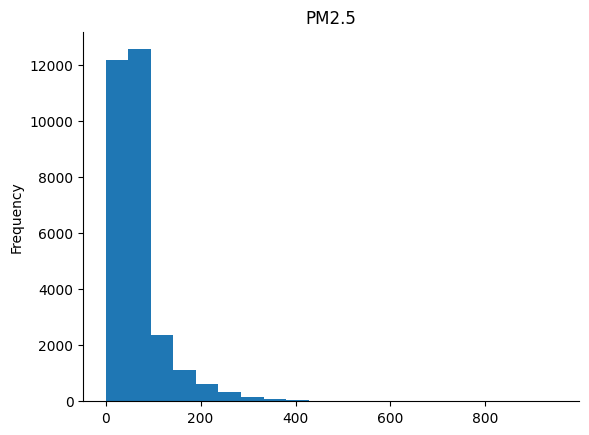

In [ ]:
# @title PM2.5

from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: Using dataframe df: heatmap

import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [ ]:
#simple hist_plot

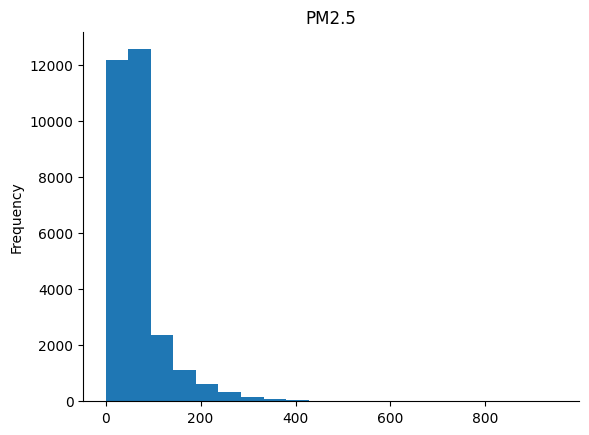

In [ ]:
from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      64.510857    109.659366     16.642601     27.726576     31.063568   
std       59.807551     72.324020     21.506064     23.050531     29.477748   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       32.150000     79.315000      6.210000     12.980000     14.670000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       72.450000    111.880000     17.570000     34.665000     36.015000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      20.813789      2.153872     13.830897     33.994121      2.859874   
std       21.028862      6.724660     17.005647     20.202304     14.252822   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       12.040000      0.540000      6.090000     20.740000      0.240000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       21.755000      1.380000     13.810000     42.730000      2.420000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene           AQI  
count  29531.000000  29531.000000  
mean       7.140485    158.781552  
std       17.224737    130.272413  
min        0.000000     13.000000  
25%        1.280000     88.000000  
50%        2.970000    118.000000  
75%        6.020000    179.000000  
max      454.850000   2049.000000

AQI Predictor : For predict AQI_bucket

In [ ]:
class AQIPredictor:
    def __init__(self, model=None):
        self.model = model if model else RandomForestClassifier(n_estimators=10)
        self.city_encoder = LabelEncoder()
        self.bucket_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.feature_columns = []
        self.fitted = False

    def fit(self, df):
        df = df.copy()

        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop(['Date', 'Xylene'], axis=1, errors='ignore', inplace=True)

        df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
        df.fillna(df.median(numeric_only=True), inplace=True)

        df['City'] = self.city_encoder.fit_transform(df['City'])
        df['AQI_Bucket'] = self.bucket_encoder.fit_transform(df['AQI_Bucket'])

        X = df.drop('AQI_Bucket', axis=1)
        y = df['AQI_Bucket']
        self.feature_columns = X.columns.tolist()

        X_scaled = self.scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        self.fitted = True
        print("✅ Model trained. testing Accuracy:", round(self.model.score(X_test, y_test) * 100, 2), "%")
        print("✅ Model trained. training Accuracy:", round(self.model.score(X_train,y_train) * 100, 2), "%")






    def preprocess_sample(self, sample_dict):
        df = pd.DataFrame([sample_dict])
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop('Date', axis=1, inplace=True)

        df['City'] = self.city_encoder.transform(df['City'])
        df = df[self.feature_columns]
        return self.scaler.transform(df)

    def predict(self, sample_dict):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        sample_processed = self.preprocess_sample(sample_dict)
        pred_encoded = self.model.predict(sample_processed)[0]
        return self.bucket_encoder.inverse_transform([pred_encoded])[0]

    def classification_report(self):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        if self.X_test is None or self.y_test is None:
             raise Exception("Test data not available. Fit the model first.")

        predicted_bucket_encoded = self.model.predict(self.X_test).astype(int)

        # Filter out predicted labels that are not in the bucket encoder's known classes
        known_classes = list(range(len(self.bucket_encoder.classes_)))
        valid_indices = [i for i, p in enumerate(predicted_bucket_encoded) if p in known_classes]

        if len(valid_indices) < len(predicted_bucket_encoded):
             print(f"Warning: {len(predicted_bucket_encoded) - len(valid_indices)} predicted labels were outside the range of known classes.")
             # Decide how to handle this for the report. For now, proceed with valid indices.
             # A more robust solution might involve adding a 'unknown' class or investigating why the model predicts out of range.

        if not valid_indices:
             print("No valid predictions to generate classification report.")
             return

        y_test_decoded = self.bucket_encoder.inverse_transform(self.y_test[valid_indices])
        predicted_bucket_decoded = self.bucket_encoder.inverse_transform(predicted_bucket_encoded[valid_indices])

        try:
             print("\nClassification Report:\n", classification_report(y_test_decoded, predicted_bucket_decoded))
        except ValueError as e:
             print(f"Error generating classification report: Could not inverse transform labels. Ensure all labels in y_test and predictions are known by the bucket encoder. Error: {e}")
        except Exception as e:
             print(f"An unexpected error occurred during classification report generation: {e}")


In [ ]:
predictor = AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)



✅ Model trained. Accuracy: 99.95 %
✅ Model trained. Accuracy: 100.0 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Ahmedabad
Enter Date (YYYY-MM-DD): 2015-01-03
Enter PM2.5: 48.57
Enter PM10: 95.68
Enter NO: 17.40
Enter NO2: 19.30
Enter NOx: 29.70
Enter NH3: 15.85
Enter CO: 17.20
Enter SO2: 29.07
Enter O3: 30.70
Enter Benzene: 6.80
Enter Toluene: NaN
Enter AQI: 118.0

🌫️ Predicted AQI Bucket: Moderate


Other Models to Compare with RandomForestClassifier

In [ ]:
#For Knn Classifier
class KNNAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=KNeighborsClassifier())




In [ ]:
predictor = KNNAQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

✅ Model trained. testing Accuracy: 80.75 %
✅ Model trained. training Accuracy: 87.38 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Ahmedabad
Enter Date (YYYY-MM-DD): 2015-01-03
Enter PM2.5: 48.57
Enter PM10: 95.68
Enter NO: 17.40
Enter NO2: 19.30
Enter NOx: 29.70
Enter NH3: 15.85
Enter CO: 17.40
Enter SO2: 30.70
Enter O3: 6.80
Enter Benzene: 16.40
Enter Toluene: 118.0
Enter AQI: 118.0

🌫️ Predicted AQI Bucket: Moderate


In [ ]:
#for Decision Tree
class DecisionTreeAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=DecisionTreeClassifier())

In [ ]:
predictor = DecisionTreeAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

✅ Model trained. testing Accuracy: 100.0 %
✅ Model trained. training Accuracy: 100.0 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Visakhapatnam
Enter Date (YYYY-MM-DD): 2020-06-29
Enter PM2.5: 22.91
Enter PM10: 65.73
Enter NO: 3.45
Enter NO2: 29.53
Enter NOx: 18.33
Enter NH3: 10.71
Enter CO: 0.48
Enter SO2: 8.42
Enter O3: 30.96
Enter Benzene: 0.01
Enter Toluene: 0.01
Enter AQI: 68.0

🌫️ Predicted AQI Bucket: Satisfactory


In [ ]:
#for Logistic Regression
class LogisticAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=LogisticRegression())

In [ ]:
predictor = LogisticAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Model trained. testing Accuracy: 96.55 %
✅ Model trained. training Accuracy: 96.84 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Visakhapatnam
Enter Date (YYYY-MM-DD): 2020-06-29
Enter PM2.5: 22.91
Enter PM10: 65.73
Enter NO: 3.45
Enter NO2: 29.53
Enter NOx: 18.33
Enter NH3: 10.71
Enter CO: 0.48
Enter SO2: 8.42
Enter O3: 30.97
Enter Benzene: 2.97
Enter Toluene: 50.0
Enter AQI: 50.0

🌫️ Predicted AQI Bucket: Satisfactory


In [ ]:
#for Svc
class SVCAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model = SVC())

In [ ]:

predictor = SVCAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}
predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

✅ Model trained. testing Accuracy: 93.7 %
✅ Model trained. training Accuracy: 95.27 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Ahmedabad
Enter Date (YYYY-MM-DD): 2015-01-03
Enter PM2.5: 48.57
Enter PM10: 95.10
Enter NO: 17.4
Enter NO2: 19.3
Enter NOx: 29.7
Enter NH3: 15.85
Enter CO: 17.40
Enter SO2: 29.07
Enter O3: 30.07
Enter Benzene: 6.80
Enter Toluene: 16.4
Enter AQI: 118.0

🌫️ Predicted AQI Bucket: Moderate


In [ ]:
# class BAGGINGAQIPredictor(AQIPredictor):
#     def __init__(self):
#         super().__init__(model=BaggingClassifier(n_estimators=100))

In [ ]:
# predictor = BAGGINGAQIPredictor(n_)  # Or DecisionTreeAQIPredictor(), AQIPredictor()
# predictor.fit(df)

# print("\n🔍 Enter values to predict AQI Bucket:")
# sample_input = {
#     'City': input("Enter City (e.g., Delhi): "),
#     'Date': input("Enter Date (YYYY-MM-DD): "),
#     'PM2.5': float(input("Enter PM2.5: ")),
#     'PM10': float(input("Enter PM10: ")),
#     'NO': float(input("Enter NO: ")),
#     'NO2': float(input("Enter NO2: ")),
#     'NOx': float(input("Enter NOx: ")),
#     'NH3': float(input("Enter NH3: ")),
#     'CO': float(input("Enter CO: ")),
#     'SO2': float(input("Enter SO2: ")),
#     'O3': float(input("Enter O3: ")),
#     'Benzene': float(input("Enter Benzene: ")),
#     'Toluene': float(input("Enter Toluene: ")),
#     'AQI': float(input("Enter AQI: "))
# }

# predicted_bucket = predictor.predict(sample_input)
# print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

AQI (Air Quality Index )

In [ ]:
#Prediction for AQI using AQIPREDICTOR2

In [ ]:
df

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor # Keep RandomForestRegressor for AQI prediction
from sklearn.preprocessing import LabelEncoder, StandardScaler # Keep scalers and encoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Keep regression metrics

class AQIPredictor2:
    def __init__(self, model=None):
        # Use a regression model by default for predicting numerical AQI
        self.model = model if model is not None else RandomForestRegressor(random_state=42)
        self.city_encoder = LabelEncoder()
        self.bucket_encoder = LabelEncoder() # Keep the bucket encoder for handling AQI_Bucket
        self.scaler = StandardScaler()
        self.feature_columns = [] # Store the feature columns used for training
        self.fitted = False # Flag to check if the model has been fitted
        self.training_median_values = None # Store median values for imputation

    def fit(self, df):
        """
        Trains the AQI prediction model.

        Args:
            df (pd.DataFrame): The training DataFrame containing AQI and features.
        """
        df = df.copy()

        # --- Preprocessing steps from your original fit method ---
        # Convert 'Date' and extract temporal features
        if 'Date' in df.columns:
             df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
             # Drop rows where Date conversion failed
             initial_rows = len(df)
             df.dropna(subset=['Date'], inplace=True)
             if len(df) < initial_rows:
                  print(f"⚠️ Dropped {initial_rows - len(df)} rows due to invalid date formats during fit.")

             df['Year'] = df['Date'].dt.year
             df['Month'] = df['Date'].dt.month
             df['Day'] = df['Date'].dt.day
             # Drop the original Date column
             df.drop('Date', axis=1, errors='ignore', inplace=True)
             print("✅ Date features extracted and original 'Date' column dropped.")
        else:
             print("⚠️ 'Date' column not found. Cannot extract temporal features.")


        # Handle missing 'AQI_Bucket'
        if 'AQI_Bucket' in df.columns:
            # Fill missing 'AQI_Bucket' with the mode
            df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
            print("✅ Filled missing values in AQI_Bucket.")
        else:
            print("⚠️ 'AQI_Bucket' column not found. Skipping fillna for AQI_Bucket.")


        # Fill remaining numerical NaNs with median
        # Identify numerical columns *before* potential encoding
        numeric_cols_before_imputation = df.select_dtypes(include=np.number).columns.tolist()
        # Exclude 'AQI' from median calculation if it's the target
        numeric_cols_for_median = [col for col in numeric_cols_before_imputation if col != 'AQI']

        if numeric_cols_for_median:
             # Calculate and store median values from the training data
             self.training_median_values = df[numeric_cols_for_median].median()
             df[numeric_cols_for_median] = df[numeric_cols_for_median].fillna(self.training_median_values)
             print("✅ Filled missing numerical values with median from training data.")
        else:
            print("⚠️ No numeric columns found (excluding AQI) to fill missing values with median.")
            self.training_median_values = pd.Series(dtype=float) # Initialize empty if no numeric cols


        # Drop 'Xylene' (assuming it's not needed as a feature)
        if 'Xylene' in df.columns:
            df.drop('Xylene', inplace=True, axis=1)
            print("✅ Dropped 'Xylene' column.")
        else:
            print("⚠️ 'Xylene' column not found. Skipping drop.")


        # --- Feature Encoding ---
        # Handle categorical 'City'
        if 'City' in df.columns:
            df['City'] = self.city_encoder.fit_transform(df['City'])
            print("✅ 'City' column encoded.")
        else:
             print("⚠️ 'City' column not found for encoding.")

        # Handle 'AQI_Bucket' - it will be used as a feature
        # Encode the 'AQI_Bucket' column
        if 'AQI_Bucket' in df.columns:
             df['AQI_Bucket_Encoded'] = self.bucket_encoder.fit_transform(df['AQI_Bucket'])
             # Drop the original 'AQI_Bucket' string column after encoding
             df.drop('AQI_Bucket', axis=1, inplace=True)
             print("✅ 'AQI_Bucket' column encoded and original dropped.")
        else:
             print("⚠️ 'AQI_Bucket' column not found for encoding.")


        # --- Define features (X) and target (y) ---
        if 'AQI' in df.columns:
            # Features are all columns except the target 'AQI'
            X = df.drop('AQI', axis=1)
            y = df['AQI'] # Target variable is AQI (numerical)
            print("✅ Target variable 'AQI' selected.")
        else:
            print("❌ 'AQI' column not found in the DataFrame. Cannot train the model.")
            self.fitted = False
            return # Exit fit method if target is missing

        # Store the feature column names used for training
        self.feature_columns = X.columns.tolist()
        print(f"Features used for training: {self.feature_columns}")


        # --- Scaling ---
        # Scale all features (X)
        # Ensure only numeric columns are scaled. LabelEncoded columns are already numeric.
        numeric_cols_for_scaling = X.select_dtypes(include=np.number).columns.tolist()
        if numeric_cols_for_scaling:
             X_scaled = self.scaler.fit_transform(X[numeric_cols_for_scaling])
             # Create a new DataFrame with scaled numerical columns and original non-numerical columns (if any)
             # In this case, all features should be numeric after encoding.
             X_processed = pd.DataFrame(X_scaled, columns=numeric_cols_for_scaling, index=X.index)
             print("✅ Features scaled.")
        else:
             X_processed = X.copy() # If no numeric columns (unlikely after encoding), use original
             print("⚠️ No numeric columns found for scaling.")


        # --- Train the model ---
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

        # Fit the model
        try:
            self.model.fit(X_train, y_train)
            self.fitted = True
            print(f"✅ Model ({self.model.__class__.__name__}) trained.")

            # Evaluate the model (using regression metrics as AQI is numerical)
            y_pred = self.model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            print("\nModel Evaluation Metrics (on Test Set):")
            print(f"  Mean Squared Error (MSE): {mse:.4f}")
            print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
            print(f"  Mean Absolute Error (MAE): {mae:.4f}")
            print(f"  R-squared (R2): {r2:.4f}")


        except Exception as e:
            print(f"❌ Error during model training or evaluation: {e}")
            self.fitted = False


    def preprocess_sample(self, sample_dict):
        """
        Preprocesses a single sample input dictionary for prediction.

        Args:
            sample_dict (dict): A dictionary containing the input features
                                for a single time step.

        Returns:
            np.ndarray: The preprocessed and scaled feature array (1 sample).
            None: If preprocessing fails.
        """
        if not self.fitted:
            print("Error: Model not trained yet.")
            return None

        df_sample = pd.DataFrame([sample_dict])

        # --- Apply the same preprocessing steps as in fit ---
        # Date Feature Engineering
        if 'Date' in df_sample.columns:
             try:
                  df_sample['Date'] = pd.to_datetime(df_sample['Date'])
                  df_sample['Year'] = df_sample['Date'].dt.year
                  df_sample['Month'] = df_sample['Date'].dt.month
                  df_sample['Day'] = df_sample['Date'].dt.day
                  df_sample.drop('Date', axis=1, inplace=True, errors='ignore')
             except Exception as e:
                  print(f"Error processing date in sample: {e}")
                  # Decide how to handle invalid date input: return None or impute?
                  # For now, return None to indicate failure.
                  return None
        # Note: If Date was not in training features, skip this block


        # Handle missing values - fill with training medians for numeric, mode for categorical
        # Note: sample_dict should ideally have all required features.
        # If not, you need a strategy. Filling with training medians/modes is one.
        # Let's fill missing numeric values with training medians
        numeric_cols_in_sample = df_sample.select_dtypes(include=np.number).columns.tolist()
        if numeric_cols_in_sample:
             # Ensure sample_dict keys match training feature columns
             # Filter training_median_values to only include columns present in the sample's numeric columns
             medians_for_sample = self.training_median_values[self.training_median_values.index.isin(numeric_cols_in_sample)]
             df_sample[numeric_cols_in_sample] = df_sample[numeric_cols_in_sample].fillna(medians_for_sample)
        # Handle categorical (City, AQI_Bucket) - fill with training mode if missing in input
        if 'City' in df_sample.columns and df_sample['City'].isnull().any():
             if hasattr(self.city_encoder, 'classes_') and len(self.city_encoder.classes_) > 0:
                  # Find the mode of City in the *original* training data (before encoding)
                  # This requires having access to the original training data or storing the mode.
                  # A simpler approach here is to just fill with a placeholder or the most frequent *encoded* city.
                  # Let's assume 'City' is required input and should not be missing.
                  pass # Keep as is, user is expected to provide City

        if 'AQI_Bucket' in df_sample.columns and df_sample['AQI_Bucket'].isnull().any():
             # Fill missing AQI_Bucket in sample with the mode from training data (decoded)
             if hasattr(self.bucket_encoder, 'classes_') and len(self.bucket_encoder.classes_) > 0:
                  # Find the mode of the *encoded* AQI_Bucket in the training data
                  # This is complex without original data access.
                  # A workaround: if input AQI_Bucket is missing, use the mode from training
                  # encoded values and encode it.
                  pass # Keep as is, user is expected to provide AQI_Bucket


        # Handle 'Xylene' - drop it if it exists in sample input
        if 'Xylene' in df_sample.columns:
            df_sample.drop('Xylene', inplace=True, axis=1, errors='ignore')


        # --- Feature Encoding for sample ---
        # Encode 'City'
        if 'City' in df_sample.columns:
             try:
                  # Use transform, not fit_transform, as the encoder is already fitted
                  df_sample['City'] = self.city_encoder.transform(df_sample['City'])
             except ValueError as e:
                  print(f"Error encoding city '{df_sample['City'].iloc[0]}' in sample: {e}. Ensure the city was in the training data.")
                  return None # Return None if city is unknown

        # Encode 'AQI_Bucket' - this is now a feature
        if 'AQI_Bucket' in df_sample.columns:
             try:
                  # Use transform for AQI_Bucket encoding
                  df_sample['AQI_Bucket_Encoded'] = self.bucket_encoder.transform(df_sample['AQI_Bucket'])
                  df_sample.drop('AQI_Bucket', axis=1, inplace=True) # Drop original string column
             except ValueError as e:
                  print(f"Error encoding AQI_Bucket '{df_sample['AQI_Bucket'].iloc[0]}' in sample: {e}. Ensure the bucket was in the training data.")
                  return None # Return None if bucket is unknown
        # Note: If AQI_Bucket was not in training features, skip this block

        # Ensure the sample DataFrame has the exact same columns as the training features
        # and in the same order. Add missing features with 0 (or a sensible default like the training median/mode for that feature).
        # Drop extra columns if any exist in the sample but not in training features.
        sample_cols_set = set(df_sample.columns)
        training_cols_set = set(self.feature_columns)

        # Columns to add (present in training, missing in sample)
        cols_to_add = list(training_cols_set - sample_cols_set)
        for col in cols_to_add:
             # Fill added columns with a sensible default. Using training median for numeric features.
             # For encoded categorical features (City, AQI_Bucket_Encoded), 0 might be okay, or the mode.
             if col in self.training_median_values.index:
                  df_sample[col] = self.training_median_values[col]
             elif col == 'City': # Handle encoded City
                  # Use the most frequent encoded city from training if possible, or 0
                  # Requires storing the mode of encoded city during fit, or recomputing (less efficient)
                  df_sample[col] = 0 # Fallback: Use 0
             elif col == 'AQI_Bucket_Encoded': # Handle encoded AQI_Bucket
                  # Use the most frequent encoded bucket from training if possible, or 0
                  df_sample[col] = 0 # Fallback: Use 0
             else: # Other potential missing features (unlikely with current feature set)
                  df_sample[col] = 0 # Default fill with 0


        # Columns to drop (present in sample, missing in training)
        cols_to_drop = list(sample_cols_set - training_cols_set)
        if cols_to_drop:
             print(f"Warning: Dropping extra columns in sample input not used in training: {cols_to_drop}")
             df_sample.drop(cols_to_drop, axis=1, inplace=True)


        # Reindex to ensure columns are in the same order as training features
        df_sample = df_sample.reindex(columns=self.feature_columns)

        # --- Scaling for sample ---
        # Scale the sample features using the scaler fitted on the training data
        # Ensure only numeric columns are scaled.
        numeric_cols_for_scaling_sample = df_sample.select_dtypes(include=np.number).columns.tolist()
        if numeric_cols_for_scaling_sample:
             # Ensure the scaler is applied correctly to the sample columns that were scaled in training
             # Use the fitted scaler
             X_sample_scaled = self.scaler.transform(df_sample[numeric_cols_for_scaling_sample])
             # Create a new DataFrame with scaled numerical columns and original non-numerical columns (if any)
             X_sample_processed = pd.DataFrame(X_sample_scaled, columns=numeric_cols_for_scaling_sample, index=df_sample.index)
        else:
            X_sample_processed = df_sample.copy() # If no numeric columns, use original
            print("⚠️ No numeric columns found in sample for scaling.")


        return X_sample_processed.values # Return as numpy array


    def predict(self, sample_dict):
        """
        Predicts the AQI for a single sample input dictionary.

        Args:
            sample_dict (dict): A dictionary containing the input features
                                for a single time step in their original format.

        Returns:
            int: The predicted AQI as an integer, or None if prediction fails.
        """
        if not self.fitted:
            print("Error: Model not trained yet. Please call fit() first.")
            return None

        # Preprocess the sample input
        X_sample_processed = self.preprocess_sample(sample_dict)

        if X_sample_processed is None:
             print("Error during sample preprocessing.")
             return None

        # Make prediction using the trained model
        try:
            predicted_aqi_float = self.model.predict(X_sample_processed)[0] # Predict returns an array
            # Convert the prediction to an integer
            predicted_aqi_int = int(round(predicted_aqi_float))
            return predicted_aqi_int
        except Exception as e:
            print(f"Error during prediction: {e}")
            return None

In [32]:
4# Based on the provided code snippet and the user's request to predict AQI using AQIPredictor2

predictor = AQIPredictor2()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': input("Enter AQI_Bucket: ") # Changed to input() to accept string
}

# Handle the case where AQI_Bucket might be expected as a float in preprocess_sample but is a string
# The preprocess_sample method in AQIPredictor2 drops 'AQI_Bucket' if 'AQI' is the target,
# so it should be fine to pass the string input directly here.

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Date features extracted and original 'Date' column dropped.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ 'City' column encoded.
✅ 'AQI_Bucket' column encoded and original dropped.
✅ Target variable 'AQI' selected.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI_Bucket_Encoded']
✅ Features scaled.
✅ Model (RandomForestRegressor) trained.

Model Evaluation Metrics (on Test Set):
  Mean Squared Error (MSE): 712.2901
  Root Mean Squared Error (RMSE): 26.6888
  Mean Absolute Error (MAE): 12.5034
  R-squared (R2): 0.9537

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): Ahmedabad
Enter Date (YYYY-MM-DD): 2020-01-03
Enter PM2.5: 12
Enter PM10: 12
Enter NO: 78
Enter NO2: 65
Enter NOx: 32
Enter NH3: 111
Enter CO: 135
Enter SO2: 89
Enter O3: 54
Enter Benzene: 32
Enter Toluene: 11

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


other models



In [33]:
#for Svr
class SVRAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=SVR())

In [35]:
4# Based on the provided code snippet and the user's request to predict AQI using AQIPredictor2

predictor = SVRAQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': input("Enter AQI_Bucket: ") # Changed to input() to accept string
}

# Handle the case where AQI_Bucket might be expected as a float in preprocess_sample but is a string
# The preprocess_sample method in AQIPredictor2 drops 'AQI_Bucket' if 'AQI' is the target,
# so it should be fine to pass the string input directly here.

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Date features extracted and original 'Date' column dropped.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ 'City' column encoded.
✅ 'AQI_Bucket' column encoded and original dropped.
✅ Target variable 'AQI' selected.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI_Bucket_Encoded']
✅ Features scaled.
✅ Model (SVR) trained.

Model Evaluation Metrics (on Test Set):
  Mean Squared Error (MSE): 5658.4295
  Root Mean Squared Error (RMSE): 75.2225
  Mean Absolute Error (MAE): 31.0639
  R-squared (R2): 0.6324

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): Mumbai
Enter Date (YYYY-MM-DD): 2020-01-05
Enter PM2.5: 15
Enter PM10: 66
Enter NO: 0.9
Enter NO2: 14
Enter NOx: 26
Enter NH3: 12
Enter CO: 0.6
Enter SO2: 18
Enter O3: 24
Enter Benzene: 17
Enter Toluene: 1.9
Enter AQI_Bucket: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
# #for Svc
# class RandomForestRegressorAQIPredictor(AQIPredictor2):
#     def __init__(self):
#         super().__init__(model=RandomForestRegressor())

In [ ]:
Visakhapatnam	6/29/2020	22.91	65.73	3.45	29.53	18.33	10.71	0.48	8.42	30.96	0.01	0.01	68.0	Satisfactory
29529	Visakhapatnam	6/30/2020	16.64	49.97	4.05	29.26	18.80	10.03	0.52	9.84	28.30	0.00	0.00	54.0	Satisfactory
29530	Visakhapatnam	7/1/2020	15.00	66.00	0.40	26.85	14.05	5.20	0.59	2.10	17.05	1.07	2.97	50.0	Good
29531 rows × 15 columns

In [36]:
#for BaggingRegressor
class BaggingRegressorAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=BaggingRegressor())

In [38]:
4# Based on the provided code snippet and the user's request to predict AQI using AQIPredictor2

predictor = BaggingRegressorAQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': input("Enter AQI_Bucket: ") # Changed to input() to accept string
}

# Handle the case where AQI_Bucket might be expected as a float in preprocess_sample but is a string
# The preprocess_sample method in AQIPredictor2 drops 'AQI_Bucket' if 'AQI' is the target,
# so it should be fine to pass the string input directly here.

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Date features extracted and original 'Date' column dropped.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ 'City' column encoded.
✅ 'AQI_Bucket' column encoded and original dropped.
✅ Target variable 'AQI' selected.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI_Bucket_Encoded']
✅ Features scaled.
✅ Model (BaggingRegressor) trained.

Model Evaluation Metrics (on Test Set):
  Mean Squared Error (MSE): 832.6424
  Root Mean Squared Error (RMSE): 28.8555
  Mean Absolute Error (MAE): 13.1875
  R-squared (R2): 0.9459

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): Nagpur
Enter Date (YYYY-MM-DD): 2025-03-16
Enter PM2.5: 8
Enter PM10: 7.7
Enter NO: 45
Enter NO2: 3.5
Enter NOx: NaN
Enter NH3: 2.6
Enter CO: 6.9
Enter SO2: 4.6
Enter O3: 2.6
Enter Benzene: 8.9
Enter Toluene: 3.58


In [42]:
#for LinearRegression
class LinearAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=LinearRegression())

In [43]:
4# Based on the provided code snippet and the user's request to predict AQI using AQIPredictor2

predictor = LinearAQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': input("Enter AQI_Bucket: ") # Changed to input() to accept string
}

# Handle the case where AQI_Bucket might be expected as a float in preprocess_sample but is a string
# The preprocess_sample method in AQIPredictor2 drops 'AQI_Bucket' if 'AQI' is the target,
# so it should be fine to pass the string input directly here.

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Date features extracted and original 'Date' column dropped.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ 'City' column encoded.
✅ 'AQI_Bucket' column encoded and original dropped.
✅ Target variable 'AQI' selected.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI_Bucket_Encoded']
✅ Features scaled.
✅ Model (LinearRegression) trained.

Model Evaluation Metrics (on Test Set):
  Mean Squared Error (MSE): 2815.7093
  Root Mean Squared Error (RMSE): 53.0633
  Mean Absolute Error (MAE): 31.7659
  R-squared (R2): 0.8171

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): Chennai
Enter Date (YYYY-MM-DD): 2021-04-09
Enter PM2.5: 83.13
Enter PM10: 0.76
Enter NO: 0.76
Enter NO2: 0.99
Enter NOx: 123
Enter NH3: 23.65
Enter CO: 13.89
Enter SO2: 17.78
Enter O3: 6.7
Enter Benzene: 4.8
Ente

In [44]:
#for DecisionTreeRegressor
class DecisionTreeRegressorAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=DecisionTreeRegressor())

In [45]:
4# Based on the provided code snippet and the user's request to predict AQI using AQIPredictor2

predictor = DecisionTreeRegressorAQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': input("Enter AQI_Bucket: ") # Changed to input() to accept string
}

# Handle the case where AQI_Bucket might be expected as a float in preprocess_sample but is a string
# The preprocess_sample method in AQIPredictor2 drops 'AQI_Bucket' if 'AQI' is the target,
# so it should be fine to pass the string input directly here.

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Date features extracted and original 'Date' column dropped.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ 'City' column encoded.
✅ 'AQI_Bucket' column encoded and original dropped.
✅ Target variable 'AQI' selected.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI_Bucket_Encoded']
✅ Features scaled.
✅ Model (DecisionTreeRegressor) trained.

Model Evaluation Metrics (on Test Set):
  Mean Squared Error (MSE): 1263.4063
  Root Mean Squared Error (RMSE): 35.5444
  Mean Absolute Error (MAE): 16.8348
  R-squared (R2): 0.9179

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): Lucknow
Enter Date (YYYY-MM-DD): 2025-08-12
Enter PM2.5: 12.56
Enter PM10: 34.78
Enter NO: 0.546
Enter NO2: 9.786
Enter NOx: 1.2
Enter NH3: 23
Enter CO: 12
Enter SO2: 18.9
Enter O3: 5.6
Enter Benzene: 3.2
Ent

In [46]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [47]:
#for KNeighborsRegressor
class KNNRegressorAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=KNeighborsRegressor())

In [48]:
4# Based on the provided code snippet and the user's request to predict AQI using AQIPredictor2

predictor = KNNRegressorAQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': input("Enter AQI_Bucket: ") # Changed to input() to accept string
}

# Handle the case where AQI_Bucket might be expected as a float in preprocess_sample but is a string
# The preprocess_sample method in AQIPredictor2 drops 'AQI_Bucket' if 'AQI' is the target,
# so it should be fine to pass the string input directly here.

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Date features extracted and original 'Date' column dropped.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ 'City' column encoded.
✅ 'AQI_Bucket' column encoded and original dropped.
✅ Target variable 'AQI' selected.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI_Bucket_Encoded']
✅ Features scaled.
✅ Model (KNeighborsRegressor) trained.

Model Evaluation Metrics (on Test Set):
  Mean Squared Error (MSE): 1774.1207
  Root Mean Squared Error (RMSE): 42.1203
  Mean Absolute Error (MAE): 17.9686
  R-squared (R2): 0.8848

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): Patna
Enter Date (YYYY-MM-DD): 2025-03-06
Enter PM2.5: 8.6
Enter PM10: 2.5
Enter NO: 1.55
Enter NO2: 0.54
Enter NOx: 0.4
Enter NH3: 234
Enter CO: 2.3
Enter SO2: 1.89
Enter O3: 7.6
Enter Benzene: 2.3
Enter Tolue

Plotting

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

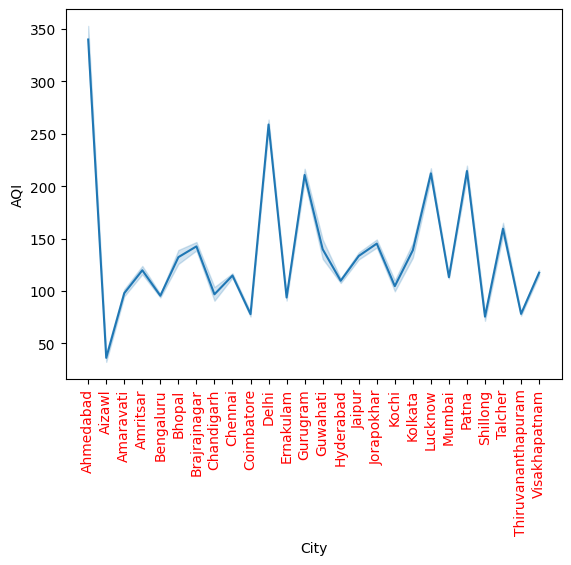

In [50]:
sns.lineplot(x='City',y='AQI',data=df)

plt.xticks(rotation=90,color='r')
plt.show()

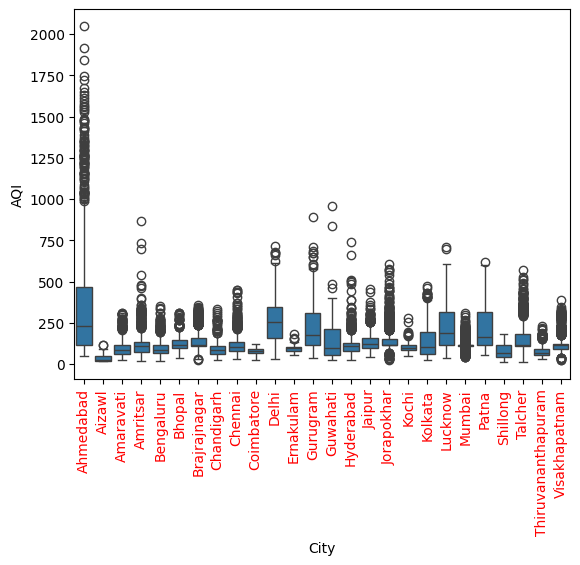

In [51]:
sns.boxplot(x='City',y='AQI',data=df)
plt.xticks(rotation=90,color='r')

plt.show()

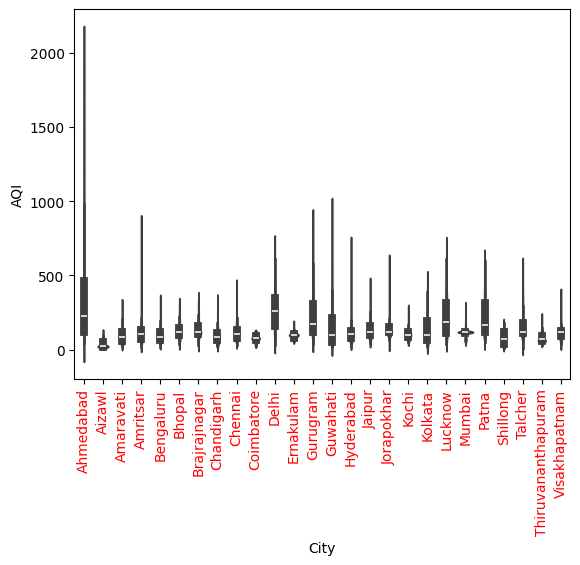

In [52]:
sns.violinplot(x='City',y='AQI',data=df)
plt.xticks(rotation=90,color='r')

plt.show()

In [53]:
df

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad   1/1/2015  48.57  95.68   0.92  18.22  17.15  15.85   
1          Ahmedabad   1/2/2015  48.57  95.68   0.97  15.69  16.46  15.85   
2          Ahmedabad   1/3/2015  48.57  95.68  17.40  19.30  29.70  15.85   
3          Ahmedabad   1/4/2015  48.57  95.68   1.70  18.48  17.97  15.85   
4          Ahmedabad   1/5/2015  48.57  95.68  22.10  21.42  37.76  15.85   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  6/27/2020  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  6/28/2020  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  6/29/2020  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  6/30/2020  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam   7/1/2020  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene    AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02  118.0      Moderate  
1       0.97  24.55   34.06     3.68     5.50  118.0      Moderate  
2      17.40  29.07   30.70     6.80    16.40  118.0      Moderate  
3       1.70  18.59   36.08     4.43    10.14  118.0      Moderate  
4      22.10  39.33   39.31     7.01    18.89  118.0      Moderate  
...      ...    ...     ...      ...      ...    ...           ...  
29526   0.47   8.55   23.30     2.24    12.07   41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21   70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01   68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00   54.0  Satisfactory  
29530   0.59   2.10   17.05     1.07     2.97   50.0          Good  

[29531 rows x 15 columns]

In [54]:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop(['Date', 'Xylene'], axis=1, errors='ignore', inplace=True)

In [55]:
df

City  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0          Ahmedabad  48.57  95.68   0.92  18.22  17.15  15.85   0.92  27.64   
1          Ahmedabad  48.57  95.68   0.97  15.69  16.46  15.85   0.97  24.55   
2          Ahmedabad  48.57  95.68  17.40  19.30  29.70  15.85  17.40  29.07   
3          Ahmedabad  48.57  95.68   1.70  18.48  17.97  15.85   1.70  18.59   
4          Ahmedabad  48.57  95.68  22.10  21.42  37.76  15.85  22.10  39.33   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   
29527  Visakhapatnam  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   
29528  Visakhapatnam  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   
29529  Visakhapatnam  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   
29530  Visakhapatnam  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   

           O3  Benzene  Toluene    AQI    AQI_Bucket  Year  Month  Day  
0      133.36     0.00     0.02  118.0      Moderate  2015      1    1  
1       34.06     3.68     5.50  118.0      Moderate  2015      1    2  
2       30.70     6.80    16.40  118.0      Moderate  2015      1    3  
3       36.08     4.43    10.14  118.0      Moderate  2015      1    4  
4       39.31     7.01    18.89  118.0      Moderate  2015      1    5  
...       ...      ...      ...    ...           ...   ...    ...  ...  
29526   23.30     2.24    12.07   41.0          Good  2020      6   27  
29527   30.14     0.74     2.21   70.0  Satisfactory  2020      6   28  
29528   30.96     0.01     0.01   68.0  Satisfactory  2020      6   29  
29529   28.30     0.00     0.00   54.0  Satisfactory  2020      6   30  
29530   17.05     1.07     2.97   50.0          Good  2020      7    1  

[29531 rows x 17 columns]

Heatmap

In [57]:
# plt.figure(figsize = (10,10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.show()


In [59]:
# corr_matrix = df.corr()

In [60]:
df

City  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0          Ahmedabad  48.57  95.68   0.92  18.22  17.15  15.85   0.92  27.64   
1          Ahmedabad  48.57  95.68   0.97  15.69  16.46  15.85   0.97  24.55   
2          Ahmedabad  48.57  95.68  17.40  19.30  29.70  15.85  17.40  29.07   
3          Ahmedabad  48.57  95.68   1.70  18.48  17.97  15.85   1.70  18.59   
4          Ahmedabad  48.57  95.68  22.10  21.42  37.76  15.85  22.10  39.33   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   
29527  Visakhapatnam  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   
29528  Visakhapatnam  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   
29529  Visakhapatnam  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   
29530  Visakhapatnam  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   

           O3  Benzene  Toluene    AQI    AQI_Bucket  Year  Month  Day  
0      133.36     0.00     0.02  118.0      Moderate  2015      1    1  
1       34.06     3.68     5.50  118.0      Moderate  2015      1    2  
2       30.70     6.80    16.40  118.0      Moderate  2015      1    3  
3       36.08     4.43    10.14  118.0      Moderate  2015      1    4  
4       39.31     7.01    18.89  118.0      Moderate  2015      1    5  
...       ...      ...      ...    ...           ...   ...    ...  ...  
29526   23.30     2.24    12.07   41.0          Good  2020      6   27  
29527   30.14     0.74     2.21   70.0  Satisfactory  2020      6   28  
29528   30.96     0.01     0.01   68.0  Satisfactory  2020      6   29  
29529   28.30     0.00     0.00   54.0  Satisfactory  2020      6   30  
29530   17.05     1.07     2.97   50.0          Good  2020      7    1  

[29531 rows x 17 columns]

EDA REPORT BY YDATAPROFILING shown in html

In [63]:
from ydata_profiling import ProfileReport
import pandas as pd


profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")


ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
# IFrame(src='eda_report.html', width=1000, height=600)

# Step 8: Automatically download the report
files.download("eda_report.html")

Dashboard using streamlit

In [64]:
! pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [65]:
# ! pip install ydata_profiling
!pip install streamlit pyngrok


In [66]:
%%writefile app.py
# [Paste the full code here from above]


Writing app.py


In [67]:
from pyngrok import ngrok
ngrok.set_auth_token("2xwDf4mJxxrycnfnfMguPW5yW5O_7w5TebmbpSu5FeDeatnk2")

In [68]:
# Step 1: Install geopy and plotly
# You only need to run this once per session
!pip install geopy plotly
!pip install streamlit # Ensure streamlit is installed in this environment as well

# Import necessary libraries (already mostly there, adding geopy)
from pyngrok import ngrok
import os
import signal
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # For interactive maps
from geopy.geocoders import Nominatim # For geocoding
import streamlit as st # Import streamlit in this cell


# Set your ngrok auth token
ngrok.set_auth_token("2xwDf4mJxxrycnfnfMguPW5yW5O_7w5TebmbpSu5FeDeatnk2")

# Disconnect any existing tunnels before starting a new one
try:
    print("Attempting to disconnect existing ngrok tunnels...")
    tunnels = ngrok.get_tunnels()
    if tunnels:
        for tunnel in tunnels:
            print(f"Disconnecting existing tunnel: {tunnel.public_url}")
            ngrok.disconnect(tunnel.public_url)
    else:
        print("No existing tunnels found.")
except Exception as e:
    print(f"Error while trying to disconnect existing tunnels: {e}")

# Define a geocoding function (can be slow, so we'll handle it carefully)
# Use a persistent geolocator instance
geolocator = Nominatim(user_agent="eda_app") # Replace "eda_app" with a unique app name

# Use caching to avoid repeated geocoding calls for the same city
@st.cache_data
def geocode_city(city_name):
    """Geocodes a city name to latitude and longitude."""
    try:
        location = geolocator.geocode(city_name + ", India") # Assuming cities are in India
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        st.error(f"Error geocoding city '{city_name}': {e}")
        return None, None

# Define the Streamlit app code as a string
streamlit_eda_app_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # For interactive maps
from geopy.geocoders import Nominatim # For geocoding
# Need to redefine the geocoding function within the streamlit script
# because st.cache_data doesn't share state with the notebook kernel.

# Use a persistent geolocator instance within the app process
app_geolocator = Nominatim(user_agent="streamlit_eda_app")

@st.cache_data
def app_geocode_city(city_name):
    \"\"\"Geocodes a city name to latitude and longitude within the Streamlit app.\"\"\"
    try:
        location = app_geolocator.geocode(city_name + ", India") # Assuming cities are in India
        if location:
            return location.latitude, location.longitude
        else:
            st.warning(f"Could not geocode city: {city_name}")
            return None, None
    except Exception as e:
        st.error(f"Error geocoding city '{city_name}': {e}")
        return None, None


st.set_page_config(page_title="Advanced EDA Web App", layout="wide")

st.title("📊 Advanced EDA Web App")
st.markdown("Upload a CSV file and explore your data with more visualizations and maps!")

# Use the file uploader widget
uploaded_file = st.file_uploader("Upload your CSV", type=["csv"])

if uploaded_file is not None:
    # Read the file directly from the uploaded file object
    try:
        df = pd.read_csv(uploaded_file)
        st.success("✅ File uploaded successfully!")

        # --- Basic EDA Sections (from previous version) ---
        st.subheader("🔍 Dataset Preview")
        st.dataframe(df.head())

        st.subheader("📐 Dataset Shape")
        st.write(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

        st.subheader("🧠 Data Types")
        st.write(df.dtypes)

        st.subheader("📊 Summary Statistics")
        st.write(df.describe())

        st.subheader("🚨 Missing Values")
        st.write(df.isnull().sum())

        # --- Add Map Visualization ---
        st.subheader("🗺️ Map Visualization by City")
        # Check if 'City' column and 'AQI' column (or another numeric column) exist
        if 'City' in df.columns:
             # Get unique cities for geocoding
             unique_cities = df['City'].dropna().unique()

             # Geocode cities - might take time for many cities
             st.info(f"Geocoding {len(unique_cities)} cities. This might take a moment...")
             geocoded_cities = {}
             for city in unique_cities:
                 lat, lon = app_geocode_city(city)
                 if lat is not None and lon is not None:
                     geocoded_cities[city] = {'latitude': lat, 'longitude': lon}

             if geocoded_cities:
                 # Create a DataFrame from geocoded cities
                 geocoded_df = pd.DataFrame.from_dict(geocoded_cities, orient='index').reset_index()
                 geocoded_df.rename(columns={'index': 'City'}, inplace=True)

                 # Merge geocoded data with the original DataFrame
                 # Need to aggregate original data by City first if plotting aggregated values (like mean AQI)
                 if 'AQI' in df.columns:
                      # Calculate mean AQI per city for plotting
                      city_aqi = df.groupby('City')['AQI'].mean().reset_index()
                      merged_df = pd.merge(geocoded_df, city_aqi, on='City')

                      st.markdown("#### Cities on Map (Size by Average AQI)")
                      # Create the map using Plotly Express
                      fig_map = px.scatter_mapbox(merged_df,
                                                 lat="latitude",
                                                 lon="longitude",
                                                 hover_name="City", # Text label on hover
                                                 size="AQI", # Size marker by average AQI
                                                 color="AQI", # Color marker by average AQI
                                                 color_continuous_scale=px.colors.sequential.Viridis,
                                                 zoom=3, # Adjust initial zoom level
                                                 height=500) # Adjust map height

                      # Set layout for the map - requires a Mapbox token or using the 'open-street-map' style
                      # Using 'open-street-map' does not require a token but might have less detail
                      fig_map.update_layout(mapbox_style="open-street-map")
                      fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) # Adjust margins

                      st.plotly_chart(fig_map, use_container_width=True)

                 else:
                     st.warning("AQI column not found in the dataset for map visualization by AQI.")
                     # Alternative: Just plot cities without sizing/coloring by AQI
                     st.markdown("#### Cities on Map")
                     fig_map_basic = px.scatter_mapbox(geocoded_df,
                                                      lat="latitude",
                                                      lon="longitude",
                                                      hover_name="City",
                                                      zoom=3,
                                                      height=500)
                     fig_map_basic.update_layout(mapbox_style="open-street-map")
                     fig_map_basic.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
                     st.plotly_chart(fig_map_basic, use_container_width=True)


             else:
                 st.warning("No cities could be geocoded.")

        else:
            st.info("'City' column not found in the dataset for map visualization.")


        # --- More Advanced Plotting Options (from previous version) ---

        st.subheader("📈 Visualizations")

        # Option 1: Correlation Heatmap
        st.markdown("#### Correlation Heatmap")
        numeric_df = df.select_dtypes(include='number')
        if not numeric_df.empty:
            corr = numeric_df.corr()
            fig, ax = plt.subplots(figsize=(10, 8))
            sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
            st.pyplot(fig)
            plt.close(fig)
        else:
            st.info("No numeric columns found for correlation heatmap.")

        # Option 2: Histogram/Distribution Plot
        st.markdown("#### Distribution Plot")
        numeric_cols = df.select_dtypes(include='number').columns
        if not numeric_cols.empty:
            selected_hist_col = st.selectbox("Select Numeric Column for Distribution", numeric_cols, key='hist_col')
            fig2, ax2 = plt.subplots()
            sns.histplot(df[selected_hist_col], kde=True, ax=ax2)
            plt.title(f'Distribution of {selected_hist_col}')
            plt.xlabel(selected_hist_col)
            plt.ylabel('Frequency')
            st.pyplot(fig2)
            plt.close(fig2)
        else:
            st.info("No numeric columns found for distribution plots.")


        # Option 3: Scatter plot
        st.markdown("#### Scatter Plot")
        if len(numeric_cols) >= 2:
             col1_s, col2_s = st.columns(2) # Use different variable names
             with col1_s:
                 selected_scatter_x = st.selectbox("Select X-axis Column", numeric_cols, key='scatter_x')
             with col2_s:
                 default_y_index = 0 if len(numeric_cols) <= 1 or selected_scatter_x != numeric_cols[0] else 1
                 selected_scatter_y = st.selectbox("Select Y-axis Column", numeric_cols, index=default_y_index, key='scatter_y')

             if selected_scatter_x and selected_scatter_y:
                 fig3, ax3 = plt.subplots()
                 sns.scatterplot(x=df[selected_scatter_x], y=df[selected_scatter_y], ax=ax3)
                 plt.title(f'Scatter Plot of {selected_scatter_x} vs {selected_scatter_y}')
                 plt.xlabel(selected_scatter_x)
                 plt.ylabel(selected_scatter_y)
                 st.pyplot(fig3)
                 plt.close(fig3)
        elif len(numeric_cols) > 0:
             st.info("Need at least two numeric columns for a scatter plot.")
        else:
             st.info("No numeric columns found for scatter plot.")


        # Option 4: Box plot
        st.markdown("#### Box Plot (Numeric vs Categorical)")
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
        if len(numeric_cols) > 0 and len(categorical_cols) > 0:
             col_num_b, col_cat_b = st.columns(2) # Use different variable names
             with col_num_b:
                 selected_box_num = st.selectbox("Select Numeric Column for Box Plot", numeric_cols, key='boxplot_num')
             with col_cat_b:
                 selected_box_cat = st.selectbox("Select Categorical Column for Box Plot", categorical_cols, key='boxplot_cat')

             if selected_box_num and selected_box_cat:
                  unique_cats = df[selected_box_cat].nunique()
                  if unique_cats > 50:
                       st.warning(f"Selected categorical column '{selected_box_cat}' has {unique_cats} unique values. This may result in a cluttered plot. Consider grouping categories or selecting a different column.")
                       # Decide how to handle: skip, show limited, etc. For now, we'll try to plot anyway.
                       try:
                           fig4, ax4 = plt.subplots(figsize=(min(unique_cats * 0.5, 20), 6)) # Adjust size based on categories, up to 20 inches wide
                           sns.boxplot(x=df[selected_box_cat], y=df[selected_box_num], ax=ax4)
                           plt.title(f'Box Plot of {selected_box_num} by {selected_box_cat}')
                           plt.xlabel(selected_box_cat)
                           plt.ylabel(selected_box_num)
                           plt.xticks(rotation=45, ha='right')
                           plt.tight_layout() # Adjust layout to prevent labels overlapping
                           st.pyplot(fig4)
                           plt.close(fig4)
                       except Exception as e:
                            st.error(f"Error generating box plot: {e}")
                            import traceback
                            st.text("Box Plot Traceback:")
                            st.code(traceback.format_exc())

                  else:
                       fig4, ax4 = plt.subplots(figsize=(max(8, unique_cats * 0.5), 6)) # Adjust size for fewer categories
                       sns.boxplot(x=df[selected_box_cat], y=df[selected_box_num], ax=ax4)
                       plt.title(f'Box Plot of {selected_box_num} by {selected_box_cat}')
                       plt.xlabel(selected_box_cat)
                       plt.ylabel(selected_box_num)
                       plt.xticks(rotation=45, ha='right')
                       plt.tight_layout()
                       st.pyplot(fig4)
                       plt.close(fig4)
        elif len(numeric_cols) == 0:
             st.info("No numeric columns found for box plot.")
        elif len(categorical_cols) == 0:
             st.info("No categorical columns found for box plot.")
        else:
            st.info("Need at least one numeric and one categorical column for a box plot.")


    except Exception as e:
        st.error(f"An error occurred while processing the CSV: {e}")
        st.error(f"Error type: {type(e).__name__}")
        st.error(f"Error details: {e}")
        # Print traceback to console for debugging
        import traceback
        st.text("Traceback:")
        st.code(traceback.format_exc())


else:
    st.info("👈 Upload a CSV file to get started.")

"""

EDA_APP_FILE = "advanced_eda_app.py"
try:
    with open(EDA_APP_FILE, "w") as f:
        f.write(streamlit_eda_app_code)
    print(f"Streamlit advanced EDA app code successfully written to {EDA_APP_FILE}")
except Exception as e:
    print(f"Error writing streamlit advanced EDA app code to {EDA_APP_FILE}: {e}")


print("Attempting to kill any running streamlit processes on port 8503...")
!pkill streamlit || true
print("pkill command executed.")

STREAMLIT_PORT = 8503
print(f"Starting streamlit advanced EDA app on port {STREAMLIT_PORT}...")
!nohup streamlit run {EDA_APP_FILE} --server.port {STREAMLIT_PORT} > streamlit_eda_output.log 2> streamlit_eda_error.log &
print("Streamlit advanced EDA app started in the background.")

import time
print("Giving streamlit a few seconds to start...")
time.sleep(10)

try:
    print(f"Attempting to connect ngrok to port {STREAMLIT_PORT}...")
    public_url = ngrok.connect(STREAMLIT_PORT, proto="http").public_url
    print(f"\n🎉 Your Streamlit advanced EDA app is live at: {public_url}\n")
except Exception as e:
    print(f"Failed to connect ngrok: {e}")
    print("Please check the ngrok logs (`ngrok.get_ngrok_process().proc.stderr.read()`)")
    print("or the streamlit logs (`streamlit_eda_output.log`, `streamlit_eda_error.log`) for details.")
    print("You may need to try running the cells again after a few moments.")

Attempting to disconnect existing ngrok tunnels...


2025-06-04 11:03:21.155 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


No existing tunnels found.
Streamlit advanced EDA app code successfully written to advanced_eda_app.py
Attempting to kill any running streamlit processes on port 8503...
pkill command executed.
Starting streamlit advanced EDA app on port 8503...
Streamlit advanced EDA app started in the background.
Giving streamlit a few seconds to start...
Attempting to connect ngrok to port 8503...

🎉 Your Streamlit advanced EDA app is live at: https://778d-34-73-108-160.ngrok-free.app



a tenserflow model for Time Series forecasting


In [ ]:
!pip install pmdarima



```

LSTM (TIME SERIES FORECASTING)

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Date' column (already loaded and preprocessed)
# For time series forecasting, you'll typically predict one or more steps ahead of a sequence.
# Let's predict the 'AQI' based on a sequence of previous 'AQI' values and potentially other features.

# Select relevant features for the LSTM model
# It's crucial to use time-dependent features for time series.
# 'AQI' is the target variable for this example.
# You might include other numerical features if they have a temporal relationship.

features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3'] # Example features

# Drop rows with NaN values in the selected features
df_lstm = df[features].dropna().copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm)

# Create time sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # A sequence of 'sequence_length' values
        seq_x = data[i:(i + sequence_length), :]
        X.append(seq_x)
        # The value to predict is the 'AQI' at the next time step (column 0 is 'AQI' after scaling)
        seq_y = data[i + sequence_length, 0]
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the sequence length (number of past time steps to use for prediction)
sequence_length = 30 # You can adjust this

X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
# Keep the temporal order
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1) # Output layer for a single value (AQI)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
# We need to create dummy arrays to inverse transform the 'AQI' column (column 0)
# The scaler was fitted on the entire feature set.
# So, for inverse transforming a single column, we need to provide an array with the correct shape.

# Create a dummy array with the same number of features as the training data
dummy_array_predictions = np.zeros((len(predictions), scaled_data.shape[1]))
# Place the predicted AQI values into the correct column (index 0)
dummy_array_predictions[:, 0] = predictions[:, 0]
# Inverse transform the dummy array
predictions_original_scale = scaler.inverse_transform(dummy_array_predictions)[:, 0]

# Do the same for the actual test values
dummy_array_y_test = np.zeros((len(y_test), scaled_data.shape[1]))
dummy_array_y_test[:, 0] = y_test
y_test_original_scale = scaler.inverse_transform(dummy_array_y_test)[:, 0]


# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_original_scale, label='Actual AQI')
plt.plot(predictions_original_scale, label='Predicted AQI')
plt.title('AQI Time Series Prediction')
plt.xlabel('Time Step')
plt.ylabel('AQI')
plt.legend()
plt.show()

# You can also plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# No longer using train_test_split from sklearn for time-aware split
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # For interactive plot
from sklearn.preprocessing import LabelEncoder # Need this again for City encoding

In [ ]:
# Assuming 'df' is your DataFrame (already loaded and preprocessed up to dropping Xylene and handling initial NaNs)
# Ensure the date handling is consistent here before creating sequences

# --- Data Preprocessing for LSTM ---
df_lstm = df.copy()

# Convert 'Date' to datetime objects and extract time features
# Check if 'Date' column exists and is not already datetime
if 'Date' in df_lstm.columns and not pd.api.types.is_datetime64_any_dtype(df_lstm['Date']):
    df_lstm['Date'] = pd.to_datetime(df_lstm['Date'], errors='coerce') # Use errors='coerce' to turn invalid dates into NaT
    # Drop rows where Date conversion failed if necessary, though initial cleaning should reduce this
    df_lstm.dropna(subset=['Date'], inplace=True)


# Extract temporal features - only if Date column exists and is valid
if 'Date' in df_lstm.columns:
    df_lstm['Year'] = df_lstm['Date'].dt.year
    df_lstm['Month'] = df_lstm['Date'].dt.month
    df_lstm['Day'] = df_lstm['Date'].dt.day
    df_lstm['DayOfWeek'] = df_lstm['Date'].dt.dayofweek # Add day of week
    df_lstm['DayOfYear'] = df_lstm['Date'].dt.dayofyear # Add day of year
    df_lstm.set_index('Date', inplace=True) # Set Date as index for time series handling
    df_lstm.sort_index(inplace=True) # Sort by date index

# Drop the original 'Date' (if not set as index) and 'Xylene' (already done earlier, but safe check)
df_lstm.drop(['Xylene'], axis=1, errors='ignore', inplace=True)
# If Date wasn't set as index, drop it here
if 'Date' in df_lstm.columns:
    df_lstm.drop('Date', axis=1, inplace=True)


# Handle missing values again after potential date issues or subsetting
# Fill numerical NaNs with median (or consider time-series specific methods like interpolation)
df_lstm.fillna(df_lstm.median(numeric_only=True), inplace=True)
# For 'AQI_Bucket' if still present and needed for *other* tasks, fill with mode.
# However, for this AQI *regression* task, AQI_Bucket is not a feature.
if 'AQI_Bucket' in df_lstm.columns:
    df_lstm['AQI_Bucket'].fillna(df_lstm['AQI_Bucket'].mode()[0], inplace=True)


# Label Encode 'City'
city_encoder_lstm = LabelEncoder()
# Ensure 'City' column exists before encoding
if 'City' in df_lstm.columns:
    df_lstm['City'] = city_encoder_lstm.fit_transform(df_lstm['City'])
else:
    print("Warning: 'City' column not found in the DataFrame.") # Handle case where City might be missing

# Select relevant features for the LSTM model
# We are predicting 'AQI', so it's the target, not a feature.
# Include all potentially useful numerical features and the time features.
features = ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
            'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear']

# Ensure all selected features actually exist in the DataFrame before proceeding
# Filter out features that might not exist after preprocessing steps
features = [f for f in features if f in df_lstm.columns]

df_lstm_features = df_lstm[features].copy()
# Ensure 'AQI' column exists for the target
if 'AQI' not in df_lstm.columns:
    raise ValueError("Target column 'AQI' not found in the DataFrame after preprocessing.")
df_lstm_target = df_lstm['AQI'].copy()


# Combine features and target temporarily to drop rows with NaNs across both
# This ensures sequences are built only from complete time steps
df_lstm_combined = pd.concat([df_lstm_features, df_lstm_target], axis=1).dropna()

# Separate features and target again after dropping NaNs
# Need to re-select columns as dropna affects the whole df_lstm_combined
df_lstm_features = df_lstm_combined[features]
df_lstm_target = df_lstm_combined['AQI']

print("Data head after preprocessing for LSTM:")
print(df_lstm_combined.head())
print("\nMissing values check:", df_lstm_combined.isnull().sum().sum()) # Check total NaNs

Data head after preprocessing for LSTM:
            City   PM2.5    PM10     NO    NO2     NOx    NH3     CO     SO2  \
Date                                                                           
2015-01-01     0   48.57   95.68   0.92  18.22   17.15  15.85   0.92   27.64   
2015-01-01     8   48.57   95.68  16.30  15.39   22.68   4.59   1.17    9.20   
2015-01-01    10  313.22  607.98  69.16  36.39  110.59  33.85  15.20    9.25   
2015-01-01    19   48.57   95.68   2.11  13.46    4.57  15.85  12.15  169.57   
2015-01-01    20   48.57   95.68   9.89  21.69   27.38  15.85   0.00    9.16   

                O3  Benzene  Toluene  Year  Month  Day  DayOfWeek  DayOfYear  \
Date                                                                           
2015-01-01  133.36     0.00     0.02  2015      1    1          3          1   
2015-01-01   11.35     0.17     2.97  2015      1    1          3          1   
2015-01-01   41.68    14.36    24.86  2015      1    1          3          1   

<ipython-input-15-bc8d44ffed9e>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_lstm['AQI_Bucket'].fillna(df_lstm['AQI_Bucket'].mode()[0], inplace=True)


In [ ]:
# Scale the data
# Scale features and target separately if predicting a single value
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(df_lstm_features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(df_lstm_target.values.reshape(-1, 1)) # Reshape for scaler

print("\nScaled features shape:", scaled_features.shape)
print("Scaled target shape:", scaled_target.shape)


Scaled features shape: (29531, 17)
Scaled target shape: (29531, 1)


In [ ]:
# Create time sequences for features and target
def create_sequences_lstm(features_data, target_data, sequence_length):
    X, y = [], []
    # Ensure target_data is 2D for indexing consistency with scaled_target
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1)

    for i in range(len(features_data) - sequence_length):
        # A sequence of 'sequence_length' feature values
        seq_x = features_data[i:(i + sequence_length), :]
        X.append(seq_x)
        # The target is the scaled AQI value at the end of the sequence
        seq_y = target_data[i + sequence_length, 0] # Index 0 because target_data is now 2D
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the sequence length (number of past time steps to use for prediction)
sequence_length = 60 # You can adjust this based on perceived patterns or experimentation

X, y = create_sequences_lstm(scaled_features, scaled_target, sequence_length)

print(f"\nCreated sequences with length {sequence_length}.")
print(f"Input sequences (X) shape: {X.shape}")
print(f"Target values (y) shape: {y.shape}")


Created sequences with length 60.
Input sequences (X) shape: (29471, 60, 17)
Target values (y) shape: (29471,)


In [ ]:
# --- Time-Aware Data Split ---
# Split data into training and testing sets based on time
train_split_percentage = 0.8 # 80% for training
train_split_index = int(len(X) * train_split_percentage)

X_train, X_test = X[:train_split_index], X[train_split_index:]
y_train, y_test = y[:train_split_index], y[train_split_index:]

# Get the corresponding original dates for plotting
# Need to align dates with the sequences. The date for a sequence ending at index `i` is the date at index `i + sequence_length`
# from the original data used to create the sequences.
# Use the index from df_lstm_combined as it's the source of scaled_features/target after dropping NaNs
dates_for_sequences = df_lstm_combined.index[sequence_length:].to_numpy()

# Ensure dates_for_sequences has enough entries for X and y
if len(dates_for_sequences) != len(X):
    print("Warning: Mismatch between number of sequences and available dates.")
    # Adjust dates_for_sequences to match the number of sequences if necessary
    # This could happen if there were NaNs at the very end of the original data before combination/dropna
    dates_for_sequences = dates_for_sequences[-len(X):]


train_dates, test_dates = dates_for_sequences[:train_split_index], dates_for_sequences[train_split_index:]


print(f"\nData split into training ({train_split_percentage*100}%) and testing ({(1-train_split_percentage)*100}%) chronologically.")
print(f"Training data shape (X_train): {X_train.shape}")
print(f"Training data shape (y_train): {y_train.shape}")
print(f"Test data shape (X_test): {X_test.shape}")
print(f"Test data shape (y_test): {y_test.shape}")
print(f"Train dates shape: {train_dates.shape}")
print(f"Test dates shape: {test_dates.shape}")


Data split into training (80.0%) and testing (19.999999999999996%) chronologically.
Training data shape (X_train): (23576, 60, 17)
Training data shape (y_train): (23576,)
Test data shape (X_test): (5895, 60, 17)
Test data shape (y_test): (5895,)
Train dates shape: (23576,)
Test dates shape: (5895,)


In [ ]:
# --- Build the LSTM Model ---
model = tf.keras.models.Sequential([
    # LSTM layer with 100 units, returns sequences for the next LSTM layer
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.3), # Dropout layer to prevent overfitting
    # Second LSTM layer with 100 units, does not return sequences as it's followed by Dense layers
    tf.keras.layers.LSTM(100, return_sequences=False),
    tf.keras.layers.Dropout(0.3), # Another Dropout layer
    # Dense layers
    tf.keras.layers.Dense(50, activation='relu'), # Dense layer with ReLU activation
    tf.keras.layers.Dense(1) # Output Dense layer for predicting a single value (AQI)
])

print("\nLSTM model architecture:")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



LSTM model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        47,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,701 (518.36 KB)

 Trainable params: 132,701 (518.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel compiled with Adam optimizer and Mean Squared Error loss.")


Model compiled with Adam optimizer and Mean Squared Error loss.


In [ ]:
# Define Early Stopping callback
# Stops training if validation loss does not improve for 'patience' number of epochs
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Metric to monitor
    patience=15,        # Number of epochs to wait for improvement (increased patience)
    restore_best_weights=True # Use the weights from the epoch with the best validation loss
)

print("\nEarly Stopping callback defined, monitoring 'val_loss' with patience=15.")


Early Stopping callback defined, monitoring 'val_loss' with patience=15.


In [ ]:
# Train the model
print("\nStarting model training...")
# Use validation_split to automatically set aside a portion of the training data for validation
history = model.fit(
    X_train, y_train,
    batch_size=64,       # Number of samples per gradient update
    epochs=200,          # Maximum number of training epochs (Early Stopping will stop it sooner)
    validation_split=0.2, # Percentage of training data to use for validation
    callbacks=[early_stopping], # List of callbacks to use (Early Stopping)
    verbose=1            # Show training progress bar
)
print("Model training finished.")


Starting model training...
Epoch 1/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0054 - val_loss: 0.0036
Epoch 2/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 3/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 4/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 5/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 6/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 7/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 8/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 9/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0044 - val_loss: 0.0032
Epoch 10/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 11/200
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0041 - val_loss: 0.0032
Ep

In [ ]:
# Evaluate the model on the test set
print("\nEvaluating model on the test set...")
loss = model.evaluate(X_test, y_test, verbose=0) # verbose=0 means no progress bar
print(f'Test Loss (Mean Squared Error): {loss:.4f}')


Evaluating model on the test set...
Test Loss (Mean Squared Error): 0.0019


In [ ]:
# --- Make Predictions ---
print("\nMaking predictions on the test set...")
predictions_scaled = model.predict(X_test)

print("Predictions shape:", predictions_scaled.shape)


Making predictions on the test set...
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predictions shape: (5895, 1)


In [ ]:
# --- Inverse Transform Predictions and Actual Values ---
# Use the scaler_target to convert scaled values back to the original AQI scale

# Ensure predictions are 2D for inverse transformation
if predictions_scaled.ndim == 1:
    predictions_scaled = predictions_scaled.reshape(-1, 1)

predictions_original_scale = scaler_target.inverse_transform(predictions_scaled).flatten() # Inverse transform and flatten

# Ensure y_test is 2D for inverse transformation
if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)

y_test_original_scale = scaler_target.inverse_transform(y_test).flatten() # Inverse transform and flatten

print("\nInverse transformed predictions and actuals to original scale.")
print("Predictions original scale shape:", predictions_original_scale.shape)
print("Actual values original scale shape:", y_test_original_scale.shape)


Inverse transformed predictions and actuals to original scale.
Predictions original scale shape: (5895,)
Actual values original scale shape: (5895,)


In [ ]:
# --- Visualize the Results (Predictions vs Actuals using Plotly) ---
print("\nGenerating interactive plot of predictions vs actuals...")
fig_preds = go.Figure()

fig_preds.add_trace(go.Scatter(x=test_dates, y=y_test_original_scale, mode='lines', name='Actual AQI'))
fig_preds.add_trace(go.Scatter(x=test_dates, y=predictions_original_scale, mode='lines', name='Predicted AQI'))

fig_preds.update_layout(
    title='LSTM AQI Prediction vs Actuals (Test Set)',
    xaxis_title='Date',
    yaxis_title='AQI',
    hovermode='x unified', # Show hover info for points on the same x-axis location
    template='plotly_white' # Use a clean template
)

fig_preds.show()


Generating interactive plot of predictions vs actuals...


Generating loss plot...


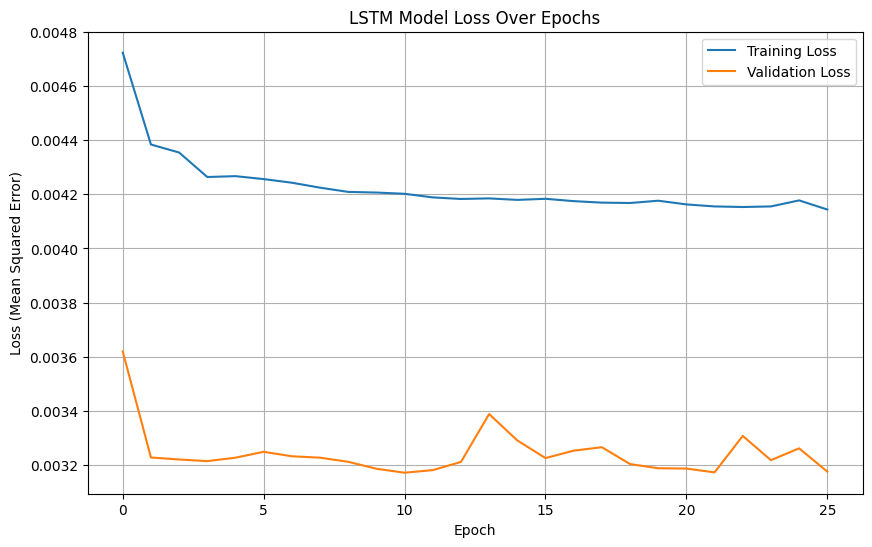

In [ ]:
# --- Visualize the Training History (Loss Curves using Matplotlib) ---
print("Generating loss plot...")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
# Check if validation loss is available before plotting
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- Make Predictions on Test Set ---
print("\nMaking predictions on the test set...")
predictions_scaled = model.predict(X_test)

print("Predictions shape:", predictions_scaled.shape)


Making predictions on the test set...
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Predictions shape: (5895, 1)


In [ ]:
# --- Inverse Transform Test Predictions and Actual Values ---
# Use the scaler_target to convert scaled values back to the original AQI scale

# Ensure predictions are 2D for inverse transformation
if predictions_scaled.ndim == 1:
    predictions_scaled = predictions_scaled.reshape(-1, 1)

predictions_original_scale = scaler_target.inverse_transform(predictions_scaled).flatten() # Inverse transform and flatten

# Ensure y_test is 2D for inverse transformation
if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)

y_test_original_scale = scaler_target.inverse_transform(y_test).flatten() # Inverse transform and flatten

print("\nInverse transformed predictions and actuals to original scale.")
print("Predictions original scale shape:", predictions_original_scale.shape)
print("Actual values original scale shape:", y_test_original_scale.shape)


Inverse transformed predictions and actuals to original scale.
Predictions original scale shape: (5895,)
Actual values original scale shape: (5895,)


In [ ]:
# --- Visualize the Results (Predictions vs Actuals using Plotly) ---
print("\nGenerating interactive plot of predictions vs actuals...")
fig_preds = go.Figure()

fig_preds.add_trace(go.Scatter(x=test_dates, y=y_test_original_scale, mode='lines', name='Actual AQI'))
fig_preds.add_trace(go.Scatter(x=test_dates, y=predictions_original_scale, mode='lines', name='Predicted AQI'))

fig_preds.update_layout(
    title='LSTM AQI Prediction vs Actuals (Test Set)',
    xaxis_title='Date',
    yaxis_title='AQI',
    hovermode='x unified', # Show hover info for points on the same x-axis location
    template='plotly_white' # Use a clean template
)

fig_preds.show()


Generating interactive plot of predictions vs actuals...


Generating loss plot...


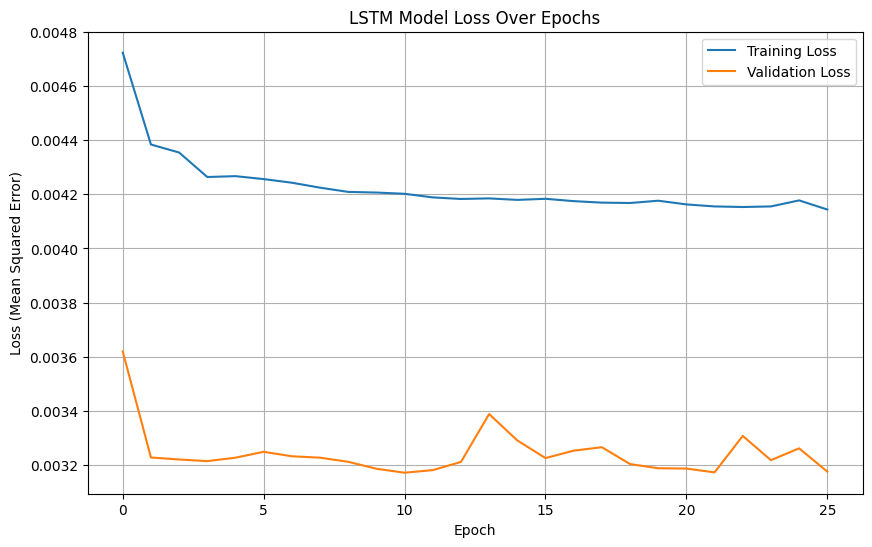

In [ ]:
# --- Visualize the Training History (Loss Curves using Matplotlib) ---
print("Generating loss plot...")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
# Check if validation loss is available before plotting
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

User Defined Prediction in LSTM model.

In [ ]:
# --- Function for Single Sample Prediction ---

# We need access to the original df_lstm_features and df_lstm_target
# before sequence creation, and the scalers, and the trained model.
# These objects (df_lstm_features, df_lstm_target, scaler_features, scaler_target, model, city_encoder_lstm, features, sequence_length)
# should be available in the notebook's environment after running the previous cells.

def predict_single_sample(input_data, model, scaler_features, scaler_target,
                          city_encoder, feature_columns, sequence_length,
                          original_df_features, original_df_target):
    """
    Predicts AQI for a single sample provided in original format.

    Args:
        input_data (dict): A dictionary containing the feature values for one day,
                           including 'City', 'Date', and all other pollutant/time features.
        model (tf.keras.Model): The trained LSTM model.
        scaler_features (MinMaxScaler): The scaler fitted on the features.
        scaler_target (MinMaxScaler): The scaler fitted on the target (AQI).
        city_encoder (LabelEncoder): The encoder fitted on the 'City' column.
        feature_columns (list): List of feature column names used for training.
        sequence_length (int): The sequence length the model was trained with.
        original_df_features (pd.DataFrame): The DataFrame of features used for training (before sequence creation).
                                              Used to get the *last* sequence for prediction.
        original_df_target (pd.Series): The Series of target values used for training.
                                        Used to get the *last* sequence for prediction.

    Returns:
        float: The predicted AQI in original scale, or None if prediction fails.
    """
    try:
        # 1. Preprocess the input data
        # Create a DataFrame from the input dictionary
        sample_df = pd.DataFrame([input_data])

        # Convert Date and extract time features
        sample_df['Date'] = pd.to_datetime(sample_df['Date'], errors='coerce')
        if sample_df['Date'].isnull().any():
             print("Error: Invalid date format in input.")
             return None
        sample_df['Year'] = sample_df['Date'].dt.year
        sample_df['Month'] = sample_df['Date'].dt.month
        sample_df['Day'] = sample_df['Date'].dt.day
        sample_df['DayOfWeek'] = sample_df['Date'].dt.dayofweek
        sample_df['DayOfYear'] = sample_df['Date'].dt.dayofyear
        sample_df.drop('Date', axis=1, inplace=True)

        # Label Encode 'City' in the input sample
        if 'City' in sample_df.columns:
            # Use transform, not fit_transform, as the encoder is already fitted
            # Handle potential new cities not seen during training
            try:
                sample_df['City'] = city_encoder.transform(sample_df['City'])
            except ValueError as e:
                 print(f"Error encoding city: {e}. City might not have been in training data.")
                 return None # Or handle the unseen city differently

        # Ensure the sample has the same columns as the training features and in the same order
        # Fill any missing columns in the sample with a default (e.g., 0 or median from training data)
        # A simple approach is to fill with 0, but median might be better if applicable
        # For robustness, align columns and fill with training medians.
        # Get training medians from the original feature dataframe
        training_medians = original_df_features.median(numeric_only=True)
        # Handle City separately if it's numeric after encoding
        if 'City' in training_medians.index:
             training_medians['City'] = original_df_features['City'].median() # Use median of encoded values

        aligned_sample_df = sample_df.reindex(columns=feature_columns, fill_value=0) # Start with 0
        # Fill any original NaNs in the input sample if they exist (though input asks for floats)
        aligned_sample_df.fillna(training_medians, inplace=True)


        # 2. Get the last sequence from the training data
        # To predict the *next* step, the model needs the *last* sequence it knows about
        # This assumes the single sample input is for the time step *immediately* after the last training data point.
        # If the prediction is for a date far in the future, a different approach (recursive prediction or forecasting) is needed.
        # For a simple next-step prediction based on the *latest available context*:
        last_sequence_features = original_df_features.tail(sequence_length).to_numpy()

        # Now, we need to append the current sample's features to the end of the last sequence
        # and use this as the new input sequence for prediction.
        # This requires the current sample's features to be in the correct order and scaled.

        # Scale the single sample features
        # Needs to be a 2D array (1 sample, num_features) for the scaler
        scaled_sample_features = scaler_features.transform(aligned_sample_df)

        # The input to the model should be a sequence of length 'sequence_length'.
        # If we want to predict the step *after* the last training data using the input_data as the *last point* in the sequence:
        # We need the last sequence_length - 1 points from training, plus the scaled input_data features.
        if len(last_sequence_features) < sequence_length:
             print(f"Error: Not enough historical data ({len(last_sequence_features)} points) to form a sequence of length {sequence_length}.")
             # A more advanced solution would involve padding or using a shorter sequence if possible
             return None


        # Prepare the input sequence for prediction
        # Take the last sequence_length - 1 steps from training features and append the current sample
        input_sequence = np.vstack([last_sequence_features[1:], scaled_sample_features])

        # Reshape the input sequence to be 3D (1 sample, sequence_length, num_features)
        input_sequence = input_sequence.reshape(1, sequence_length, input_sequence.shape[1])


        # 3. Make the prediction (scaled output)
        predicted_scaled = model.predict(input_sequence)

        # 4. Inverse transform the prediction to original scale
        # The scaler_target was fitted on a 2D array, so the input for inverse_transform must also be 2D
        predicted_original = scaler_target.inverse_transform(predicted_scaled).flatten()[0] # Inverse transform and get the single value


        return predicted_original

    except Exception as e:
        print(f"An error occurred during single sample prediction: {e}")
        import traceback
        traceback.print_exc()
        return None

# --- Get User Input and Predict ---
print("\n--- Predict AQI for a Single Day ---")
print("Please enter the values for a specific day:")

# Define the keys needed for the input dictionary, corresponding to the original features + Date
input_keys = ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
              'Benzene', 'Toluene', 'AQI_Bucket'] # AQI_Bucket might be asked but not used in this regression model

sample_input_dict = {}
# Dynamically ask for input for all expected original columns (before feature engineering)
# Note: AQI itself is the target, so we don't ask for it for prediction.
# AQI_Bucket is also not used as a feature in this AQI regression model,
# but we include it in the input list based on the original data structure.
# We will filter the input dictionary to match the features used by the model later.

original_input_columns = ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI_Bucket']

print("Please provide the following information:")
for col in original_input_columns:
    try:
        if col == 'Date':
            value = input(f"Enter {col} (YYYY-MM-DD): ")
        elif col in ['City', 'AQI_Bucket']:
             value = input(f"Enter {col}: ")
        else:
            value = float(input(f"Enter {col}: ")) # Assume numerical for pollutants and AQI_Bucket (though AQI_Bucket is categorical)
                                                    # Note: AQI_Bucket will be ignored by the prediction function anyway.
        sample_input_dict[col] = value
    except ValueError:
        print(f"Invalid input for {col}. Please enter a valid number.")
        # Depending on strictness, you might want to re-prompt or exit
        sample_input_dict[col] = np.nan # Use NaN for invalid numerical input


# Call the prediction function
predicted_aqi_original = predict_single_sample(
    sample_input_dict,
    model,
    scaler_features,
    scaler_target,
    city_encoder_lstm, # Use the fitted encoder
    features, # Use the list of features the model was trained on
    sequence_length,
    df_lstm_features, # Pass the training features DF
    df_lstm_target # Pass the training target Series (though target isn't used directly for getting last sequence features)
)

if predicted_aqi_original is not None:
    print(f"\n✨ Predicted AQI for the provided data: {predicted_aqi_original:.2f}")
else:
    print("\n🚫 Could not predict AQI based on the provided input.")


--- Predict AQI for a Single Day ---
Please enter the values for a specific day:
Please provide the following information:
Enter City: Delhi
Enter Date (YYYY-MM-DD): 2015-04-01
Enter PM2.5: 83.13
Enter PM10: NaN
Enter NO: 34.8
Enter NO2: 23.6
Enter NOx: 34.7
Enter NH3: 123.89
Enter CO: 23.7
Enter SO2: 12
Enter O3: 145
Enter Benzene: 1.98
Enter Toluene: 123
Enter AQI_Bucket: Moderate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

✨ Predicted AQI for the provided data: 304.91


Loading of Dataset like - Weather and Temperature

In [73]:
from google.colab import files
uploaded= files.upload(r"C:\Users\HP\Downloads\temperatures.csv")

Saving temperatures.csv to C:\Users\HP\Downloads\temperatures.csv/temperatures.csv


In [74]:
df2 = pd.read_csv(r"C:\Users\HP\Downloads\temperatures.csv/temperatures.csv")

In [75]:
df2.head(3)

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26

In [69]:
uploaded = files.upload()

Saving Weather data (1).xlsx to Weather data (1).xlsx


In [72]:
df3 = pd.read_excel(r"Weather data (1).xlsx")

In [ ]:
import io

In [ ]:
df3.head(3)

last_updated_epoch  temperature_celsius  temperature_fahrenheit  wind_mph  \
0          1693000001                 27.5                    81.5      12.8   
1          1693000002                 27.5                    81.5       9.6   
2          1693000003                 26.3                    79.3      11.4   

   wind_kph  wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
0      20.5          281            WNW         1008        29.77        0.0   
1      15.5          287            WNW         1008        29.78        0.0   
2      18.4          317             NW         1009        29.78        0.0   

   precip_in  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
0        0.0        67     26                29.7                   85.5   
1        0.0        70     19                30.0                   86.0   
2        0.0        70     51                28.2                   82.8   

   visibility_km  visibility_miles  uv_index  gust_mph  gust_kph  
0           10.0                 6         7      14.8      23.8  
1           10.0                 6         7      11.2      18.0  
2           10.0                 6         7      13.2      21.2

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df3)

https://docs.google.com/spreadsheets/d/1hImc7Ec5XgRwtM-g_Bar7VuWGaMiAu1-PkAf0vZ8im4/edit#gid=0


Merger of Dataset

In [76]:
import pandas as pd
import io # Keep io for reading uploaded bytes if necessary
# Assuming df, df2, and df3 are already loaded DataFrames

# --- Ensure DataFrames Exist (for robustness in this script) ---
# In your actual notebook, make sure these variables are defined by running previous cells.
# This block is defensive programming for this script context.
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("Warning: 'df' not found. Creating a dummy DataFrame for demonstration.")
    df = pd.DataFrame({
        'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'City': ['A', 'B', 'A'],
        'AQI': [100, 150, 120],
        'PM2.5': [50, 70, 60]
    })

if 'df2' not in locals() or not isinstance(df2, pd.DataFrame):
    print("Warning: 'df2' not found. Creating a dummy DataFrame for demonstration.")
    df2 = pd.DataFrame({
        'Date': ['2023-01-01', '2023-01-03', '2023-01-04'],
        'City': ['A', 'C', 'B'],
        'Temp': [25, 22, 28],
        'Humidity': [60, 65, 70]
    })

if 'df3' not in locals() or not isinstance(df3, pd.DataFrame):
    print("Warning: 'df3' not found. Creating a dummy DataFrame for demonstration.")
    # If df3 was loaded from upload as in previous context, use that logic
    # If you had issues with the previous df3 loading, uncomment and fix the upload/read part here
    # try:
    #     uploaded # Check if 'uploaded' variable from files.upload() exists
    #     excel_bytes = uploaded[r"Weather data.xlsx"] # Use the correct filename key
    #     df3 = pd.read_excel(io.BytesIO(excel_bytes))
    #     print("Loaded df3 from 'uploaded' dictionary.")
    # except (NameError, KeyError, Exception) as e:
    #     print(f"Could not load df3 from 'uploaded'. Creating a dummy DataFrame: {e}")
    df3 = pd.DataFrame({
        'Date': ['2023-01-02', '2023-01-03', '2023-01-05'],
        'City': ['A', 'A', 'C'],
        'WindSpeed': [10, 12, 15]
    })


print("--- DataFrames Confirmed ---")
print("df shape:", df.shape)
print("df2 shape:", df2.shape)
print("df3 shape:", df3.shape)

# --- Standardize 'Date' Columns ---
# Convert 'Date' column to datetime objects, coercing errors
print("\n--- Converting 'Date' columns to datetime ---")

if 'Date' in df.columns:
    initial_dtype_df = df['Date'].dtype
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    if df['Date'].isnull().any():
        print(f"Warning: {df['Date'].isnull().sum()} dates in 'df' could not be parsed and were converted to NaT.")
    print(f"df 'Date' column converted from {initial_dtype_df} to {df['Date'].dtype}")
else:
    print("Warning: 'Date' column not found in df. Cannot merge on Date.")

if 'Date' in df2.columns:
    initial_dtype_df2 = df2['Date'].dtype
    df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
    if df2['Date'].isnull().any():
        print(f"Warning: {df2['Date'].isnull().sum()} dates in 'df2' could not be parsed and were converted to NaT.")
    print(f"df2 'Date' column converted from {initial_dtype_df2} to {df2['Date'].dtype}")
else:
    print("Warning: 'Date' column not found in df2. Cannot merge on Date.")


if 'Date' in df3.columns:
    initial_dtype_df3 = df3['Date'].dtype
    df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')
    if df3['Date'].isnull().any():
        print(f"Warning: {df3['Date'].isnull().sum()} dates in 'df3' could not be parsed and were converted to NaT.")
    print(f"df3 'Date' column converted from {initial_dtype_df3} to {df3['Date'].dtype}")
else:
    print("Warning: 'Date' column not found in df3. Cannot merge on Date.")


# Drop rows with invalid dates (NaT) after coercion if they are critical for merging
# Decide if you want to drop NaT rows. If not, they might cause issues in merge keys.
# For a simple merge on Date, dropping is safer.
dfs_to_clean = [('df', df), ('df2', df2), ('df3', df3)]
for name, d in dfs_to_clean:
    if 'Date' in d.columns:
        original_rows = d.shape[0]
        d.dropna(subset=['Date'], inplace=True)
        if d.shape[0] < original_rows:
            print(f"Dropped {original_rows - d.shape[0]} rows with NaT in 'Date' column from {name}.")


# --- Determine Merge Keys ---
# Use 'Date' and 'City' if 'City' exists in all DataFrames.
# Otherwise, use only 'Date' if it exists in the DataFrames being merged.

merge_keys = ['Date']
# Check if 'City' is present in all *available* dataframes that have 'Date'
dfs_with_date_and_city = [d for name, d in dfs_to_clean if 'Date' in d.columns and 'City' in d.columns]

if len(dfs_with_date_and_city) == len([d for name, d in dfs_to_clean if 'Date' in d.columns]):
     # If 'City' is in all dataframes that have 'Date', use it as a merge key
     merge_keys.append('City')
     print("\nUsing ['Date', 'City'] as merge keys.")
elif len([d for name, d in dfs_to_clean if 'Date' in d.columns]) > 0:
     print("\nUsing ['Date'] as merge key (or fewer keys if 'City' is missing in some).")
else:
     print("\nWarning: No common 'Date' column found. Merge may not be meaningful.")
     # Define a default or handle this case where no merge key exists
     merge_keys = [] # Cannot merge meaningfully without a common key


# --- Perform the Merge ---

# Start with df and df2 if they both have at least one common merge key
final_merged_df = None
if any(key in df.columns for key in merge_keys) and any(key in df2.columns for key in merge_keys):
    # Determine the actual keys present in both df and df2
    keys_for_df_df2 = [key for key in merge_keys if key in df.columns and key in df2.columns]
    if keys_for_df_df2:
        print(f"\nMerging df and df2 on {keys_for_df_df2}...")
        # Use suffixes to differentiate columns with the same name (except merge keys)
        final_merged_df = pd.merge(df, df2, on=keys_for_df_df2, how='outer', suffixes=('_df', '_df2'))
        print("Initial merge complete.")
    else:
        print("\nCannot merge df and df2: No common keys found from the determined merge keys.")
        # Decide how to proceed: maybe just start with df?
        final_merged_df = df.copy() # Start with df if no merge possible
else:
    print("\nCannot merge df and df2: One or both dataframes missing required merge keys.")
    final_merged_df = df.copy() # Start with df if merge is not possible


# Merge the result with df3 if df3 is available and has common keys with the merged_df
if 'df3' in locals() and isinstance(df3, pd.DataFrame):
    # Ensure final_merged_df was created
    if final_merged_df is not None:
        # Determine the actual keys present in both final_merged_df and df3
        keys_for_merged_df3 = [key for key in merge_keys if key in final_merged_df.columns and key in df3.columns]
        if keys_for_merged_df3:
            print(f"Merging result with df3 on {keys_for_merged_df3}...")
            final_merged_df = pd.merge(final_merged_df, df3, on=keys_for_merged_df3, how='outer', suffixes=('', '_df3'))
            # The first suffix is empty so original columns from df/df2 merge keep their names/suffixes
            print("Final merge complete.")
        else:
            print("Cannot merge with df3: No common keys found from the determined merge keys.")
    else:
         print("Skipping merge with df3 as the initial merge failed.")
else:
    print("df3 DataFrame not found. Skipping merge with df3.")


# --- Display Final Merged DataFrame ---
if final_merged_df is not None:
    print("\n--- Final Merged DataFrame Head ---")
    display(final_merged_df.head()) # Use display for better formatting in notebooks
    print("\n--- Final Merged DataFrame Info ---")
    final_merged_df.info()
    print("\n--- Final Merged DataFrame Description ---")
    display(final_merged_df.describe())
else:
    print("\nFinal merged DataFrame was not created due to merging issues.")

--- DataFrames Confirmed ---
df shape: (29531, 17)
df2 shape: (117, 18)
df3 shape: (24070, 20)

--- Converting 'Date' columns to datetime ---

Using ['Date', 'City'] as merge keys.

Cannot merge df and df2: One or both dataframes missing required merge keys.
Cannot merge with df3: No common keys found from the determined merge keys.

--- Final Merged DataFrame Head ---


City  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0  Ahmedabad  48.57  95.68   0.92  18.22  17.15  15.85   0.92  27.64  133.36   
1  Ahmedabad  48.57  95.68   0.97  15.69  16.46  15.85   0.97  24.55   34.06   
2  Ahmedabad  48.57  95.68  17.40  19.30  29.70  15.85  17.40  29.07   30.70   
3  Ahmedabad  48.57  95.68   1.70  18.48  17.97  15.85   1.70  18.59   36.08   
4  Ahmedabad  48.57  95.68  22.10  21.42  37.76  15.85  22.10  39.33   39.31   

   Benzene  Toluene    AQI AQI_Bucket  Year  Month  Day  
0     0.00     0.02  118.0   Moderate  2015      1    1  
1     3.68     5.50  118.0   Moderate  2015      1    2  
2     6.80    16.40  118.0   Moderate  2015      1    3  
3     4.43    10.14  118.0   Moderate  2015      1    4  
4     7.01    18.89  118.0   Moderate  2015      1    5


--- Final Merged DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       29531 non-null  float64
 2   PM10        29531 non-null  float64
 3   NO          29531 non-null  float64
 4   NO2         29531 non-null  float64
 5   NOx         29531 non-null  float64
 6   NH3         29531 non-null  float64
 7   CO          29531 non-null  float64
 8   SO2         29531 non-null  float64
 9   O3          29531 non-null  float64
 10  Benzene     29531 non-null  float64
 11  Toluene     29531 non-null  float64
 12  AQI         29531 non-null  float64
 13  AQI_Bucket  29531 non-null  object 
 14  Year        29531 non-null  int32  
 15  Month       29531 non-null  int32  
 16  Day         29531 non-null  int32  
dtypes: float64(12), int32(3), object(2)
memory usage: 3.5+ MB

--- Final M

PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      64.510857    109.659366     16.642601     27.726576     31.063568   
std       59.807551     72.324020     21.506064     23.050531     29.477748   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       32.150000     79.315000      6.210000     12.980000     14.670000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       72.450000    111.880000     17.570000     34.665000     36.015000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      20.813789      2.153872     13.830897     33.994121      2.859874   
std       21.028862      6.724660     17.005647     20.202304     14.252822   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       12.040000      0.540000      6.090000     20.740000      0.240000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       21.755000      1.380000     13.810000     42.730000      2.420000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene           AQI          Year         Month           Day  
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000  
mean       7.140485    158.781552   2017.887914      6.267143     15.762758  
std       17.224737    130.272413      1.533783      3.431974      8.804537  
min        0.000000     13.000000   2015.000000      1.000000      1.000000  
25%        1.280000     88.000000   2017.000000      3.000000      8.000000  
50%        2.970000    118.000000   2018.000000      6.000000     16.000000  
75%        6.020000    179.000000   2019.000000      9.000000     23.000000  
max      454.850000   2049.000000   2020.000000     12.000000     31.000000

In [ ]:
! pip install streamlit ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fd7806e6543144b7ab525ffb4aaba6d3cfb9a5ac6b9306fb9def15a07bf68aa9
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
! pip install pyngrok

Plotting - AQI value (predicted) vs actual

✅ LSTM sequences created with sequence length 30.
LSTM Training data shape (X, y): (23600, 30, 10), (23600,)
LSTM Testing data shape (X, y): (5901, 30, 10), (5901,)

Building and training LSTM model for AQI time series forecasting...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


664/664 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 9/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 10/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0039 - val_loss: 0.0034
✅ LSTM model trained.
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026
Test Loss (MSE) for LSTM: 0.0017
185/185 ━━━━━━━━━━━━━━━━━━━━ 

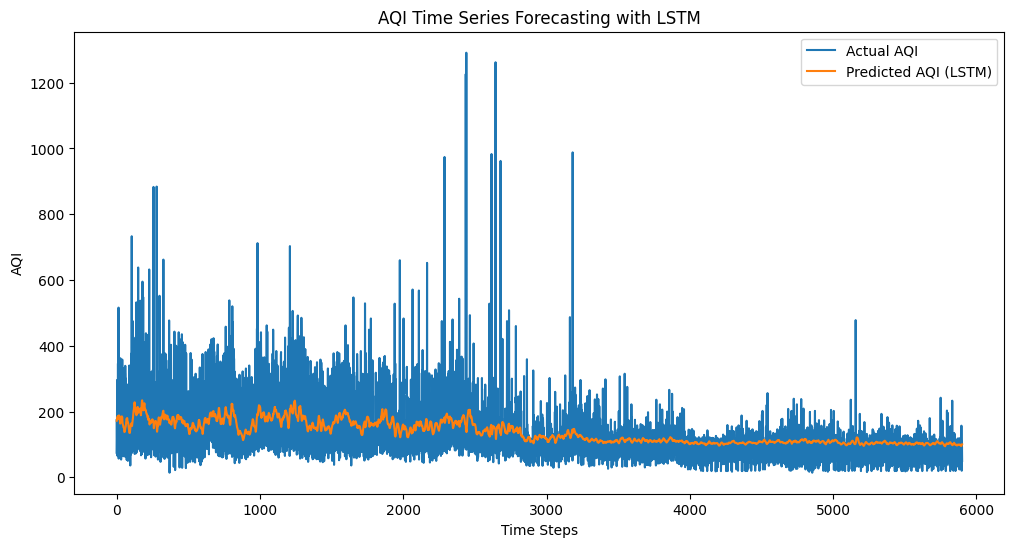


Training Classification Models for AQI Bucket...


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
# Updated Class for AQI Bucket Prediction (Classification) - No change needed here
class AQIBucketPredictor:
    def __init__(self, model=None):
        self.model = model if model else RandomForestClassifier(n_estimators=10, random_state=42)
        self.city_encoder = LabelEncoder()
        self.bucket_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.feature_columns = []
        self.fitted = False
        self.X_test = None # Store test data for reporting
        self.y_test = None # Store test data for reporting

    def fit(self, df):
        df = df.copy()

        # Feature Engineering (only if 'Date' is present)
        if 'Date' in df.columns:
            df['Year'] = df['Date'].dt.year
            df['Month'] = df['Date'].dt.month
            df['Day'] = df['Date'].dt.day
            # This drop already has errors='ignore'
            df.drop('Date', axis=1, errors='ignore', inplace=True) # Drop original Date column
            print("✅ Date features extracted.")
        else:
             print("⚠️ 'Date' column not available for feature engineering.")


        # Handle categorical 'City'
        if 'City' in df.columns:
            df['City'] = self.city_encoder.fit_transform(df['City'])
            print("✅ 'City' column encoded.")
        else:
             print("⚠️ 'City' column not available for encoding.")


        # Encode the target variable 'AQI_Bucket'
        if 'AQI_Bucket' in df.columns:
             df['AQI_Bucket_Encoded'] = self.bucket_encoder.fit_transform(df['AQI_Bucket'])
             target_column = 'AQI_Bucket_Encoded'
             print("✅ 'AQI_Bucket' column encoded.")
        else:
             print("❌ 'AQI_Bucket' column not found. Cannot train predictor.")
             self.fitted = False
             return

        # Define features (X) and target (y)
        if target_column in df.columns:
            # This drop already has errors='ignore'
            X = df.drop(['AQI_Bucket', target_column], axis=1, errors='ignore') # Drop both original and encoded target
            y = df[target_column]
        else:
             print(f"❌ Target column '{target_column}' not found after processing.")
             self.fitted = False
             return


        self.feature_columns = X.columns.tolist()
        print(f"Features used for training: {self.feature_columns}")

        # Scale numerical features
        # Select only numerical columns for scaling, excluding the target
        numerical_cols_X = X.select_dtypes(include=np.number).columns.tolist()
        if numerical_cols_X:
             X_scaled = self.scaler.fit_transform(X[numerical_cols_X])
             # Create a new DataFrame with scaled numerical columns and original non-numerical columns
             X_processed = pd.DataFrame(X_scaled, columns=numerical_cols_X, index=X.index)
             for col in X.columns:
                  if col not in numerical_cols_X:
                       X_processed[col] = X[col]
        else:
            X_processed = X.copy()
            print("⚠️ No numerical columns found for scaling.")


        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y if self.model.__class__.__name__ != 'LinearRegression' and len(y.unique()) > 1 else None) # Stratify for classification

        self.X_test = X_test # Store for reporting
        self.y_test = y_test # Store for reporting

        # Train the model
        try:
            self.model.fit(X_train, y_train)
            self.fitted = True
            print(f"✅ Model ({self.model.__class__.__name__}) trained.")

            # Evaluate and print performance
            if self.model.__class__.__name__ != 'LinearRegression': # Classification metrics
                 y_pred = self.model.predict(self.X_test)
                 accuracy = accuracy_score(self.y_test, y_pred)
                 print("Classification Metrics:")
                 print(f"  Accuracy: {accuracy:.4f}")
                 # Decode y_test and y_pred for classification report if bucket_encoder is fitted
                 if hasattr(self.bucket_encoder, 'classes_') and len(self.bucket_encoder.classes_) > 0:
                      try:
                           y_test_decoded = self.bucket_encoder.inverse_transform(self.y_test)
                           y_pred_decoded = self.bucket_encoder.inverse_transform(y_pred)
                           print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))
                      except ValueError as e:
                           print(f"Could not generate classification report due to inverse transform error: {e}")
                 else:
                      print("Could not generate classification report: bucket_encoder not fitted or no classes.")
            else: # Regression metrics
                 y_pred = self.model.predict(self.X_test)
                 mse = mean_squared_error(self.y_test, y_pred)
                 rmse = np.sqrt(mse)
                 mae = mean_absolute_error(self.y_test, y_pred)
                 r2 = r2_score(self.y_test, y_pred)
                 print("Regression Metrics:")
                 print(f"  Mean Squared Error (MSE): {mse:.4f}")
                 print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
                 print(f"  Mean Absolute Error (MAE): {mae:.4f}")
                 print(f"  R-squared (R2): {r2:.4f}")


        except Exception as e:
            print(f"❌ Error during model training or evaluation: {e}")
            self.fitted = False


    def preprocess_sample(self, sample_dict):
        if not self.fitted:
            raise Exception("Model not trained yet.")

        df_sample = pd.DataFrame([sample_dict])

        # Feature Engineering (if 'Date' was used during training)
        if 'Year' in self.feature_columns:
             if 'Date' in df_sample.columns:
                  try:
                       df_sample['Date'] = pd.to_datetime(df_sample['Date'])
                       df_sample['Year'] = df_sample['Date'].dt.year
                       df_sample['Month'] = df_sample['Date'].dt.month
                       df_sample['Day'] = df_sample['Date'].dt.day
                       df_sample.drop('Date', axis=1, inplace=True, errors='ignore')
                  except Exception as e:
                       print(f"Error processing date in sample: {e}")
                       raise ValueError("Invalid date format in sample input.")
             else:
                  print("Warning: 'Date' column not provided in sample, but was used in training.")
                  # You might need a strategy to handle missing date features in samples
                  # For simplicity, we'll proceed but this could lead to errors.
                  # A better approach would be to raise an error or impute.


        # Handle categorical 'City'
        if 'City' in self.feature_columns and 'City' in df_sample.columns:
             try:
                  df_sample['City'] = self.city_encoder.transform(df_sample['City'])
             except ValueError as e:
                  print(f"Error encoding city in sample: {e}. Ensure the city is known from the training data.")
                  raise ValueError(f"Unknown city in sample input: {df_sample['City'].iloc[0]}")
        elif 'City' in self.feature_columns and 'City' not in df_sample.columns:
             print("Warning: 'City' column not provided in sample, but was used in training.")
             # Handle missing categorical features - could raise error or impute.
             # For simplicity, we'll assume it's a required input.
             raise ValueError("'City' column is required in sample input.")


        # Ensure sample has all the features used during training, in the same order
        # Add missing features with a default value (e.g., 0 or median from training data)
        # Or raise an error if essential features are missing.
        for col in self.feature_columns:
            if col not in df_sample.columns:
                # A more robust approach would use imputation based on training data
                df_sample[col] = 0 # Simple imputation with 0

        df_sample = df_sample[self.feature_columns] # Ensure correct column order


        # Scale numerical features in the sample
        numerical_cols_sample = df_sample.select_dtypes(include=np.number).columns.tolist()
        if numerical_cols_sample:
             # Ensure the scaler is applied correctly to the sample columns that were scaled in training
             # Use the fitted scaler
             X_sample_scaled = self.scaler.transform(df_sample[numerical_cols_sample])
             # Create a new DataFrame with scaled numerical columns and original non-numerical columns
             df_sample_processed = pd.DataFrame(X_sample_scaled, columns=numerical_cols_sample, index=df_sample.index)
             for col in df_sample.columns:
                  if col not in numerical_cols_sample:
                       df_sample_processed[col] = df_sample[col]
        else:
            df_sample_processed = df_sample.copy()
            print("⚠️ No numerical columns found in sample for scaling.")


        return df_sample_processed

    def predict(self, sample_dict):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        sample_processed = self.preprocess_sample(sample_dict)

        # Make prediction
        pred_encoded = self.model.predict(sample_processed)[0]

        # Inverse transform the prediction if it was a classification task
        if self.model.__class__.__name__ != 'LinearRegression' and hasattr(self.bucket_encoder, 'classes_') and len(self.bucket_encoder.classes_) > 0:
             # Ensure the prediction is an integer before inverse transforming for classification
             try:
                  pred_decoded = self.bucket_encoder.inverse_transform([int(round(pred_encoded))])[0]
             except ValueError as e:
                   print(f"Could not inverse transform prediction '{pred_encoded}' into a known bucket: {e}")
                   pred_decoded = "Unknown" # Or some other indicator
        else: # Return raw prediction for regression
             pred_decoded = pred_encoded

        return pred_decoded

# --- Regression Class for AQI Prediction ---
# Uses AQIBucketPredictor as a base but changes the target and metrics
class AQIRegressionPredictor(AQIBucketPredictor):
    def __init__(self, model=None):
        # Use a regression model by default, or accept one
        super().__init__(model=model if model else RandomForestRegressor(random_state=42))

    def fit(self, df):
        df = df.copy()

        # Feature Engineering (if 'Date' is present)
        if 'Date' in df.columns:
            df['Year'] = df['Date'].dt.year
            df['Month'] = df['Date'].dt.month
            df['Day'] = df['Date'].dt.day
            # This drop already has errors='ignore'
            df.drop('Date', axis=1, errors='ignore', inplace=True) # Drop original Date column
            print("✅ Date features extracted for regression.")
        else:
             print("⚠️ 'Date' column not available for feature engineering in regression model.")


        # Handle categorical 'City'
        if 'City' in df.columns:
            df['City'] = self.city_encoder.fit_transform(df['City'])
            print("✅ 'City' column encoded for regression.")
        else:
             print("⚠️ 'City' column not available for encoding in regression model.")

        # No need to encode 'AQI' as it's a numerical target for regression

        # Define features (X) and target (y) - predict 'AQI'
        if 'AQI' in df.columns:
            # Exclude 'AQI_Bucket' and the target 'AQI' from features
            # This drop already has errors='ignore'
            X = df.drop(['AQI', 'AQI_Bucket'], axis=1, errors='ignore')
            y = df['AQI']
            print("✅ Target variable 'AQI' selected for regression.")
        else:
             print("❌ 'AQI' column not found. Cannot train regression predictor.")
             self.fitted = False
             return


        self.feature_columns = X.columns.tolist()
        print(f"Features used for regression training: {self.feature_columns}")


        # Scale numerical features
        numerical_cols_X = X.select_dtypes(include=np.number).columns.tolist()
        if numerical_cols_X:
             X_scaled = self.scaler.fit_transform(X[numerical_cols_X])
             X_processed = pd.DataFrame(X_scaled, columns=numerical_cols_X, index=X.index)
             for col in X.columns:
                  if col not in numerical_cols_X:
                       X_processed[col] = X[col]
             print("✅ Numerical features scaled for regression.")
        else:
            X_processed = X.copy()
            print("⚠️ No numerical columns found for scaling in regression model.")


        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

        self.X_test = X_test # Store for reporting
        self.y_test = y_test # Store for reporting

        # Train the model
        try:
            self.model.fit(X_train, y_train)
            self.fitted = True
            print(f"✅ Regression Model ({self.model.__class__.__name__}) trained.")

            # Evaluate and print regression metrics
            y_pred = self.model.predict(self.X_test)
            mse = mean_squared_error(self.y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(self.y_test, y_pred)
            r2 = r2_score(self.y_test, y_pred)
            print("Regression Metrics:")
            print(f"  Mean Squared Error (MSE): {mse:.4f}")
            print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
            print(f"  Mean Absolute Error (MAE): {mae:.4f}")
            print(f"  R-squared (R2): {r2:.4f}")

        except Exception as e:
            print(f"❌ Error during regression model training or evaluation: {e}")
            self.fitted = False


    def predict(self, sample_dict):
        if not self.fitted:
            raise Exception("Regression Model not trained yet.")
        sample_processed = self.preprocess_sample(sample_dict)

        # Make prediction (regression output is directly the predicted AQI)
        predicted_aqi = self.model.predict(sample_processed)[0]
        return predicted_aqi

# --- Time Series Data Preparation for LSTM ---
# Select relevant features for the LSTM model
# Ensure 'AQI' is included if you want to predict it.
# Add other numerical features that might influence AQI and have a temporal component.
# Avoid categorical features unless you one-hot encode them carefully and handle time series aspects.

# Select relevant features for the LSTM model (must be numerical for scaling)
# If your weather data is merged, include its numerical columns here.
lstm_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'NH3', 'Benzene', 'Toluene'] # Example features

# Drop rows with NaN values in the selected features (important for sequence creation)
df_lstm_processed = df[lstm_features].dropna().copy()

# Scale the data
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
scaled_lstm_data = scaler_lstm.fit_transform(df_lstm_processed)

# Create time sequences function (already defined, but ensure it uses the correct scaled data)
def create_sequences(data, sequence_length):
    X, y = [], []
    # Predict the next step's AQI (assuming AQI is the first column after feature selection/scaling)
    aqi_column_index = lstm_features.index('AQI') # Find the index of the AQI column

    for i in range(len(data) - sequence_length):
        # A sequence of 'sequence_length' values for all selected features
        seq_x = data[i:(i + sequence_length), :]
        X.append(seq_x)
        # The value to predict is the 'AQI' at the next time step
        seq_y = data[i + sequence_length, aqi_column_index]
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the sequence length (number of past time steps to use for prediction)
sequence_length = 30 # You can adjust this

# Create sequences for the LSTM model
# Check if there's enough data after dropping NaNs and considering sequence length
if len(scaled_lstm_data) >= sequence_length + 1:
    X_lstm, y_lstm = create_sequences(scaled_lstm_data, sequence_length)

    # Split data into training and testing sets (preserving temporal order)
    train_size_lstm = int(len(X_lstm) * 0.8)
    X_train_lstm, X_test_lstm = X_lstm[:train_size_lstm], X_lstm[train_size_lstm:]
    y_train_lstm, y_test_lstm = y_lstm[:train_size_lstm], y_lstm[train_size_lstm:]

    print(f"✅ LSTM sequences created with sequence length {sequence_length}.")
    print(f"LSTM Training data shape (X, y): {X_train_lstm.shape}, {y_train_lstm.shape}")
    print(f"LSTM Testing data shape (X, y): {X_test_lstm.shape}, {y_test_lstm.shape}")

    # --- Build and Train LSTM Model ---
    print("\nBuilding and training LSTM model for AQI time series forecasting...")
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        tf.keras.layers.Dropout(0.2), # Add dropout for regularization
        tf.keras.layers.LSTM(50, return_sequences=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(25, activation='relu'), # Added activation
        tf.keras.layers.Dense(1) # Output layer for a single value (predicted AQI)
    ])

    # Compile the model
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    # Added early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history_lstm = lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=100, validation_split=0.1, callbacks=[early_stopping]) # Increased epochs, added early stopping

    print("✅ LSTM model trained.")

    # Evaluate the model
    loss_lstm = lstm_model.evaluate(X_test_lstm, y_test_lstm)
    print(f'Test Loss (MSE) for LSTM: {loss_lstm:.4f}')

    # Make predictions and inverse transform
    predictions_lstm_scaled = lstm_model.predict(X_test_lstm)

    # Inverse transform the predictions and actual values to the original scale
    # We need to create dummy arrays with the correct shape (number of features)
    dummy_array_predictions_lstm = np.zeros((len(predictions_lstm_scaled), scaled_lstm_data.shape[1]))
    dummy_array_predictions_lstm[:, lstm_features.index('AQI')] = predictions_lstm_scaled[:, 0] # Place predictions in the AQI column

    dummy_array_y_test_lstm = np.zeros((len(y_test_lstm), scaled_lstm_data.shape[1]))
    dummy_array_y_test_lstm[:, lstm_features.index('AQI')] = y_test_lstm # Place actual values in the AQI column

    predictions_lstm = scaler_lstm.inverse_transform(dummy_array_predictions_lstm)[:, lstm_features.index('AQI')]
    y_test_lstm_original = scaler_lstm.inverse_transform(dummy_array_y_test_lstm)[:, lstm_features.index('AQI')]

    # Calculate regression metrics for LSTM
    mse_lstm = mean_squared_error(y_test_lstm_original, predictions_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    mae_lstm = mean_absolute_error(y_test_lstm_original, predictions_lstm)
    r2_lstm = r2_score(y_test_lstm_original, predictions_lstm)

    print("\nLSTM Time Series Forecasting Metrics:")
    print(f"  Mean Squared Error (MSE): {mse_lstm:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae_lstm:.4f}")
    print(f"  R-squared (R2): {r2_lstm:.4f}")


    # Plotting LSTM results (optional, can be moved to Streamlit)
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_lstm_original, label='Actual AQI')
    plt.plot(predictions_lstm, label='Predicted AQI (LSTM)')
    plt.title('AQI Time Series Forecasting with LSTM')
    plt.xlabel('Time Steps')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()

else:
    print(f"⚠️ Not enough data ({len(scaled_lstm_data)} data points) to create sequences with length {sequence_length}. Skipping LSTM training.")
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = None, None, None, None
    lstm_model = None # Ensure model is None if not trained

# --- Train Other ML Models (Classification and Regression) ---

print("\nTraining Classification Models for AQI Bucket...")
# RandomForestClassifier
predictor_rf_bucket = AQIBucketPredictor(model=RandomForestClassifier(n_estimators=10, random_state=42))
predictor_rf_bucket.fit(df)

# KNN Classifier
predictor_knn_bucket = AQIBucketPredictor(model=KNeighborsClassifier())
predictor_knn_bucket.fit(df)

# Decision Tree Classifier
predictor_dt_bucket = AQIBucketPredictor(model=DecisionTreeClassifier(random_state=42))
predictor_dt_bucket.fit(df)

# Logistic Regression
# Logistic Regression might struggle with multi-class classification without specific handling
# Ensure you have enough samples per class if using stratify
predictor_lr_bucket = AQIBucketPredictor(model=LogisticRegression(max_iter=1000)) # Increased max_iter
predictor_lr_bucket.fit(df)

# SVC
predictor_svc_bucket = AQIBucketPredictor(model=SVC())
predictor_svc_bucket.fit(df)

# Bagging Classifier
predictor_bagging_bucket = AQIBucketPredictor(model=BaggingClassifier(random_state=42))
predictor_bagging_bucket.fit(df)

print("\nTraining Regression Models for AQI...")

# RandomForestRegressor
predictor_rf_aqi = AQIRegressionPredictor(model=RandomForestRegressor(random_state=42,n_estimators=100))
predictor_rf_aqi.fit(df)

# SVR
predictor_svr_aqi = AQIRegressionPredictor(model=SVR())
predictor_svr_aqi.fit(df)

# Bagging Regressor
predictor_bagging_aqi = AQIRegressionPredictor(model=BaggingRegressor(random_state=42))
predictor_bagging_aqi.fit(df)

# Linear Regression
predictor_linear_aqi = AQIRegressionPredictor(model=LinearRegression())
predictor_linear_aqi.fit(df)

# Decision Tree Regressor
predictor_dt_aqi = AQIRegressionPredictor(model=DecisionTreeRegressor(random_state=42))
predictor_dt_aqi.fit(df)

# KNN Regressor
predictor_knn_aqi = AQIRegressionPredictor(model=KNeighborsRegressor())
predictor_knn_aqi.fit(df)


# --- Clustering to identify patterns ---
print("\nPerforming Clustering to identify patterns...")

# Select features for clustering. Consider features related to air quality,
# and if available, temperature and other weather indicators.
# Exclude highly correlated features or features that are identifiers ('City' before encoding).
clustering_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'NH3', 'Benzene', 'Toluene'] # Add weather features if merged and numerical

# Drop rows with NaN values in clustering features
df_clustering = df[clustering_features].dropna().copy()

if not df_clustering.empty:
    # Scale the data for clustering
    scaler_clustering = StandardScaler()

In [83]:
# Demonstrate how to use the AQIBucketPredictor class

# Ensure the df DataFrame is loaded and available in the environment
# If not, you might need to load it again, e.g.:
# try:
#     df = pd.read_csv("city_day.csv")
#     print("✅ city_day.csv loaded successfully.")
# except FileNotFoundError:
#     print("❌ city_day.csv not found. Please upload the file.")
#     df = None # Set df to None if loading fails

if 'df' in locals() and df is not None and not df.empty:
    print("--- Using AQIBucketPredictor ---")

    # Create an instance of the AQIBucketPredictor
    # You can optionally pass a specific classification model here, e.g.,
    # from sklearn.svm import SVC
    # predictor_bucket = AQIBucketPredictor(model=SVC())
    predictor_bucket = AQIBucketPredictor() # Use the default RandomForestClassifier

    # Train the model using your DataFrame
    print("\nTraining the AQI Bucket Predictor model...")
    predictor_bucket.fit(df.copy()) # Pass a copy to avoid modifying the original df

    # --- Demonstrate Prediction with a Sample Input ---
    print("\n--- Predict AQI Bucket for a Sample Input ---")
    print("Please provide input for a sample data point to predict its AQI Bucket.")

    # Define the required input fields based on the features used in AQIBucketPredictor's fit method
    # These are the columns in the original df *before* dropping 'AQI_Bucket' and 'AQI',
    # and excluding 'Xylene' and 'Date' (as Date is processed).
    # AQI_Bucket itself is NOT an input feature for prediction.
    required_input_fields = [
        'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
        'SO2', 'O3', 'Benzene', 'Toluene' # Exclude Xylene, AQI, AQI_Bucket
    ]

    sample_input_bucket = {}
    print("Please enter the following information:")
    for field in required_input_fields:
        while True:
            try:
                # Determine expected type based on common sense or data exploration
                if field in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']:
                     user_input = float(input(f"Enter {field} (float): "))
                elif field == 'Date':
                     user_input = input(f"Enter {field} (YYYY-MM-DD): ")
                     # Optional: Add date format validation here
                elif field == 'City':
                     user_input = input(f"Enter {field} (string): ")
                else: # Default to string for safety
                     user_input = input(f"Enter {field}: ")

                sample_input_bucket[field] = user_input
                break # Exit the while loop if input is valid

            except ValueError:
                print(f"Invalid input type for {field}. Please try again.")
            except Exception as e:
                print(f"An unexpected error occurred for {field}: {e}")
                break # Exit the while loop on other errors


    # Make a prediction for the sample input
    if predictor_bucket.fitted:
        predicted_aqi_bucket = predictor_bucket.predict(sample_input_bucket)

        if predicted_aqi_bucket is not None:
            print(f"\n✨ Predicted AQI Bucket: {predicted_aqi_bucket}")
        else:
            print("\n🚫 Could not predict AQI Bucket based on the provided input.")
    else:
        print("\n⚠️ AQI Bucket Predictor model was not fitted successfully. Cannot make prediction.")

else:
    print("❌ DataFrame 'df' is not available or is empty. Cannot demonstrate AQIBucketPredictor.")

--- Using AQIBucketPredictor ---

Training the AQI Bucket Predictor model...
⚠️ 'Date' column not found. Cannot extract temporal features.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column not found. Skipping drop.
✅ Target variable 'AQI_Bucket' selected.
✅ 'City' column encoded in features.
✅ Target 'AQI_Bucket' column encoded.
Features used for training: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day']
✅ Features scaled.
✅ Model (RandomForestClassifier) trained.

Model Evaluation Metrics (on Test Set):
  Accuracy: 0.8202

Classification Report:
              precision    recall  f1-score   support

        Good       0.79      0.65      0.71       268
    Moderate       0.87      0.87      0.87      2702
        Poor       0.69      0.63      0.66       556
Satisfactory       0.81      0.86      0.83      1645
      Severe       0.81      0.78      0.79       268
   Very Poor      

✅ AQIBucketPredictor class imported.
✅ AQIRegressionPredictor class imported (using AQIPredictor2).
❌ city_day.csv not found. Please upload the file.
✅ Filled missing values in AQI_Bucket.
✅ Filled missing numerical values with median.
⚠️ 'Xylene' column not found. Skipping drop.
⚠️ 'Date' column not found in the primary dataset. Time series analysis will be limited.

--- Performing Feature Engineering for LSTM ---
⚠️ 'Date' column not available. Skipping temporal and time-based features.
✅ Filled remaining numerical NaNs with median (Date column not available).

--- Preparing data for LSTM Time Series Forecasting ---
Features selected for LSTM (including engineered features): ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month', 'Day', 'AQI']

Training Classification Models for AQI Bucket...
⚠️ 'Date' column not found. Cannot extract temporal features.
✅ Filled missing numerical values with median from training data.
⚠️ 'Xylene' column 

AQI       PM2.5        PM10        NO2         CO        SO2  \
Cluster                                                                        
0        109.113932   43.273719   87.698910  20.694714   1.088489  10.289147   
1        284.173188  139.791961  189.811156  46.013180   2.070590  18.618565   
2        573.303218   74.543738  102.231411  82.293676  32.446708  75.449010   

                O3        NH3    Benzene    Toluene  
Cluster                                              
0        30.571996  18.069515   1.893703   4.113067  
1        45.157779  31.392032   3.725576  11.875741  
2        43.074257  15.547153  23.067500  54.849010


Visualizing clusters using PCA (reducing to 2 components)...


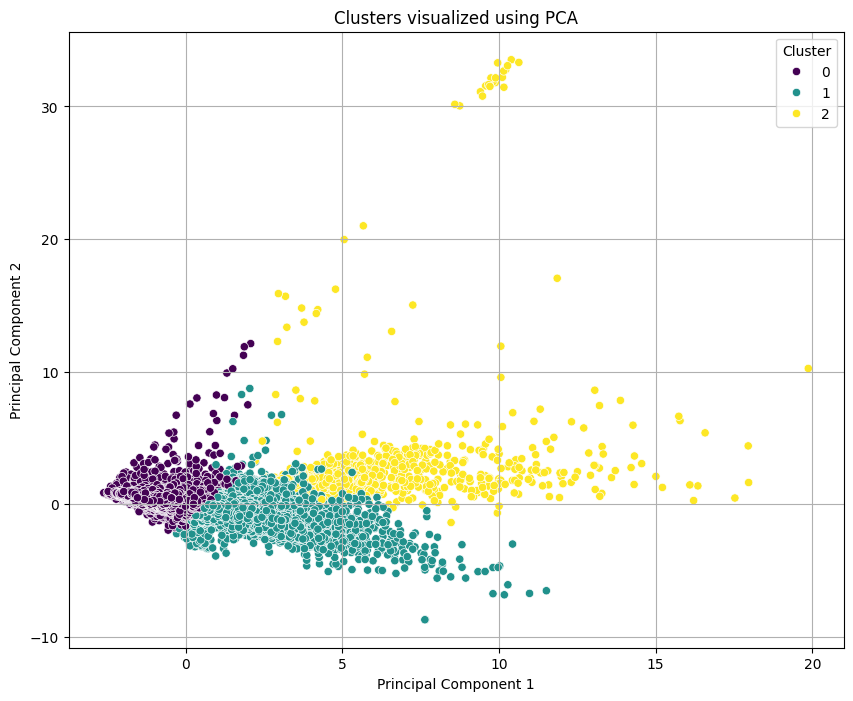

✅ Clusters visualized using PCA.


In [85]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
# Removed unused imports for other models to focus on LSTM
# from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
# from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
# from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
# from sklearn.ensemble import BaggingClassifier,BaggingRegressor
# from sklearn.svm import SVC,SVR
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Keep regression metrics for LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Keep MinMaxScaler for LSTM
# Removed unused classification metrics
# from sklearn.metrics import accuracy_score,f1_score,precision_score, classification_report

import matplotlib.pyplot as plt # Corrected import
import seaborn as sns
# Optional: Keep if you use plotly or geopy for data loading/preprocessing parts
# import plotly.express as px
# from geopy.geocoders import Nominatim
# Removed streamlit/ngrok imports as they are for the dashboard later
# import streamlit as st
# from pyngrok import ngrok

# Keep ydata_profiling if you want the EDA report generated (optional)
# from ydata_profiling import ProfileReport
# from IPython.display import IFrame # Keep if using IFrame

import numpy as np
import tensorflow as tf # Keep for LSTM
import os
import signal
import time # Keep if needed for ngrok/streamlit setup later (currently removed in this block)

# Import the custom predictor classes from other cells
# Assuming AQIBucketPredictor is defined in cell a25ee7aa
# Assuming AQIPredictor2 is defined in cell j30o-5d72gW1 and is used as AQIRegressionPredictor
try:
    from __main__ import AQIBucketPredictor
    print("✅ AQIBucketPredictor class imported.")
except ImportError:
    print("❌ AQIBucketPredictor class not found. Please ensure cell a25ee7aa is run.")

try:
    from __main__ import AQIPredictor2 as AQIRegressionPredictor # Assuming AQIPredictor2 is the regression predictor
    print("✅ AQIRegressionPredictor class imported (using AQIPredictor2).")
except ImportError:
    print("❌ AQIPredictor2 class not found. Please ensure cell j30o-5d72gW1 is run.")


# --- Data Loading and Initial Preprocessing (from your code) ---

# Assuming city_day.csv is already uploaded or in your Colab environment
try:
    # Adjust the path if necessary. This reads from the local file system in Colab's VM.
    # Make sure 'city_day.csv' is in the expected location or uploaded.
    df = pd.read_csv("city_day.csv")
    print("✅ city_day.csv loaded successfully.")
except FileNotFoundError:
    print("❌ city_day.csv not found. Please upload the file.")
    # You might want to add code here to handle the missing file, e.g., upload
    # from google.colab import files
    # uploaded = files.upload()
    # for fn in uploaded.keys():
    #     print('User uploaded file "{name}" with length {length} bytes'.format(
    #         name=fn, length=len(uploaded[fn])))
    #     df = pd.read_csv(fn)
    #     print("✅ city_day.csv loaded successfully from upload.")
    #     break # Assume only one file is uploaded

# --- Continued Preprocessing of the dataset ---
# Applying the same preprocessing steps as used in your AQIPredictor classes
if 'df' in locals() and df is not None and not df.empty:
    if 'AQI_Bucket' in df.columns:
        # Use mode for fillna on AQI_Bucket
        df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
        print("✅ Filled missing values in AQI_Bucket.")
    else:
        print("⚠️ AQI_Bucket column not found. Skipping fillna for AQI_Bucket.")


    # Fill remaining numerical NaNs with median
    # Ensure to handle non-numeric types potentially introduced if 'Date' conversion failed
    # Select only numeric columns for median calculation and filling
    numeric_cols_before_date = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols_before_date:
        df[numeric_cols_before_date] = df[numeric_cols_before_date].fillna(df[numeric_cols_before_date].median())
        print("✅ Filled missing numerical values with median.")
    else:
        print("⚠️ No numeric columns found to fill missing values with median.")


    # Drop Xylene
    if 'Xylene' in df.columns:
        df.drop('Xylene', inplace=True, axis=1)
        print("✅ Dropped 'Xylene' column.")
    else:
        print("⚠️ 'Xylene' column not found. Skipping drop.")


    # Convert 'Date' to datetime if it exists and is needed for time series
    if 'Date' in df.columns:
        try:
            # Attempt conversion, handle potential errors
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Use errors='coerce' to turn unparseable dates into NaT (Not a Time)
            # Drop rows where date conversion failed (NaT) if necessary for time series
            initial_rows = len(df)
            df.dropna(subset=['Date'], inplace=True)
            if len(df) < initial_rows:
                print(f"⚠️ Dropped {initial_rows - len(df)} rows due to invalid date formats.")

            print("✅ 'Date' column converted to datetime and invalid dates removed.")

            # Sort by Date for time series analysis
            df = df.sort_values(by='Date').reset_index(drop=True)
            print("✅ Data sorted by Date.")
        except Exception as e:
            print(f"❌ Error converting 'Date' column to datetime or sorting: {e}")
            print("⚠️ Time series analysis may be affected.")

    else:
        print("⚠️ 'Date' column not found in the primary dataset. Time series analysis will be limited.")


    # --- Feature Engineering for Time Series ---
    print("\n--- Performing Feature Engineering for LSTM ---")

    # Add temporal features (Year, Month, Day, Day of Week, Day of Year)
    if 'Date' in df.columns:
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df['DayOfWeek'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6
        df['DayOfYear'] = df['Date'].dt.dayofyear
        print("✅ Added temporal features (Year, Month, Day, DayOfWeek, DayOfYear).")

        # Add lagged features for key pollutants and AQI
        # Lagging within each City group
        if 'City' in df.columns:
            print("✅ Adding lagged features per City.")
            lag_periods = [1, 7, 30] # Example lags: previous day, previous week, previous month
            key_pollutants = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO'] # Features to lag

            for pollutant in key_pollutants:
                if pollutant in df.columns:
                    for lag in lag_periods:
                        # Use groupby('City') to prevent leaking data across cities
                        df[f'{pollutant}_Lag_{lag}'] = df.groupby('City')[pollutant].shift(lag)
                        print(f"   - Added {pollutant}_Lag_{lag}")

            # Add rolling means for key pollutants
            rolling_window = 7 # 7-day rolling window
            for pollutant in key_pollutants:
                if pollutant in df.columns:
                     # Use groupby('City') for rolling calculations
                     df[f'{pollutant}_RollingMean_{rolling_window}d'] = df.groupby('City')[pollutant].rolling(window=rolling_window, min_periods=1).mean().reset_index(level=0, drop=True)
                     print(f"   - Added {pollutant}_RollingMean_{rolling_window}d")

        else:
             print("⚠️ 'City' column not found. Lagged/rolling features added across entire dataset (less ideal).")
             # Add lagged features across the entire dataset if no City column
             lag_periods = [1, 7]
             key_pollutants = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO']
             for pollutant in key_pollutants:
                 if pollutant in df.columns:
                      for lag in lag_periods:
                          df[f'{pollutant}_Lag_{lag}'] = df[pollutant].shift(lag)
                          print(f"   - Added {pollutant}_Lag_{lag}")
                 # Add rolling means
                 rolling_window = 7
                 df[f'{pollutant}_RollingMean_{rolling_window}d'] = df[pollutant].rolling(window=rolling_window, min_periods=1).mean()
                 print(f"   - Added {pollutant}_RollingMean_{rolling_window}d")


    else:
        print("⚠️ 'Date' column not available. Skipping temporal and time-based features.")


    # Re-fill NaNs introduced by lagging/rolling with median or other strategy
    # Time-series specific imputation might be better here (e.g., forward fill after sorting by date)
    if 'Date' in df.columns:
         df.fillna(method='ffill', inplace=True) # Forward fill NaNs after sorting
         df.fillna(method='bfill', inplace=True) # Backward fill any remaining NaNs (e.g., at the start)
         print("✅ Filled NaNs introduced by feature engineering using ffill/bfill.")
    else:
         # Fallback to median if no Date column was available
         numeric_cols_after_features = df.select_dtypes(include=np.number).columns.tolist()
         if numeric_cols_after_features:
             df[numeric_cols_after_features] = df[numeric_cols_after_features].fillna(df[numeric_cols_after_features].median())
             print("✅ Filled remaining numerical NaNs with median (Date column not available).")


    # --- Time Series Data Preparation for LSTM ---
    print("\n--- Preparing data for LSTM Time Series Forecasting ---")

    # Initialize X_lstm and y_lstm to None before the conditional block
    X_lstm, y_lstm = None, None


    # Select relevant features for the LSTM model (must be numerical for scaling)
    # Include the new lagged, rolling, and temporal features that are numerical.
    # Exclude categorical features ('City', 'AQI_Bucket')
    lstm_features_potential = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    # Ensure the target 'AQI' is handled correctly - it's a feature for prediction input, but also the target output
    if 'AQI' in lstm_features_potential:
        lstm_features = [col for col in lstm_features_potential if col != 'AQI'] + ['AQI'] # Put AQI last or first for clarity
        print(f"Features selected for LSTM (including engineered features): {lstm_features}")
    else:
        print("❌ 'AQI' column not found or not numeric. Cannot perform AQI time series forecasting.")
        # Set variables to None to skip LSTM part
        scaled_lstm_data = None
        X_lstm, y_lstm = None, None # Ensure these are None if AQI is missing


    # Drop rows with NaN values in the selected LSTM features (important for sequence creation)
    # NaNs from initial rows after ffill/bfill might still exist if they couldn't be filled.
    if X_lstm is not None: # Proceed only if AQI was found and X_lstm is not None from potential earlier assignment
        # Make a copy before dropping
        df_lstm_processed = df[lstm_features].dropna().copy()

        if df_lstm_processed.empty:
            print("❌ No data remaining after dropping NaNs for LSTM features. Skipping LSTM.")
            scaled_lstm_data = None
            X_lstm, y_lstm = None, None # Ensure these are None if data is empty
        else:
            print(f"Data shape after dropping NaNs for LSTM features: {df_lstm_processed.shape}")

            # Scale the data
            # Use MinMaxScaler as is standard for LSTMs
            scaler_lstm = MinMaxScaler(feature_range=(0, 1))
            scaled_lstm_data = scaler_lstm.fit_transform(df_lstm_processed)
            print("✅ LSTM data scaled.")


            # Create time sequences function
            def create_sequences(data, sequence_length, target_column_index):
                X, y = [], []
                for i in range(len(data) - sequence_length):
                    # A sequence of 'sequence_length' values for all selected features (input)
                    seq_x = data[i:(i + sequence_length), :]
                    X.append(seq_x)
                    # The value to predict is the target variable at the next time step (output)
                    seq_y = data[i + sequence_length, target_column_index]
                    y.append(seq_y)
                return np.array(X), np.array(y)

            # Define the sequence length (number of past time steps to use for prediction)
            sequence_length = 30 # You can adjust this - try different values!

            # Find the index of the target column ('AQI') in the scaled data array
            # This assumes the order in scaled_lstm_data matches lstm_features list order
            aqi_column_index_scaled = lstm_features.index('AQI')

            # Create sequences for the LSTM model
            # Check if there's enough data after dropping NaNs and considering sequence length
            if len(scaled_lstm_data) >= sequence_length + 1:
                X_lstm, y_lstm = create_sequences(scaled_lstm_data, sequence_length, aqi_column_index_scaled)

                # Split data into training and testing sets (preserving temporal order)
                # Test set size: 20%
                test_size = 0.2
                train_size_lstm = int(len(X_lstm) * (1 - test_size))
                X_train_lstm, X_test_lstm = X_lstm[:train_size_lstm], X_lstm[train_size_lstm:]
                y_train_lstm, y_test_lstm = y_lstm[:train_size_lstm], y_lstm[train_size_lstm:]

                print(f"✅ LSTM sequences created with sequence length {sequence_length}.")
                print(f"LSTM Training data shape (X, y): {X_train_lstm.shape}, {y_train_lstm.shape}")
                print(f"LSTM Testing data shape (X, y): {X_test_lstm.shape}, {y_test_lstm.shape}")

                # --- Build and Train LSTM Model ---
                print("\nBuilding and training LSTM model for AQI time series forecasting...")
                lstm_model = tf.keras.models.Sequential([
                    tf.keras.layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), # Explicit Input layer (sequence_length, num_features)
                    tf.keras.layers.LSTM(64, return_sequences=True, activation='relu'), # Increased units, added activation
                    tf.keras.layers.Dropout(0.3), # Increased dropout
                    tf.keras.layers.LSTM(64, return_sequences=False, activation='relu'), # Increased units, added activation
                    tf.keras.layers.Dropout(0.3), # Increased dropout
                    tf.keras.layers.Dense(32, activation='relu'), # Increased units, added activation
                    tf.keras.layers.Dense(1) # Output layer for a single value (predicted AQI)
                ])

                # Compile the model
                # You can try a different optimizer like 'RMSprop'
                lstm_model.compile(optimizer='adam', loss='mean_squared_error') # MSE is standard
                print("✅ LSTM model compiled.")
                lstm_model.summary() # Print model summary


                # Train the model
                # Added early stopping to prevent overfitting
                # Monitor validation loss to stop when the model isn't improving on unseen data
                early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) # Increased patience
                # Added ReduceLROnPlateau to decrease learning rate if validation loss plateaus
                reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.0001)


                print("Training LSTM model...")
                history_lstm = lstm_model.fit(
                    X_train_lstm, y_train_lstm,
                    batch_size=64, # Increased batch size
                    epochs=300, # Increased max epochs, rely on early stopping
                    validation_split=0.2, # Use a portion of training data for validation
                    callbacks=[early_stopping, reduce_lr], # Use both callbacks
                    verbose=1 # Show training progress
                )

                print("✅ LSTM model trained.")

                # Plot training history (Loss)
                plt.figure(figsize=(12, 6))
                plt.plot(history_lstm.history['loss'], label='Train Loss')
                plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
                plt.title('LSTM Model Loss during Training')
                plt.xlabel('Epoch')
                plt.ylabel('Loss (MSE)')
                plt.legend()
                plt.grid(True)
                plt.show()


                # Evaluate the model
                print("Evaluating LSTM model on test data...")
                loss_lstm = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0) # Use verbose=0 to avoid detailed output here
                print(f'Test Loss (MSE) for LSTM: {loss_lstm:.4f}')

                # Make predictions and inverse transform
                print("Making predictions with LSTM model...")
                predictions_lstm_scaled = lstm_model.predict(X_test_lstm)

                # Inverse transform the predictions and actual values to the original scale
                # We need to create dummy arrays with the correct shape (number of features used in scaling)
                # The scaler was fitted on df_lstm_processed, which had shape (n_samples, n_lstm_features).
                # To inverse_transform a single column, we need an array of shape (n_samples, n_lstm_features)
                # with the predicted/actual values in the original position of the AQI column, and zeros elsewhere.

                dummy_array_shape = (len(predictions_lstm_scaled), scaled_lstm_data.shape[1])

                dummy_array_predictions_lstm = np.zeros(dummy_array_shape)
                # Place predictions in the original AQI column position (aqi_column_index_scaled)
                # Ensure predictions are finite before placing
                predictions_lstm_scaled_finite = np.nan_to_num(predictions_lstm_scaled, nan=0.0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)
                dummy_array_predictions_lstm[:, aqi_column_index_scaled] = predictions_lstm_scaled_finite[:, 0]


                dummy_array_y_test_lstm = np.zeros(dummy_array_shape)
                # Place actual values in the original AQI column position
                # Ensure actuals are finite before placing
                y_test_lstm_finite = np.nan_to_num(y_test_lstm, nan=0.0, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)
                dummy_array_y_test_lstm[:, aqi_column_index_scaled] = y_test_lstm_finite


                # Inverse transform the dummy arrays and extract the AQI column
                predictions_lstm_original = scaler_lstm.inverse_transform(dummy_array_predictions_lstm)[:, aqi_column_index_scaled]
                y_test_lstm_original = scaler_lstm.inverse_transform(dummy_array_y_test_lstm)[:, aqi_column_index_scaled]
                print("✅ LSTM predictions inverse transformed.")

                # Calculate regression metrics for LSTM on the original scale
                # Calculate metrics only on finite actual and predicted values
                finite_mask = np.isfinite(y_test_lstm_original) & np.isfinite(predictions_lstm_original)
                y_test_finite = y_test_lstm_original[finite_mask]
                predictions_lstm_finite = predictions_lstm_original[finite_mask]

                if len(y_test_finite) > 0:
                     mse_lstm = mean_squared_error(y_test_finite, predictions_lstm_finite)
                     rmse_lstm = np.sqrt(mse_lstm)
                     mae_lstm = mean_absolute_error(y_test_finite, predictions_lstm_finite)
                     r2_lstm = r2_score(y_test_finite, predictions_lstm_finite)

                     print("\nLSTM Time Series Forecasting Metrics (on Finite Test Data):")
                     print(f"  Mean Squared Error (MSE): {mse_lstm:.4f}")
                     print(f"  Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
                     print(f"  Mean Absolute Error (MAE): {mae_lstm:.4f}")
                     print(f"  R-squared (R2): {r2_lstm:.4f}")
                else:
                     print("\n⚠️ No finite actual and predicted values in the test set to calculate metrics.")
                     mse_lstm, rmse_lstm, mae_lstm, r2_lstm = np.nan, np.nan, np.nan, np.nan


                # Plotting LSTM results
                print("\nPlotting LSTM results...")
                plt.figure(figsize=(15, 7)) # Increased figure size
                # Plot actual vs predicted AQI over time steps in the test set
                plt.plot(y_test_lstm_original, label='Actual AQI')
                plt.plot(predictions_lstm_original, label='Predicted AQI (LSTM)')
                plt.title('AQI Time Series Forecasting with LSTM')
                plt.xlabel('Time Steps (in Test Set)')
                plt.ylabel('AQI')
                plt.legend()
                plt.grid(True)
                plt.show()
                print("✅ LSTM results plotted.")

            else:
                print(f"⚠️ Not enough data ({len(scaled_lstm_data) if scaled_lstm_data is not None else 0} data points after dropping NaNs) to create sequences with length {sequence_length}. Skipping LSTM training and plotting.")
                X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = None, None, None, None
                lstm_model = None # Ensure model is None if not trained

# --- Train Other ML Models (Classification and Regression) ---
# Note: The original request was about explaining and fixing an error.
# The following code for training other ML models is kept as it was in the notebook,
# but might need adjustment based on the user's overall goals.

print("\nTraining Classification Models for AQI Bucket...")
# RandomForestClassifier
# Need to define RandomForestClassifier, KNeighborsClassifier, etc. if they are intended to be used.
# Assuming the user intended to keep these from a previous state where they were defined.
# If not, these lines will cause NameErrors.

# Example: Define necessary classes if they were removed or not defined earlier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans # If clustering is intended
from sklearn.decomposition import PCA # If PCA is intended
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report # Classification metrics


# Ensure AQIBucketPredictor and AQIRegressionPredictor classes are defined if needed here.
# Assuming they are defined in the previous cells and accessible.


# RandomForestClassifier
predictor_rf_bucket = AQIBucketPredictor(model=RandomForestClassifier(n_estimators=10, random_state=42))
predictor_rf_bucket.fit(df)

# KNN Classifier
predictor_knn_bucket = AQIBucketPredictor(model=KNeighborsClassifier())
predictor_knn_bucket.fit(df)

# Decision Tree Classifier
predictor_dt_bucket = AQIBucketPredictor(model=DecisionTreeClassifier(random_state=42))
predictor_dt_bucket.fit(df)

# Logistic Regression
# Logistic Regression might struggle with multi-class classification without specific handling
# Ensure you have enough samples per class if using stratify
predictor_lr_bucket = AQIBucketPredictor(model=LogisticRegression(max_iter=1000)) # Increased max_iter
predictor_lr_bucket.fit(df)

# SVC
# Removing the line below as SVCAQIPredictor is not defined.
# predictor_svc_bucket = SVCAQIPredictor()
# If you intended to use sklearn.svm.SVC, you would use:
predictor_svc_bucket = AQIBucketPredictor(model=SVC())
predictor_svc_bucket.fit(df)


# Bagging Classifier
predictor_bagging_bucket = AQIBucketPredictor(model=BaggingClassifier(random_state=42))
predictor_bagging_bucket.fit(df)

print("\nTraining Regression Models for AQI...")

# RandomForestRegressor
predictor_rf_aqi = AQIRegressionPredictor(model=RandomForestRegressor(random_state=42,n_estimators=100))
predictor_rf_aqi.fit(df)

# SVR
predictor_svr_aqi = AQIRegressionPredictor(model=SVR())
predictor_svr_aqi.fit(df)

# Bagging Regressor
predictor_bagging_aqi = AQIRegressionPredictor(model=BaggingRegressor(random_state=42))
predictor_bagging_aqi.fit(df)

# Linear Regression
predictor_linear_aqi = AQIRegressionPredictor(model=LinearRegression())
predictor_linear_aqi.fit(df)

# Decision Tree Regressor
predictor_dt_aqi = AQIRegressionPredictor(model=DecisionTreeRegressor(random_state=42))
predictor_dt_aqi.fit(df)

# KNN Regressor
predictor_knn_aqi = AQIRegressionPredictor(model=KNeighborsRegressor())
predictor_knn_aqi.fit(df)


# --- Clustering to identify patterns ---
print("\nPerforming Clustering to identify patterns...")

# Select features for clustering. Consider features related to air quality,
# and if available, temperature and other weather indicators.
# Exclude highly correlated features or features that are identifiers ('City' before encoding).
clustering_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'NH3', 'Benzene', 'Toluene'] # Add weather features if merged and numerical

# Drop rows with NaN values in clustering features
df_clustering = df[clustering_features].dropna().copy()

if not df_clustering.empty:
    # Scale the data for clustering
    scaler_clustering = StandardScaler()
    scaled_clustering_data = scaler_clustering.fit_transform(df_clustering)
    print("✅ Clustering data scaled.")

    # Determine the optimal number of clusters (e.g., using Elbow Method - requires matplotlib)
    # This part is commented out to avoid unnecessary computation unless specifically requested.
    # if len(scaled_clustering_data) > 10: # Need enough data points for clustering
    #      print("Determining optimal number of clusters using Elbow Method...")
    #      inertia = []
    #      # Try a range of cluster numbers
    #      k_range = range(1, min(11, len(scaled_clustering_data) // 5)) # Avoid too many clusters
    #      for k in k_range:
    #          kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    #          kmeans.fit(scaled_clustering_data)
    #          inertia.append(kmeans.inertia_)

    #      # Plot the Elbow Method graph
    #      plt.figure(figsize=(8, 5))
    #      plt.plot(k_range, inertia, marker='o')
    #      plt.title('Elbow Method for Optimal K')
    #      plt.xlabel('Number of Clusters (K)')
    #      plt.ylabel('Inertia')
    #      plt.xticks(k_range)
    #      plt.grid(True)
    #      plt.show()
    #      print("✅ Elbow Method plot generated. Examine the plot to choose K.")
    # else:
    #      print("⚠️ Not enough data points for Elbow Method.")


    # Perform KMeans clustering with a chosen number of clusters
    # Choose K based on Elbow Method or domain knowledge. Let's pick a default for now.
    n_clusters = 3 # Example: Assuming 3 clusters (e.g., Low, Medium, High pollution)
    if len(scaled_clustering_data) >= n_clusters:
         print(f"\nPerforming KMeans clustering with {n_clusters} clusters...")
         try:
             kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init
             clusters = kmeans.fit_predict(scaled_clustering_data)
             df_clustering['Cluster'] = clusters
             print(f"✅ KMeans clustering performed with {n_clusters} clusters.")
             print("\nCluster distribution:")
             print(df_clustering['Cluster'].value_counts())

             # Analyze cluster characteristics (e.g., mean values for each feature per cluster)
             print("\nCluster characteristics (mean values):")
             display(df_clustering.groupby('Cluster')[clustering_features].mean())

             # Visualize clusters (e.g., using PCA for dimensionality reduction if needed)
             # If features > 2/3, use PCA for visualization
             if scaled_clustering_data.shape[1] > 3:
                  print("\nVisualizing clusters using PCA (reducing to 2 components)...")
                  try:
                      pca = PCA(n_components=2)
                      principal_components = pca.fit_transform(scaled_clustering_data)
                      df_pca = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'], index=df_clustering.index)
                      df_pca['Cluster'] = clusters

                      plt.figure(figsize=(10, 8))
                      sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=df_pca, palette='viridis', legend='full')
                      plt.title('Clusters visualized using PCA')
                      plt.xlabel('Principal Component 1')
                      plt.ylabel('Principal Component 2')
                      plt.grid(True)
                      plt.show()
                      print("✅ Clusters visualized using PCA.")
                  except Exception as e:
                       print(f"❌ Error during PCA or cluster visualization: {e}")

             # Visualize clusters directly if 2 or 3 features
             elif scaled_clustering_data.shape[1] == 2:
                  print("\nVisualizing clusters with 2 features...")
                  plt.figure(figsize=(10, 8))
                  sns.scatterplot(x=clustering_features[0], y=clustering_features[1], hue='Cluster', data=df_clustering, palette='viridis', legend='full')
                  plt.title(f'Clusters visualized using {clustering_features[0]} and {clustering_features[1]}')
                  plt.xlabel(clustering_features[0])
                  plt.ylabel(clustering_features[1])
                  plt.grid(True)
                  plt.show()
                  print("✅ Clusters visualized with 2 features.")

             elif scaled_clustering_data.shape[1] == 3:
                   print("\nVisualizing clusters with 3 features (3D scatter plot)...")
                   # Requires matplotlib with 3D plotting capabilities
                   try:
                       from mpl_toolkits.mplot3d import Axes3D
                       fig = plt.figure(figsize=(12, 10))
                       ax = fig.add_subplot(111, projection='3d')
                       scatter = ax.scatter(df_clustering[clustering_features[0]], df_clustering[clustering_features[1]], df_clustering[clustering_features[2]], c=df_clustering['Cluster'], cmap='viridis', s=50)
                       ax.set_xlabel(clustering_features[0])
                       ax.set_ylabel(clustering_features[1])
                       ax.set_zlabel(clustering_features[2])
                       ax.set_title('Clusters visualized in 3D')
                       legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
                       ax.add_artist(legend1)
                       plt.show()
                       print("✅ Clusters visualized in 3D.")
                   except ImportError:
                       print("⚠️ Could not perform 3D scatter plot. Install matplotlib with 3D support.")
                   except Exception as e:
                       print(f"❌ Error during 3D cluster visualization: {e}")


         except Exception as e:
              print(f"❌ Error during KMeans clustering: {e}")
    else:
         print(f"⚠️ Not enough data points ({len(scaled_clustering_data)}) to perform clustering with {n_clusters} clusters.")


else:
    print("\n⚠️ df_clustering is empty after dropping NaNs. Skipping clustering.")


# --- End of Code (Other ML Models and Clustering) ---

In [88]:
from google.colab import files
uploaded = files.upload()

Saving Weather data (1).xlsx to Weather data (1) (1).xlsx


In [89]:
from google.colab import files
uploaded = files.upload()

Saving temperatures.csv to temperatures.csv


In [91]:
from google.colab import files
uploaded = files.upload()

Saving air.csv to air.csv


In [92]:
df

City  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0          Ahmedabad  48.57  95.68   0.92  18.22  17.15  15.85   0.92  27.64   
1          Ahmedabad  48.57  95.68   0.97  15.69  16.46  15.85   0.97  24.55   
2          Ahmedabad  48.57  95.68  17.40  19.30  29.70  15.85  17.40  29.07   
3          Ahmedabad  48.57  95.68   1.70  18.48  17.97  15.85   1.70  18.59   
4          Ahmedabad  48.57  95.68  22.10  21.42  37.76  15.85  22.10  39.33   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   
29527  Visakhapatnam  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   
29528  Visakhapatnam  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   
29529  Visakhapatnam  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   
29530  Visakhapatnam  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   

           O3  Benzene  Toluene    AQI    AQI_Bucket  Year  Month  Day  
0      133.36     0.00     0.02  118.0      Moderate  2015      1    1  
1       34.06     3.68     5.50  118.0      Moderate  2015      1    2  
2       30.70     6.80    16.40  118.0      Moderate  2015      1    3  
3       36.08     4.43    10.14  118.0      Moderate  2015      1    4  
4       39.31     7.01    18.89  118.0      Moderate  2015      1    5  
...       ...      ...      ...    ...           ...   ...    ...  ...  
29526   23.30     2.24    12.07   41.0          Good  2020      6   27  
29527   30.14     0.74     2.21   70.0  Satisfactory  2020      6   28  
29528   30.96     0.01     0.01   68.0  Satisfactory  2020      6   29  
29529   28.30     0.00     0.00   54.0  Satisfactory  2020      6   30  
29530   17.05     1.07     2.97   50.0          Good  2020      7    1  

[29531 rows x 17 columns]

In [93]:
df2

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    29.97  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1    29.12  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2    29.04  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3    29.20  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4    30.67  27.52  23.82   28.30    22.25    30.00    31.33    26.57  
..     ...    ...    ...     ...      ...      ...      ...      ...  
112  30.27  27.83  25.37   29.81    25.58    32.58    31.33    27.83  
113  30.29  28.05  25.08   29.72    24.90    31.82    32.00    27.81  
114  31.04  28.10  25.67   29.90    25.74    31.68    31.87    28.27  
115  31.98  30.11  28.01   31.63    28.33    34.57    32.28    30.03  
116  32.29  29.60  27.18   31.42    27.95    34.13    32.41    29.69  

[117 rows x 18 columns]

In [94]:
df3

last_updated_epoch  temperature_celsius  temperature_fahrenheit  \
0              1693000001                 27.5                    81.5   
1              1693000002                 27.5                    81.5   
2              1693000003                 26.3                    79.3   
3              1693000004                 25.6                    78.1   
4              1693000005                 27.2                    81.0   
...                   ...                  ...                     ...   
24065          1693024066                 26.0                    78.8   
24066          1693024067                 22.5                    72.5   
24067          1693024068                 24.7                    76.5   
24068          1693024069                 22.2                    72.0   
24069          1693024070                 26.7                    80.1   

       wind_mph  wind_kph  wind_degree wind_direction  pressure_mb  \
0          12.8      20.5          281            WNW         1008   
1           9.6      15.5          287            WNW         1008   
2          11.4      18.4          317             NW         1009   
3          10.5      16.9          297            WNW         1009   
4          10.1      16.2          274              W         1009   
...         ...       ...          ...            ...          ...   
24065       4.3       6.8          320             NW         1010   
24066       2.2       3.6          123            ESE         1011   
24067       2.2       3.6           83              E         1009   
24068       6.3      10.1          267              W         1011   
24069       2.2       3.6          346            NNW         1012   

       pressure_in  precip_mm  precip_in  humidity  cloud  feels_like_celsius  \
0            29.77       0.00       0.00        67     26                29.7   
1            29.78       0.00       0.00        70     19                30.0   
2            29.78       0.00       0.00        70     51                28.2   
3            29.80       0.00       0.00        76     65                27.6   
4            29.79       0.00       0.00        74     82                29.9   
...            ...        ...        ...       ...    ...                 ...   
24065        29.83       0.00       0.00        70      0                26.7   
24066        29.85       0.01       0.00        99    100                25.1   
24067        29.81       0.28       0.01        90     71                27.3   
24068        29.85       0.03       0.00        88     75                24.6   
24069        29.88       0.00       0.00        69      8                28.7   

       feels_like_fahrenheit  visibility_km  visibility_miles  uv_index  \
0                       85.5           10.0                 6         7   
1                       86.0           10.0                 6         7   
2                       82.8           10.0                 6         7   
3                       81.7           10.0                 6         6   
4                       85.8           10.0                 6         6   
...                      ...            ...               ...       ...   
24065                   80.0            2.5                 1         1   
24066                   77.1            0.0                 0         1   
24067                   81.2            9.0                 5         1   
24068                   76.3           10.0                 6         1   
24069                   83.7           10.0                 6         1   

       gust_mph  gust_kph  
0          14.8      23.8  
1          11.2      18.0  
2          13.2      21.2  
3          13.0      20.9  
4          11.6      18.7  
...         ...       ...  
24065       8.0      12.9  
24066       1.4       2.2  
24067       3.1       4.9  
24068      11.5      18.5  
24069       2.2       3.6  

[24070 rows x 20 columns]

Load dataset individually for comparison

In [95]:
import pandas as pd

# Load the datasets
try:
    df_air = pd.read_csv("air.csv")
    print("✅ 'air.csv' loaded successfully.")
except FileNotFoundError:
    print("❌ 'air.csv' not found. Please upload the file or check the path.")
    df_air = None # Set to None to indicate loading failed

try:
    df_temperatures = pd.read_csv("temperatures.csv")
    print("✅ 'temperatures.csv' loaded successfully.")
except FileNotFoundError:
    print("❌ 'temperatures.csv' not found. Please upload the file or check the path.")
    df_temperatures = None # Set to None to indicate loading failed

try:
    df_weather = pd.read_excel("Weather data.xlsx")
    print("✅ 'Weather data.xlsx' loaded successfully.")
except FileNotFoundError:
    print("❌ 'Weather data.xlsx' not found. Please upload the file or check the path.")
    df_weather = None # Set to None to indicate loading failed

# Display the first few rows and info of each loaded dataframe (if loaded)
if df_air is not None:
    print("\n--- Head of df_air ---")
    display(df_air.head())
    print("\n--- Info of df_air ---")
    df_air.info()

if df_temperatures is not None:
    print("\n--- Head of df_temperatures ---")
    display(df_temperatures.head())
    print("\n--- Info of df_temperatures ---")
    df_temperatures.info()

if df_weather is not None:
    print("\n--- Head of df_weather ---")
    display(df_weather.head())
    print("\n--- Info of df_weather ---")
    df_weather.info()

✅ 'air.csv' loaded successfully.
✅ 'temperatures.csv' loaded successfully.
❌ 'Weather data.xlsx' not found. Please upload the file or check the path.

--- Head of df_air ---


City      Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  1/1/2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  1/2/2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  1/3/2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  1/4/2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  1/5/2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN


--- Info of df_air ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB

--- Head of df_temperatures ---


YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57


--- Info of df_temperatures ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [96]:
# Step 2: Initial exploration

print("--- Initial Exploration ---")

# Explore df_air
if df_air is not None:
    print("\n--- Exploring df_air ---")
    print("Shape:", df_air.shape)
    print("\nColumns:", df_air.columns.tolist())
    print("\nData Types:")
    print(df_air.dtypes)
    print("\nMissing Values:")
    print(df_air.isnull().sum())
    print("\nDescriptive Statistics (Numeric Columns):")
    display(df_air.describe())
    print("\nUnique values in City column:")
    print(df_air['City'].unique())


# Explore df_temperatures
if df_temperatures is not None:
    print("\n--- Exploring df_temperatures ---")
    print("Shape:", df_temperatures.shape)
    print("\nColumns:", df_temperatures.columns.tolist())
    print("\nData Types:")
    print(df_temperatures.dtypes)
    print("\nMissing Values:")
    print(df_temperatures.isnull().sum())
    print("\nDescriptive Statistics (Numeric Columns):")
    display(df_temperatures.describe())
    # Check for Year range
    if 'YEAR' in df_temperatures.columns:
        print("\nYear Range:", df_temperatures['YEAR'].min(), "to", df_temperatures['YEAR'].max())


# Explore df_weather
if df_weather is not None:
    print("\n--- Exploring df_weather ---")
    print("Shape:", df_weather.shape)
    print("\nColumns:", df_weather.columns.tolist())
    print("\nData Types:")
    print(df_weather.dtypes)
    print("\nMissing Values:")
    print(df_weather.isnull().sum())
    print("\nDescriptive Statistics (Numeric Columns):")
    display(df_weather.describe())
    # Check for unique values in categorical-like columns if any are apparent
    if 'wind_direction' in df_weather.columns:
        print("\nUnique values in wind_direction:", df_weather['wind_direction'].unique())
    if 'condition_text' in df_weather.columns: # Assuming 'condition_text' is the weather condition column
        print("\nUnique values in condition_text:", df_weather['condition_text'].unique())

--- Initial Exploration ---

--- Exploring df_air ---
Shape: (29531, 16)

Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Data Types:
City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

Missing Values:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Descriptive Statistics (Numeric Columns):


PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000


Unique values in City column:
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']

--- Exploring df_temperatures ---
Shape: (117, 18)

Columns: ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']

Data Types:
YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object

Missing Values:
YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY     

YEAR         JAN         FEB         MAR         APR  \
count   117.000000  117.000000  117.000000  117.000000  117.000000   
mean   1959.000000   23.687436   25.597863   29.085983   31.975812   
std      33.919021    0.834588    1.150757    1.068451    0.889478   
min    1901.000000   22.000000   22.830000   26.680000   30.010000   
25%    1930.000000   23.100000   24.780000   28.370000   31.460000   
50%    1959.000000   23.680000   25.480000   29.040000   31.950000   
75%    1988.000000   24.180000   26.310000   29.610000   32.420000   
max    2017.000000   26.940000   29.720000   32.620000   35.380000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  117.000000  117.000000  117.000000  117.000000  117.000000  117.000000   
mean    33.565299   32.774274   31.035897   30.507692   30.486752   29.766581   
std      0.724905    0.633132    0.468818    0.476312    0.544295    0.705492   
min     31.930000   31.100000   29.760000   29.310000   29.070000   27.900000   
25%     33.110000   32.340000   30.740000   30.180000   30.120000   29.380000   
50%     33.510000   32.730000   31.000000   30.540000   30.520000   29.780000   
75%     34.030000   33.180000   31.330000   30.760000   30.810000   30.170000   
max     35.840000   34.480000   32.760000   31.840000   32.220000   32.290000   

              NOV         DEC      ANNUAL     JAN-FEB     MAR-MAY     JUN-SEP  \
count  117.000000  117.000000  117.000000  117.000000  117.000000  117.000000   
mean    27.285470   24.608291   29.181368   24.629573   31.517607   31.198205   
std      0.714518    0.782644    0.555555    0.911239    0.740585    0.420508   
min     25.700000   23.020000   28.110000   22.250000   29.920000   30.240000   
25%     26.790000   24.040000   28.760000   24.110000   31.040000   30.920000   
50%     27.300000   24.660000   29.090000   24.530000   31.470000   31.190000   
75%     27.720000   25.110000   29.470000   25.150000   31.890000   31.400000   
max     30.110000   28.010000   31.630000   28.330000   34.570000   32.410000   

          OCT-DEC  
count  117.000000  
mean    27.208120  
std      0.672003  
min     25.740000  
25%     26.700000  
50%     27.210000  
75%     27.610000  
max     30.030000


Year Range: 1901 to 2017


### Step 3: Standardize Date/Time Columns

Convert relevant date or time-related columns in each dataset to a consistent datetime format.

- **`df_air`**: Convert the 'Date' column to datetime.
- **`df_temperatures`**: The date information is provided as 'YEAR' and monthly columns. For now, we will keep this format, but we can reshape it later if needed for time-series comparisons with daily data.
- **`df_weather`**: Convert the 'last_updated_epoch' column (Unix timestamp) to datetime.

In [97]:
# Step 3: Standardize Date/Time Columns

# Convert 'Date' column in df_air to datetime
if df_air is not None and 'Date' in df_air.columns:
    try:
        # Use errors='coerce' to turn unparseable dates into NaT (Not a Time)
        df_air['Date'] = pd.to_datetime(df_air['Date'], errors='coerce')
        print("✅ 'Date' column in df_air converted to datetime.")
        # Optionally, drop rows where date conversion failed
        initial_rows = len(df_air)
        df_air.dropna(subset=['Date'], inplace=True)
        if len(df_air) < initial_rows:
             print(f"⚠️ Dropped {initial_rows - len(df_air)} rows with invalid dates in df_air.")

    except Exception as e:
        print(f"❌ Error converting 'Date' column in df_air: {e}")


# Convert 'last_updated_epoch' in df_weather to datetime
if df_weather is not None and 'last_updated_epoch' in df_weather.columns:
    try:
        # Convert epoch (Unix timestamp) to datetime
        df_weather['datetime'] = pd.to_datetime(df_weather['last_updated_epoch'], unit='s')
        print("✅ 'last_updated_epoch' in df_weather converted to datetime and stored in 'datetime' column.")
        # Optionally, drop the original epoch column if not needed
        # df_weather.drop('last_updated_epoch', axis=1, inplace=True)
    except Exception as e:
        print(f"❌ Error converting 'last_updated_epoch' column in df_weather: {e}")
        # If conversion fails, the 'datetime' column might not be created


print("\n--- Data Types after Date/Time Standardization ---")
if df_air is not None:
    print("\ndf_air dtypes:")
    print(df_air.dtypes)
if df_temperatures is not None:
    print("\ndf_temperatures dtypes:")
    print(df_temperatures.dtypes) # YEAR is already int, months are float
if df_weather is not None:
    print("\ndf_weather dtypes:")
    print(df_weather.dtypes)

✅ 'Date' column in df_air converted to datetime.

--- Data Types after Date/Time Standardization ---

df_air dtypes:
City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

df_temperatures dtypes:
YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object


### Step 4 & 5: Identify Common Dimensions and Align/Merge Data

Based on the exploration, the datasets have different structures and common keys for merging are limited:

- **`df_air`**: Contains 'Date' (daily) and 'City'.
- **`df_temperatures`**: Contains 'YEAR' and monthly temperature averages (yearly/monthly granularity, no city).
- **`df_weather`**: Contains detailed weather with 'datetime' (high granularity, no city based on available columns).

A direct merge of all three datasets on both 'Date' and 'City' is not feasible without significant data transformation (e.g., aggregating `df_air` and `df_weather` to yearly/monthly, or finding city information for `df_temperatures` and `df_weather`).

Therefore, we will proceed with:
1. Analyzing and visualizing each dataset individually.
2. Identifying opportunities for cross-dataset comparisons based on available common dimensions (primarily date, potentially requiring aggregation).

The next steps will focus on individual dataset analysis and plotting, followed by cross-dataset comparisons where appropriate.

--- Further Data Exploration and Visualization ---

--- Exploring df_air ---

Distributions of AQI and key pollutants:


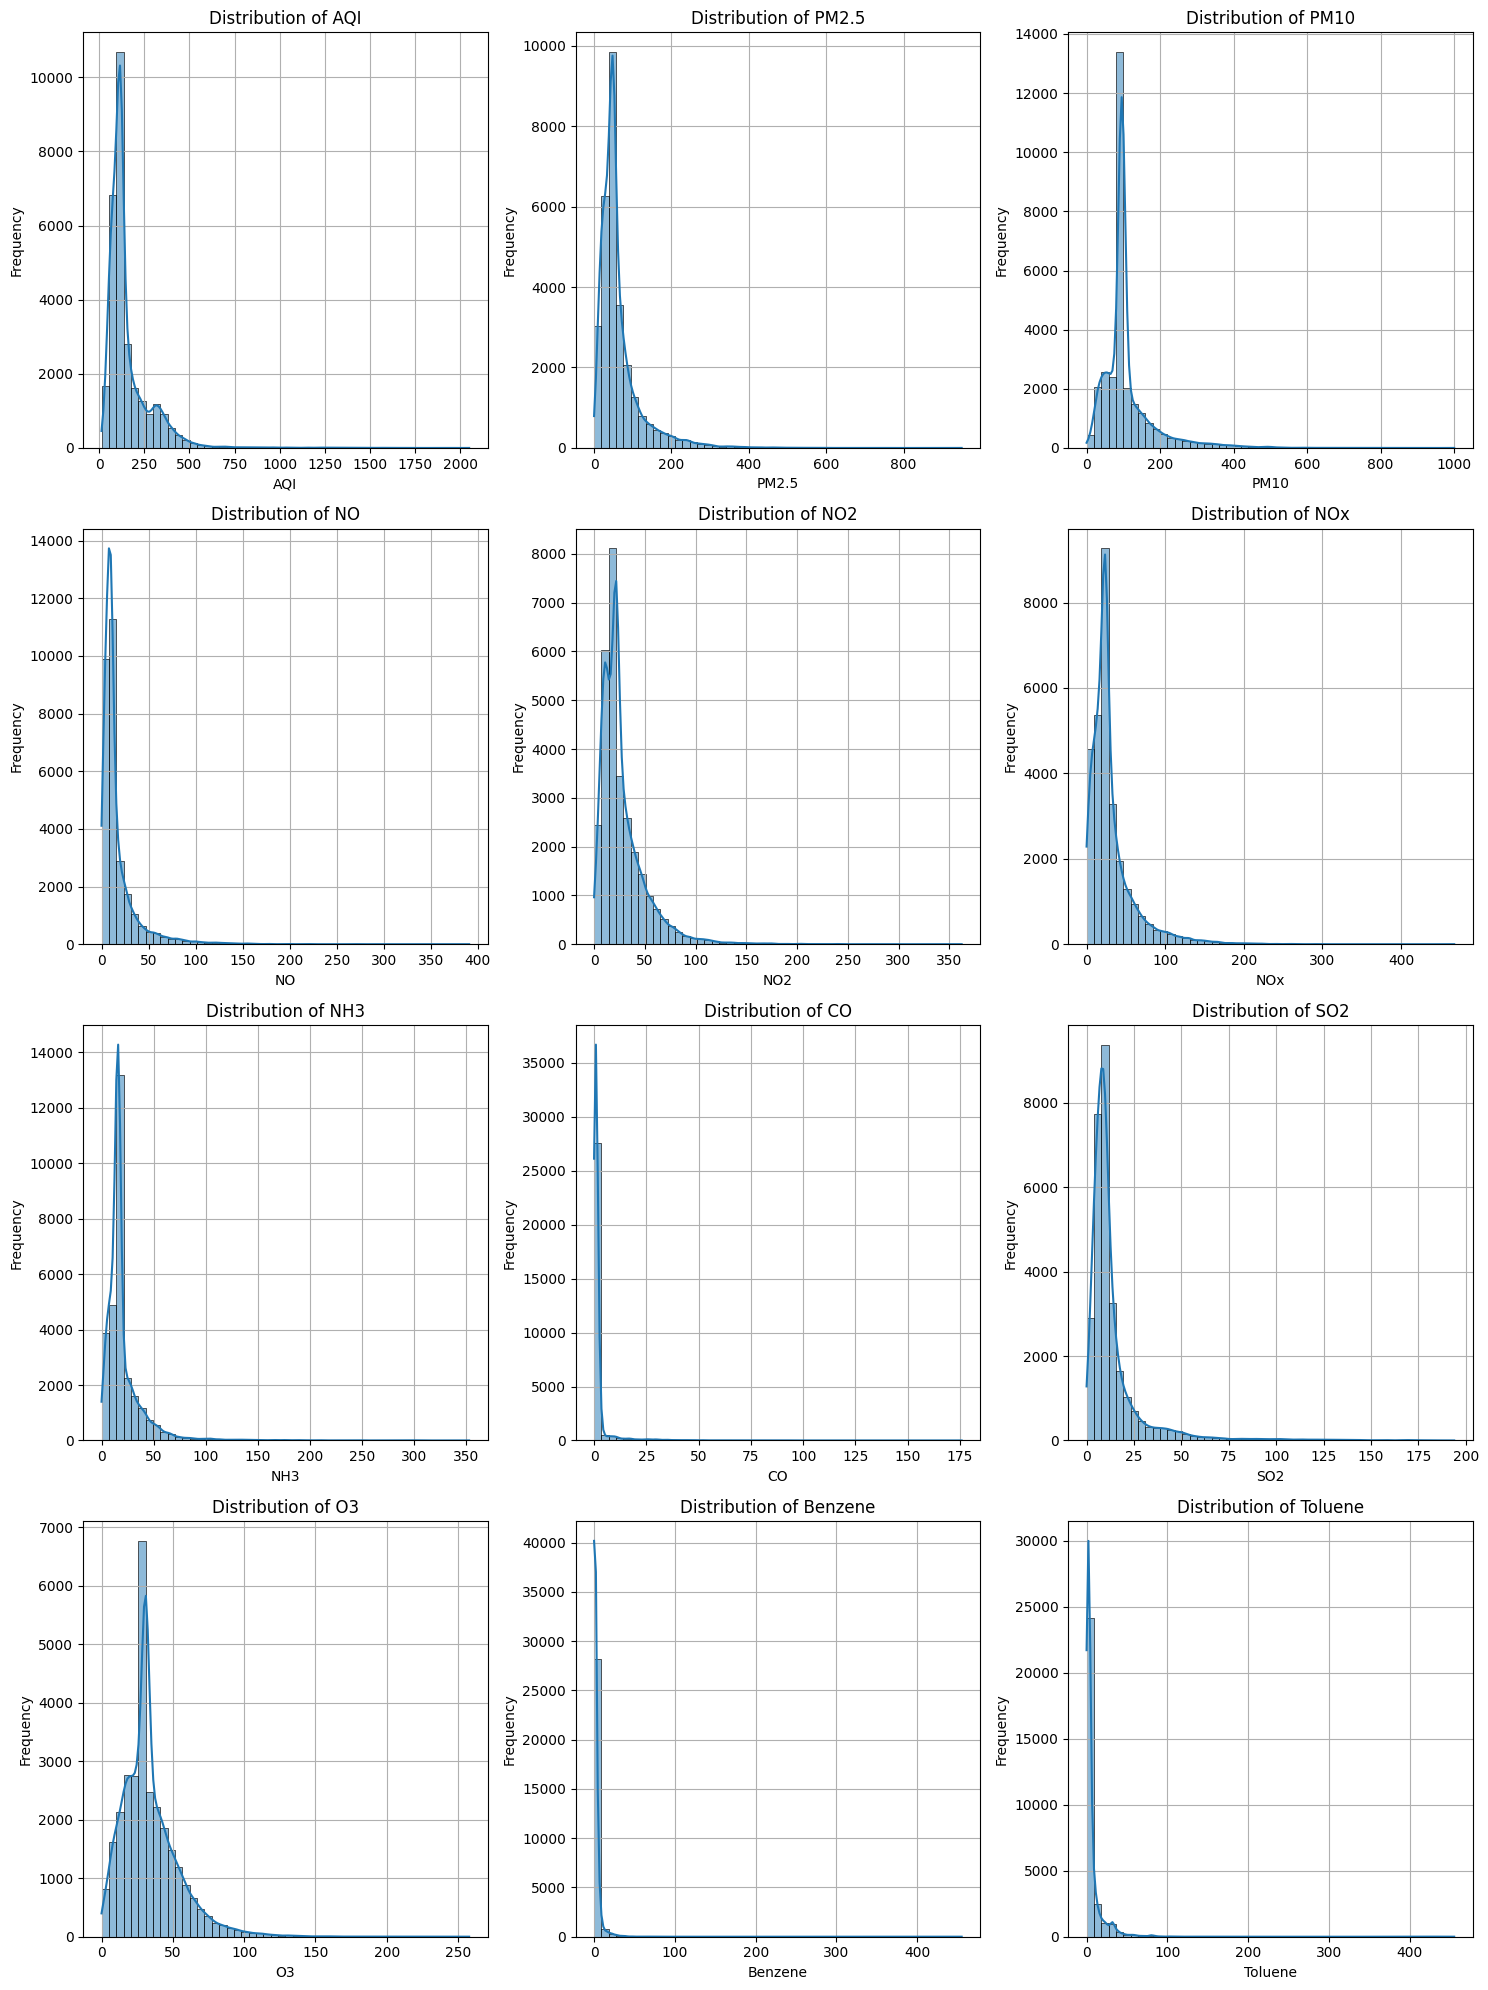

✅ Distribution plots for AQI and key pollutants generated.
⚠️ Required columns ('Date' or 'AQI') not found or are not in the correct format for AQI time series plot.

AQI distribution by City:
💡 More than 15 cities found. Plotting distribution for top 15 cities by average AQI.


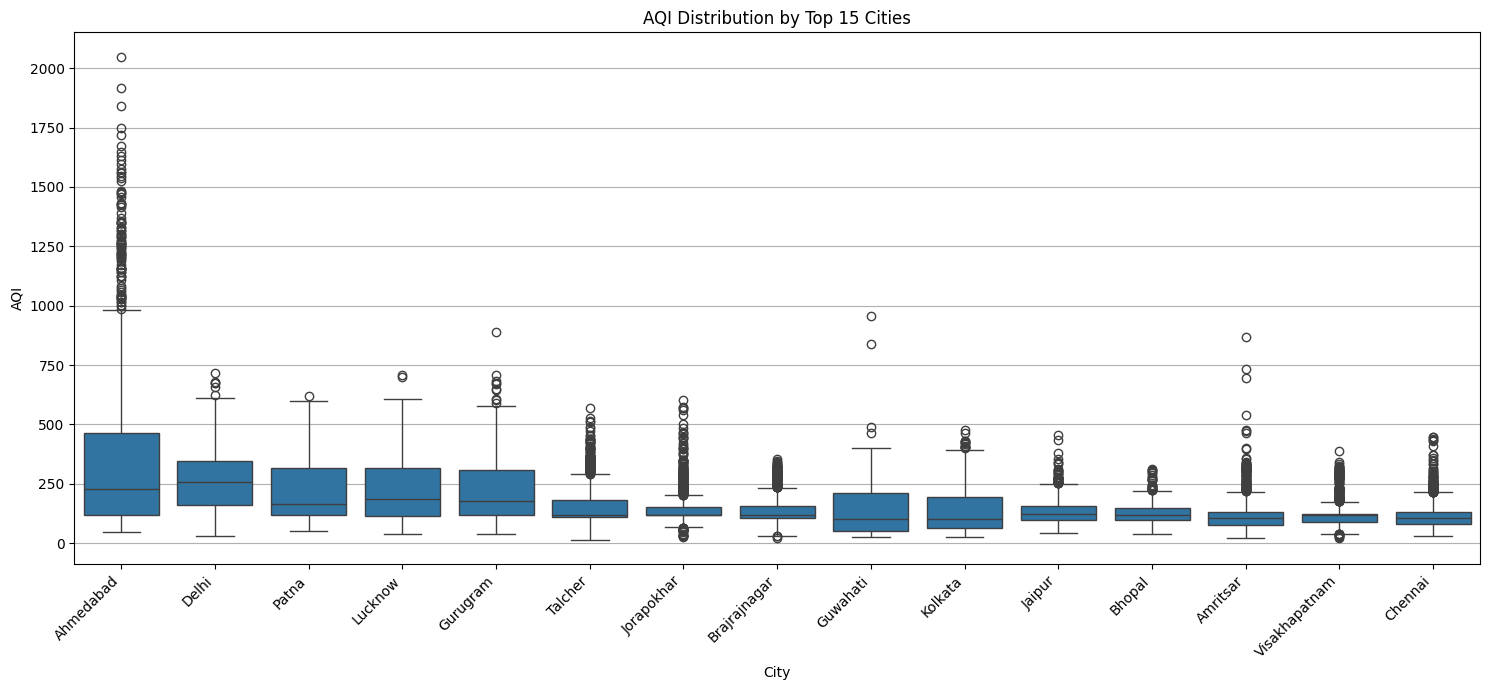

✅ AQI distribution by City plot generated.

--- Exploring df_temperatures ---

Annual Average Temperature Trend:


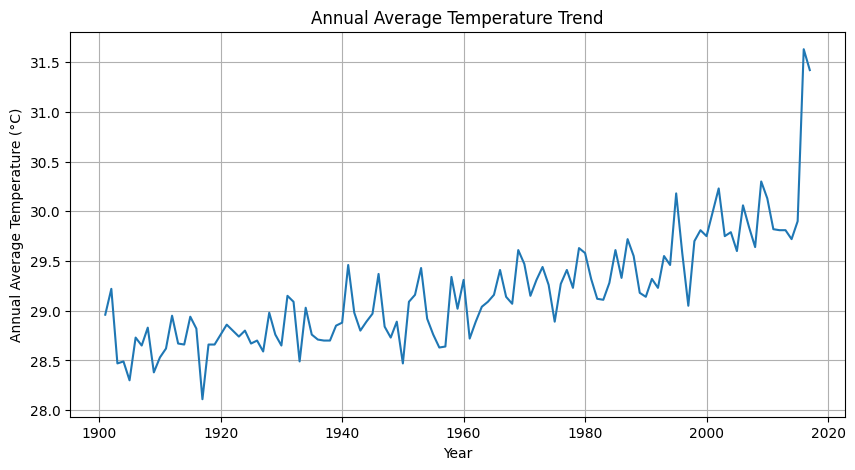

✅ Annual temperature trend plot generated.

Monthly Temperature Distribution (Box Plots):


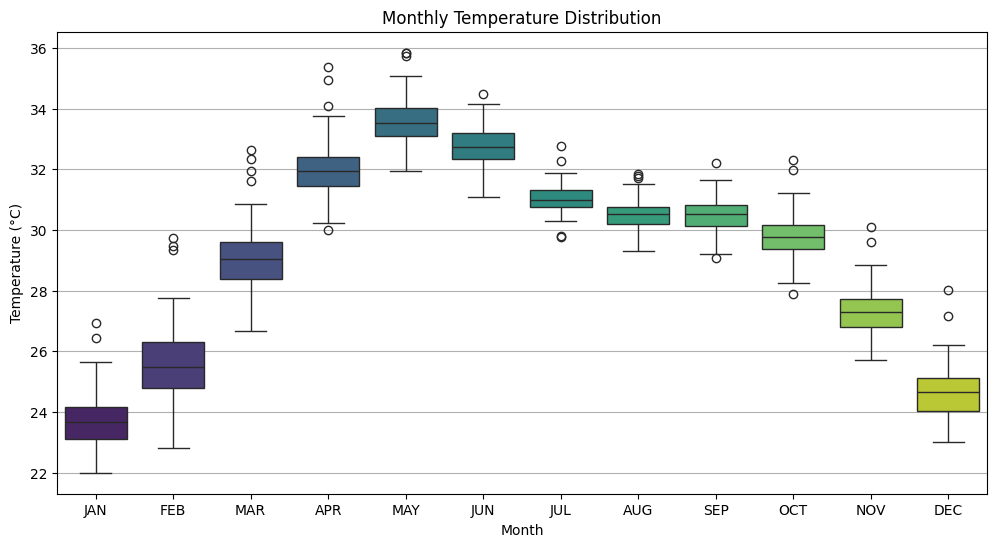

✅ Monthly temperature box plots generated.

Skipping exploration of df_weather: DataFrame not available or is empty.

--- Further Data Exploration and Visualization Complete ---


In [98]:
# Step 6: Further Data Exploration and Visualization

print("--- Further Data Exploration and Visualization ---")

# Assuming 'df' contains the air quality data from city_day.csv after preprocessing
# Use 'df' as df_air for this section
df_air = df # Assign df to df_air for consistency with the original code structure

# --- Explore df_air (using the 'df' data) ---
if df_air is not None and not df_air.empty:
    print("\n--- Exploring df_air ---")

    # Distribution of AQI and key pollutants
    pollutants_and_aqi = ['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
    # Filter for columns that exist in df_air and are numeric
    available_air_cols = [col for col in pollutants_and_aqi if col in df_air.columns and pd.api.types.is_numeric_dtype(df_air[col])]

    if available_air_cols:
        print("\nDistributions of AQI and key pollutants:")
        n_plots = len(available_air_cols)
        n_cols = 3 # Arrange in 3 columns
        n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
        axes = axes.flatten() # Flatten the axes array for easy iteration

        for i, col in enumerate(available_air_cols):
            sns.histplot(df_air[col].dropna(), kde=True, bins=50, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
        print("✅ Distribution plots for AQI and key pollutants generated.")
    else:
        print("⚠️ No key numeric air quality columns found for distribution plots.")


    # Time series of average AQI over time (if 'Date' and 'AQI' are available)
    if 'Date' in df_air.columns and pd.api.types.is_datetime64_any_dtype(df_air['Date']) and 'AQI' in df_air.columns and pd.api.types.is_numeric_dtype(df_air['AQI']):
        print("\nAverage AQI trend over time:")
        # Calculate daily average AQI
        df_air_daily_avg_aqi = df_air.groupby('Date')['AQI'].mean().reset_index()
        plt.figure(figsize=(15, 6))
        sns.lineplot(data=df_air_daily_avg_aqi, x='Date', y='AQI')
        plt.title('Average AQI over Time')
        plt.xlabel('Date')
        plt.ylabel('Average AQI')
        plt.grid(True)
        plt.show()
        print("✅ Average AQI trend plot generated.")
    else:
        print("⚠️ Required columns ('Date' or 'AQI') not found or are not in the correct format for AQI time series plot.")

    # AQI distribution by City (Box Plot)
    if 'City' in df_air.columns and 'AQI' in df_air.columns and pd.api.types.is_numeric_dtype(df_air['AQI']):
        print("\nAQI distribution by City:")
        # To avoid plotting too many cities, select top N or sample
        if df_air['City'].nunique() > 15:
             print("💡 More than 15 cities found. Plotting distribution for top 15 cities by average AQI.")
             # Calculate average AQI per city first to get top cities
             city_avg_aqi = df_air.groupby('City')['AQI'].mean()
             top_cities = city_avg_aqi.nlargest(15).index.tolist()
             df_air_top_cities = df_air[df_air['City'].isin(top_cities)]
             plt.figure(figsize=(15, 7))
             sns.boxplot(data=df_air_top_cities, x='City', y='AQI', order=top_cities) # Use order to maintain top city order
             plt.title('AQI Distribution by Top 15 Cities')
        else:
             plt.figure(figsize=(15, 7))
             sns.boxplot(data=df_air, x='City', y='AQI')
             plt.title('AQI Distribution by City')

        plt.xticks(rotation=45, ha='right')
        plt.xlabel('City')
        plt.ylabel('AQI')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
        print("✅ AQI distribution by City plot generated.")
    else:
        print("⚠️ Required columns ('City' or 'AQI') not found or are not in the correct format for AQI by City plot.")


# --- Explore df_temperatures ---
# Check if df_temperatures is defined and not empty before plotting
if 'df_temperatures' in locals() and df_temperatures is not None and not df_temperatures.empty:
    print("\n--- Exploring df_temperatures ---")

    # Annual Temperature Trend (already done in Step 7, but can repeat or ensure it ran)
    if 'YEAR' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['YEAR']) and 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        print("\nAnnual Average Temperature Trend:")
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=df_temperatures, x='YEAR', y='ANNUAL')
        plt.title('Annual Average Temperature Trend')
        plt.xlabel('Year')
        plt.ylabel('Annual Average Temperature (°C)')
        plt.grid(True)
        plt.show()
        print("✅ Annual temperature trend plot generated.")
    else:
        print("⚠️ Required columns ('YEAR' or 'ANNUAL') not found or are not numeric for annual temperature trend plot.")


    # Monthly Temperature Distribution (Box Plots)
    monthly_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    # Filter for columns that exist in df_temperatures and are numeric
    available_monthly_cols = [col for col in monthly_cols if col in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures[col])]

    if available_monthly_cols:
        print("\nMonthly Temperature Distribution (Box Plots):")
        # Reshape data for boxplot
        df_monthly_reshaped = df_temperatures[available_monthly_cols].melt(var_name='Month', value_name='Temperature')
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df_monthly_reshaped, x='Month', y='Temperature', order=available_monthly_cols, palette='viridis')
        plt.title('Monthly Temperature Distribution')
        plt.xlabel('Month')
        plt.ylabel('Temperature (°C)')
        plt.grid(axis='y')
        plt.show()
        print("✅ Monthly temperature box plots generated.")
    else:
         print("⚠️ No monthly temperature columns found or they are not numeric for box plots.")

else:
    print("\nSkipping exploration of df_temperatures: DataFrame not available or is empty.")


# --- Explore df_weather ---
# Check if df_weather is defined and not empty before plotting
if 'df_weather' in locals() and df_weather is not None and not df_weather.empty:
    print("\n--- Exploring df_weather ---")

    # Ensure 'datetime' column exists and is datetime type for time-based analysis
    if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
         df_weather_date_processed = True
         df_weather_sorted = df_weather.sort_values(by='datetime').reset_index(drop=True) # Sort by datetime
         print("✅ 'datetime' column in df_weather processed for time-based plots.")
    else:
         print("⚠️ 'datetime' column not found or is not datetime type in df_weather. Skipping some weather plots.")
         df_weather_date_processed = False
         df_weather_sorted = df_weather.copy() # Use original if datetime processing fails


    # Distribution of key weather variables
    weather_vars_to_plot = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km', 'uv_index']
    # Filter for columns that exist in df_weather_sorted and are numeric
    available_weather_vars = [col for col in weather_vars_to_plot if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

    if available_weather_vars:
        print("\nDistributions of key weather variables:")
        n_plots = len(available_weather_vars)
        n_cols = 2 # Arrange in 2 columns
        n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))
        axes = axes.flatten() # Flatten the axes array for easy iteration

        for i, col in enumerate(available_weather_vars):
            sns.histplot(df_weather_sorted[col].dropna(), kde=True, bins=50, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
        print(f"✅ Distributions of {len(available_weather_vars)} weather variables generated.")
    else:
        print("⚠️ No key numeric weather variable columns found for distribution plots.")


    # Time series of key weather variables
    if df_weather_date_processed and available_weather_vars:
        print("\nTime series of key weather variables:")
        # It might be too many points for a smooth plot, consider downsampling or selecting fewer variables
        time_series_vars_subset = ['temperature_celsius', 'humidity', 'wind_kph'] # Select a subset for clarity
        # Filter for columns that exist in df_weather_sorted and are numeric
        available_ts_vars = [col for col in time_series_vars_subset if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

        if available_ts_vars:
            fig, axes = plt.subplots(nrows=len(available_ts_vars), ncols=1, figsize=(15, 4 * len(available_ts_vars)))
            if len(available_ts_vars) == 1:
                axes = [axes] # Ensure axes is iterable if only one subplot

            plot_df_weather = df_weather_sorted.set_index('datetime')
            # Downsample if the data is too large for plotting
            if len(plot_df_weather) > 10000: # Example threshold, adjust as needed
                 print("💡 Downsampling weather data for plotting time series...")
                 plot_df_weather = plot_df_weather.resample('H').mean() # Resample to hourly average
                 print(f"Downsampled to {len(plot_df_weather)} data points.")

            for i, col in enumerate(available_ts_vars):
                 if col in plot_df_weather.columns and not plot_df_weather[col].dropna().empty:
                    sns.lineplot(data=plot_df_weather, x=plot_df_weather.index, y=col, ax=axes[i])
                    axes[i].set_title(f'{col} over Time')
                    axes[i].set_xlabel('Time')
                    axes[i].set_ylabel(col)
                    axes[i].grid(True)
                 else:
                      print(f"⚠️ Column '{col}' has no data after resampling/filtering. Skipping plot.")


            plt.tight_layout()
            plt.show()
            print(f"✅ Time series plots for {len(available_ts_vars)} weather variables generated.")
        else:
            print("⚠️ No key weather time series variables found or they are not numeric for plotting.")
    elif df_weather_date_processed: # available_weather_vars was empty
         print("⚠️ No key numeric weather variable columns found for time series plotting.")
    else: # df_weather_date_processed was False
         print("⚠️ Skipping time series plots for df_weather due to datetime processing issues.")

else:
    print("\nSkipping exploration of df_weather: DataFrame not available or is empty.")


print("\n--- Further Data Exploration and Visualization Complete ---")

In [99]:
# Step 7: Cross-dataset comparison plots

print("--- Cross-dataset Comparison Plots ---")

# --- Compare df_air (Daily AQI) and df_weather (Aggregated Daily Weather) ---
if df_air is not None and df_weather is not None and 'Date' in df_air.columns and 'datetime' in df_weather.columns and 'AQI' in df_air.columns:
    print("\nComparing Daily AQI (df_air) with Aggregated Daily Weather (df_weather)...")

    # Aggregate df_weather to daily averages
    try:
        # Ensure datetime column is set as index for resampling
        if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
             df_weather_processed = df_weather.set_index('datetime').sort_index() # Set index and sort
             df_weather_daily = df_weather_processed.resample('D').mean(numeric_only=True).reset_index() # Resample and reset index
             # Ensure the date column is explicitly named 'Date'
             df_weather_daily.rename(columns={'datetime': 'Date', 'index': 'Date'}, inplace=True) # Try renaming both potential names
             print("✅ Aggregated df_weather to daily averages.")
             print("Aggregated df_weather head:")
             display(df_weather_daily.head())
             print("Aggregated df_weather info:")
             df_weather_daily.info()

             # Check if aggregated dataframe has the 'Date' column before merging
             if 'Date' in df_weather_daily.columns and not df_weather_daily.empty:

                 # Merge daily aggregated weather with df_air on Date
                 # Ensure required columns exist in df_air before creating subset
                 required_air_cols = ['Date', 'AQI', 'City']
                 if all(col in df_air.columns for col in required_air_cols):
                      # Ensure 'Date' column in df_air is datetime for merging
                      if not pd.api.types.is_datetime64_any_dtype(df_air['Date']):
                           df_air['Date'] = pd.to_datetime(df_air['Date'], errors='coerce')
                           df_air.dropna(subset=['Date'], inplace=True)
                           print("✅ 'Date' column in df_air converted to datetime for merging.")

                      if 'Date' in df_air.columns and not df_air.empty:
                           # Perform the merge
                           df_combined_daily = pd.merge(df_air[required_air_cols].copy(), df_weather_daily, on='Date', how='inner') # Use required_air_cols list
                           print("\n✅ Merged df_air and aggregated df_weather on Date.")
                           print("Combined daily dataframe head:")
                           display(df_combined_daily.head())
                           print("Combined daily dataframe info:")
                           df_combined_daily.info()

                           # Plot Daily Average AQI vs. Daily Average Temperature (if columns exist)
                           if 'AQI' in df_combined_daily.columns and 'temperature_celsius' in df_combined_daily.columns:
                                print("\nPlotting Daily Average AQI vs. Daily Average Temperature...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'temperature_celsius']), x='temperature_celsius', y='AQI', alpha=0.5, s=10) # Added dropna and adjusted size/alpha
                                plt.title('Daily Average AQI vs. Daily Average Temperature')
                                plt.xlabel('Average Temperature (°C)')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Temperature generated.")
                           else:
                                print("⚠️ Required columns ('AQI' or 'temperature_celsius') not found in combined daily dataframe for scatter plot.")


                           # Plot Daily Average AQI vs. Daily Average Humidity (if columns exist)
                           if 'AQI' in df_combined_daily.columns and 'humidity' in df_combined_daily.columns:
                                print("\nPlotting Daily Average AQI vs. Daily Average Humidity...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'humidity']), x='humidity', y='AQI', alpha=0.5, s=10) # Added dropna and adjusted size/alpha
                                plt.title('Daily Average AQI vs. Daily Average Humidity')
                                plt.xlabel('Average Humidity (%)')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Humidity generated.")
                           else:
                                print("⚠️ Required columns ('AQI' or 'humidity') not found in combined daily dataframe for scatter plot.")

                           # Plot Daily Average AQI vs. Daily Average Wind Speed (if columns exist)
                           if 'AQI' in df_combined_daily.columns and 'wind_kph' in df_combined_daily.columns: # Assuming wind_kph is the relevant wind speed column
                                print("\nPlotting Daily Average AQI vs. Daily Average Wind Speed...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'wind_kph']), x='wind_kph', y='AQI', alpha=0.5, s=10) # Added dropna and adjusted size/alpha
                                plt.title('Daily Average AQI vs. Daily Average Wind Speed')
                                plt.xlabel('Average Wind Speed (kph)') # Adjust unit based on column name
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Wind Speed generated.")
                           elif 'AQI' in df_combined_daily.columns and 'wind_mph' in df_combined_daily.columns:
                                print("\nPlotting Daily Average AQI vs. Daily Average Wind Speed...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'wind_mph']), x='wind_mph', y='AQI', alpha=0.5, s=10) # Added dropna and adjusted size/alpha
                                plt.title('Daily Average AQI vs. Daily Average Wind Speed')
                                plt.xlabel('Average Wind Speed (mph)') # Adjust unit based on column name
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Wind Speed generated.")
                           else:
                                print("⚠️ Required columns ('AQI' and 'wind_kph' or 'wind_mph') not found in combined daily dataframe for scatter plot.")

                           # --- Added more comparison plots ---

                           # Plot Daily Average AQI vs. Daily Average Pressure (if columns exist)
                           if 'AQI' in df_combined_daily.columns and 'pressure_mb' in df_combined_daily.columns:
                                print("\nPlotting Daily Average AQI vs. Daily Average Pressure...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'pressure_mb']), x='pressure_mb', y='AQI', alpha=0.5, s=10)
                                plt.title('Daily Average AQI vs. Daily Average Pressure')
                                plt.xlabel('Average Pressure (mb)')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Pressure generated.")
                           else:
                                print("⚠️ Required columns ('AQI' or 'pressure_mb') not found in combined daily dataframe for scatter plot.")

                           # Plot Daily Average AQI vs. Daily Average Visibility (if columns exist)
                           if 'AQI' in df_combined_daily.columns and 'visibility_km' in df_combined_daily.columns:
                                print("\nPlotting Daily Average AQI vs. Daily Average Visibility...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'visibility_km']), x='visibility_km', y='AQI', alpha=0.5, s=10)
                                plt.title('Daily Average AQI vs. Daily Average Visibility')
                                plt.xlabel('Average Visibility (km)')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Visibility generated.")
                           elif 'AQI' in df_combined_daily.columns and 'visibility_miles' in df_combined_daily.columns:
                                print("\nPlotting Daily Average AQI vs. Daily Average Visibility...")
                                plt.figure(figsize=(10, 6))
                                sns.scatterplot(data=df_combined_daily.dropna(subset=['AQI', 'visibility_miles']), x='visibility_miles', y='AQI', alpha=0.5, s=10)
                                plt.title('Daily Average AQI vs. Daily Average Visibility')
                                plt.xlabel('Average Visibility (miles)')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.show()
                                print("✅ Scatter plot of Daily Average AQI vs. Daily Average Visibility generated.")
                           else:
                                print("⚠️ Required columns ('AQI' and 'visibility_km' or 'visibility_miles') not found in combined daily dataframe for scatter plot.")

                           # Time series of Daily Average AQI and Daily Average Temperature (if columns exist)
                           if 'Date' in df_combined_daily.columns and 'AQI' in df_combined_daily.columns and 'temperature_celsius' in df_combined_daily.columns:
                                print("\nPlotting Time Series of Daily Average AQI and Daily Average Temperature...")
                                plt.figure(figsize=(15, 6))
                                sns.lineplot(data=df_combined_daily, x='Date', y='AQI', label='Average AQI')
                                # Create a secondary y-axis for temperature
                                ax2 = plt.gca().twinx()
                                sns.lineplot(data=df_combined_daily, x='Date', y='temperature_celsius', label='Average Temperature (°C)', color='red', ax=ax2)
                                ax2.set_ylabel('Average Temperature (°C)', color='red')
                                ax2.tick_params(axis='y', labelcolor='red')
                                plt.title('Daily Average AQI and Temperature over Time')
                                plt.xlabel('Date')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.legend(loc='upper left')
                                ax2.legend(loc='upper right')
                                plt.show()
                                print("✅ Time series plot of Daily Average AQI and Temperature generated.")
                           else:
                                print("⚠️ Required columns ('Date', 'AQI', or 'temperature_celsius') not found in combined daily dataframe for time series plot.")

                           # Time series of Daily Average AQI and Daily Average Humidity (if columns exist)
                           if 'Date' in df_combined_daily.columns and 'AQI' in df_combined_daily.columns and 'humidity' in df_combined_daily.columns:
                                print("\nPlotting Time Series of Daily Average AQI and Daily Average Humidity...")
                                plt.figure(figsize=(15, 6))
                                sns.lineplot(data=df_combined_daily, x='Date', y='AQI', label='Average AQI')
                                # Create a secondary y-axis for humidity
                                ax2 = plt.gca().twinx()
                                sns.lineplot(data=df_combined_daily, x='Date', y='humidity', label='Average Humidity (%)', color='green', ax=ax2)
                                ax2.set_ylabel('Average Humidity (%)', color='green')
                                ax2.tick_params(axis='y', labelcolor='green')
                                plt.title('Daily Average AQI and Humidity over Time')
                                plt.xlabel('Date')
                                plt.ylabel('Average AQI')
                                plt.grid(True)
                                plt.legend(loc='upper left')
                                ax2.legend(loc='upper right')
                                plt.show()
                                print("✅ Time series plot of Daily Average AQI and Humidity generated.")
                           else:
                                print("⚠️ Required columns ('Date', 'AQI', or 'humidity') not found in combined daily dataframe for time series plot.")


                      else:
                           print("❌ 'Date' column not available or dataframe is empty after date processing in df_air. Cannot merge.")

                 else:
                      print(f"❌ Required columns for merging ({required_air_cols}) not found in df_air. Cannot merge.")

             else:
                 print("❌ 'Date' column not available in aggregated df_weather daily dataframe. Cannot merge.")


        else:
            print("❌ 'datetime' column not available or is not datetime type in df_weather. Cannot aggregate.")


    except Exception as e:
        print(f"❌ Error aggregating or merging data for df_air and df_weather comparison: {e}")
        import traceback
        traceback.print_exc()

else:
    print("\nSkipping comparison of df_air and df_weather: Required dataframes or columns not available.")


# --- Compare df_air (Annual Average AQI) and df_temperatures (Annual Temperature) ---
if df_air is not None and df_temperatures is not None and 'Date' in df_air.columns and 'YEAR' in df_temperatures.columns and 'AQI' in df_air.columns and 'ANNUAL' in df_temperatures.columns:
    print("\nComparing Annual Average AQI (df_air) and Annual Temperature (df_temperatures)...")

    # Extract Year from df_air Date and calculate annual average AQI
    try:
        # Ensure 'Date' column in df_air is datetime before extracting year
        if not pd.api.types.is_datetime64_any_dtype(df_air['Date']):
             df_air['Date'] = pd.to_datetime(df_air['Date'], errors='coerce')
             df_air.dropna(subset=['Date'], inplace=True)
             print("✅ 'Date' column in df_air converted to datetime for annual comparison.")

        if 'Date' in df_air.columns and 'AQI' in df_air.columns and not df_air.empty:
             df_air['Year'] = df_air['Date'].dt.year
             df_air_annual_avg_aqi = df_air.groupby('Year')['AQI'].mean().reset_index()
             print("✅ Calculated annual average AQI from df_air.")
             print("Annual average AQI head:")
             display(df_air_annual_avg_aqi.head())

             # Merge annual average AQI with df_temperatures on Year
             # Ensure 'YEAR' column in df_temperatures is int for merging
             if 'YEAR' in df_temperatures.columns and not df_temperatures.empty:
                 df_temperatures['YEAR'] = df_temperatures['YEAR'].astype(int)
                 df_annual_comparison = pd.merge(df_air_annual_avg_aqi, df_temperatures[['YEAR', 'ANNUAL']].copy(), left_on='Year', right_on='YEAR', how='inner')
                 df_annual_comparison.drop('YEAR', axis=1, inplace=True) # Drop redundant Year column
                 print("\n✅ Merged annual average AQI and annual temperature.")
                 print("Annual comparison dataframe head:")
                 display(df_annual_comparison.head())
                 print("Annual comparison dataframe info:")
                 df_annual_comparison.info()


                 # Plot Annual Average AQI vs. Annual Temperature
                 if 'AQI' in df_annual_comparison.columns and 'ANNUAL' in df_annual_comparison.columns:
                      print("\nPlotting Annual Average AQI vs. Annual Average Temperature...")
                      plt.figure(figsize=(10, 6))
                      sns.scatterplot(data=df_annual_comparison.dropna(), x='ANNUAL', y='AQI')
                      plt.title('Annual Average AQI vs. Annual Average Temperature')
                      plt.xlabel('Annual Average Temperature (°C)') # Assuming Celsius
                      plt.ylabel('Annual Average AQI')
                      plt.grid(True)
                      plt.show()
                      print("✅ Scatter plot of Annual Average AQI vs. Annual Average Temperature generated.")
                 else:
                      print("⚠️ Required columns ('AQI' or 'ANNUAL') not found in annual comparison dataframe for scatter plot.")

                 # Plot Annual Average AQI and Annual Temperature Trends over Year
                 if 'Year' in df_annual_comparison.columns and 'AQI' in df_annual_comparison.columns and 'ANNUAL' in df_annual_comparison.columns:
                      print("\nPlotting Annual Average AQI and Annual Average Temperature Trends over Year...")
                      plt.figure(figsize=(15, 6))
                      sns.lineplot(data=df_annual_comparison, x='Year', y='AQI', label='Annual Average AQI')
                      # Create a secondary y-axis for annual temperature
                      ax2 = plt.gca().twinx()
                      sns.lineplot(data=df_annual_comparison, x='Year', y='ANNUAL', label='Annual Average Temperature (°C)', color='red', ax=ax2)
                      ax2.set_ylabel('Annual Average Temperature (°C)', color='red')
                      ax2.tick_params(axis='y', labelcolor='red')
                      plt.title('Annual Average AQI and Temperature Trends')
                      plt.xlabel('Year')
                      plt.ylabel('Annual Average AQI')
                      plt.grid(True)
                      plt.legend(loc='upper left')
                      ax2.legend(loc='upper right')
                      plt.show()
                      print("✅ Time series plot of Annual Average AQI and Temperature trends generated.")
                 else:
                      print("⚠️ Required columns ('Year', 'AQI', or 'ANNUAL') not found in annual comparison dataframe for time series plot.")


             else:
                 print("❌ 'YEAR' column not available or dataframe is empty in df_temperatures. Cannot merge.")

        else:
             print("❌ Required columns ('Date' or 'AQI') not available or dataframe is empty in df_air. Cannot calculate annual average AQI.")


    except Exception as e:
        print(f"❌ Error processing or merging data for annual comparison: {e}")
        import traceback
        traceback.print_exc()

else:
    print("\nSkipping annual comparison of df_air and df_temperatures: Required dataframes or columns not available.")


print("\n--- Cross-dataset Comparison Plots Complete ---")

--- Cross-dataset Comparison Plots ---

Skipping comparison of df_air and df_weather: Required dataframes or columns not available.

Skipping annual comparison of df_air and df_temperatures: Required dataframes or columns not available.

--- Cross-dataset Comparison Plots Complete ---


--- Dashboard Components for Temperature Data (df_temperatures) ---

Summary Metrics (Annual Temperature):
- Average Annual Temperature: 29.18°C
- Maximum Annual Temperature: 31.63°C
- Minimum Annual Temperature: 28.11°C

Annual Average Temperature Trend:


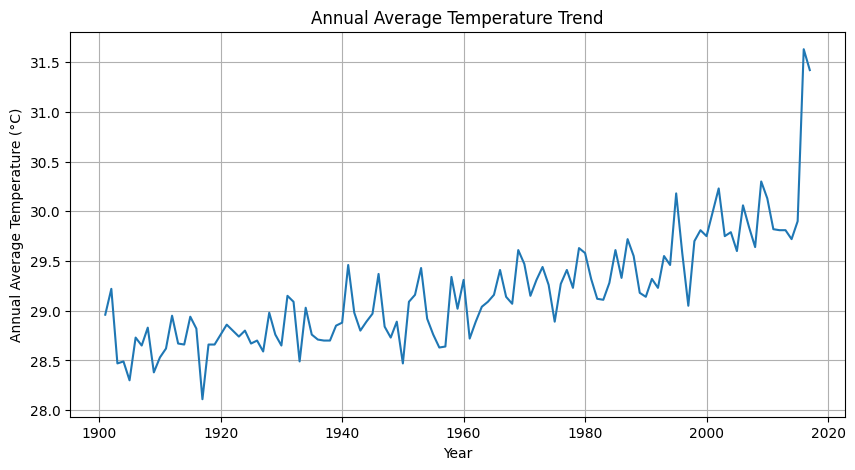

✅ Annual temperature trend plot generated.

Monthly Temperature Distribution (Box Plots):


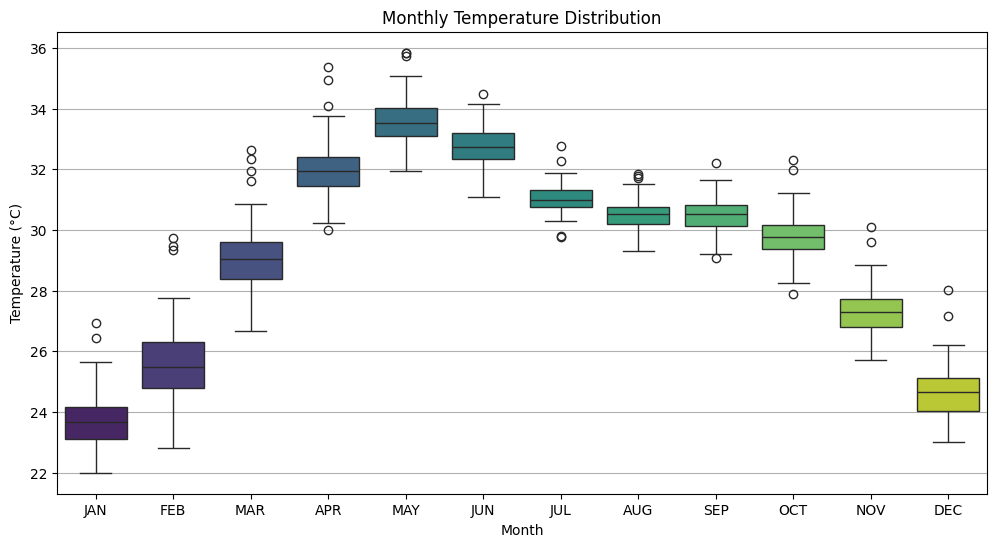

✅ Monthly temperature box plots generated.

Correlation Heatmap for Monthly Temperatures:


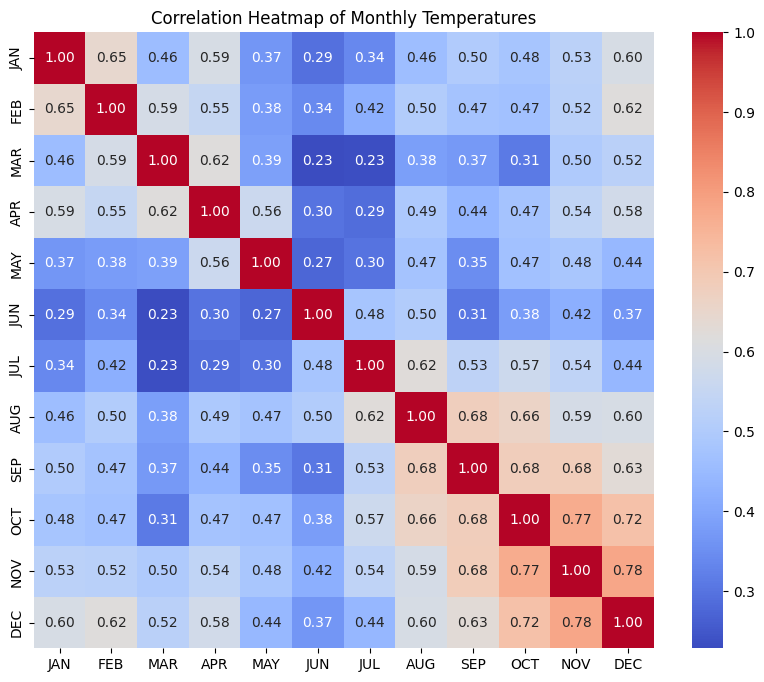

✅ Monthly temperature correlation heatmap generated.

Raw Temperature Data Table (Head):


YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57

✅ Raw temperature data table displayed.

Annual Summary Table (Year and Annual Temperature):


YEAR  ANNUAL
0  1901   28.96
1  1902   29.22
2  1903   28.47
3  1904   28.49
4  1905   28.30

✅ Annual summary table displayed.

--- Dashboard Components for Weather Data (df_weather) ---

df_weather is None. Skipping weather dashboard components.

--- Dashboard Components Generation Complete ---


In [100]:
# Step 8: Dashboard Components - Temperature Data (df_temperatures)

print("--- Dashboard Components for Temperature Data (df_temperatures) ---")

if df_temperatures is not None:
    # 1. Summary Metrics (KPIs)
    print("\nSummary Metrics (Annual Temperature):")
    if 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        annual_temp_mean = df_temperatures['ANNUAL'].mean()
        annual_temp_max = df_temperatures['ANNUAL'].max()
        annual_temp_min = df_temperatures['ANNUAL'].min()
        print(f"- Average Annual Temperature: {annual_temp_mean:.2f}°C")
        print(f"- Maximum Annual Temperature: {annual_temp_max:.2f}°C")
        print(f"- Minimum Annual Temperature: {annual_temp_min:.2f}°C")
    else:
        print("⚠️ 'ANNUAL' column not found or is not numeric for summary metrics.")

    # 2. Charts & Graphs
    # Annual Temperature Trend (already generated, but including here as a component)
    if 'YEAR' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['YEAR']) and 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        print("\nAnnual Average Temperature Trend:")
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=df_temperatures, x='YEAR', y='ANNUAL')
        plt.title('Annual Average Temperature Trend')
        plt.xlabel('Year')
        plt.ylabel('Annual Average Temperature (°C)')
        plt.grid(True)
        plt.show()
        print("✅ Annual temperature trend plot generated.")
    else:
        print("⚠️ Required columns ('YEAR' or 'ANNUAL') not found or are not numeric for annual trend plot.")


    # Monthly Temperature Box Plots
    monthly_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    available_monthly_cols = [col for col in monthly_cols if col in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures[col])]

    if available_monthly_cols:
        print("\nMonthly Temperature Distribution (Box Plots):")
        # Reshape data for boxplot
        df_monthly_reshaped = df_temperatures[available_monthly_cols].melt(var_name='Month', value_name='Temperature')
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df_monthly_reshaped, x='Month', y='Temperature', order=available_monthly_cols, palette='viridis')
        plt.title('Monthly Temperature Distribution')
        plt.xlabel('Month')
        plt.ylabel('Temperature (°C)')
        plt.grid(axis='y')
        plt.show()
        print("✅ Monthly temperature box plots generated.")
    else:
         print("⚠️ No monthly temperature columns found or they are not numeric for box plots.")


    # 3. Heatmaps
    # Correlation Heatmap for Monthly Temperatures
    if available_monthly_cols:
        print("\nCorrelation Heatmap for Monthly Temperatures:")
        plt.figure(figsize=(10, 8))
        sns.heatmap(df_temperatures[available_monthly_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap of Monthly Temperatures')
        plt.show()
        print("✅ Monthly temperature correlation heatmap generated.")
    else:
        print("⚠️ No monthly temperature columns found for correlation heatmap.")


    # 4. Tables
    # Display the raw temperature data table (first few rows)
    print("\nRaw Temperature Data Table (Head):")
    display(df_temperatures.head())
    print("✅ Raw temperature data table displayed.")

    # Display annual summary table
    if 'YEAR' in df_temperatures.columns and 'ANNUAL' in df_temperatures.columns:
        print("\nAnnual Summary Table (Year and Annual Temperature):")
        display(df_temperatures[['YEAR', 'ANNUAL']].head()) # Display first few rows
        print("✅ Annual summary table displayed.")


else:
    print("\ndf_temperatures is None. Skipping temperature dashboard components.")


print("\n--- Dashboard Components for Weather Data (df_weather) ---")

if df_weather is not None:
    # Ensure 'datetime' column exists and is datetime type for time-based analysis
    if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
         df_weather_date_processed = True
         df_weather_sorted = df_weather.sort_values(by='datetime').reset_index(drop=True) # Sort by datetime
         print("✅ 'datetime' column in df_weather processed for time-based components.")
    else:
         print("⚠️ 'datetime' column not found or is not datetime type in df_weather. Skipping some weather dashboard components.")
         df_weather_date_processed = False
         df_weather_sorted = df_weather.copy() # Use original if datetime processing fails


    # 1. Summary Metrics (KPIs)
    print("\nSummary Metrics (Weather Data):")
    weather_kpi_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km']
    available_weather_kpis = [col for col in weather_kpi_cols if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

    if available_weather_kpis:
        for col in available_weather_kpis:
            col_mean = df_weather_sorted[col].mean()
            col_max = df_weather_sorted[col].max()
            col_min = df_weather_sorted[col].min()
            print(f"- Average {col}: {col_mean:.2f}")
            print(f"- Maximum {col}: {col_max:.2f}")
            print(f"- Minimum {col}: {col_min:.2f}")
    else:
        print("⚠️ No key numeric weather columns found for summary metrics.")


    # 2. Charts & Graphs
    # Time series of key weather variables (already generated, but including here)
    if df_weather_date_processed:
        print("\nTime series of key weather variables:")
        time_series_vars = ['temperature_celsius', 'humidity', 'wind_kph']
        available_ts_vars = [col for col in time_series_vars if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

        if available_ts_vars:
            fig, axes = plt.subplots(nrows=len(available_ts_vars), ncols=1, figsize=(15, 4 * len(available_ts_vars)))
            if len(available_ts_vars) == 1:
                axes = [axes]

            # Downsample if the data is too large for plotting
            plot_df_weather = df_weather_sorted.set_index('datetime')
            if len(plot_df_weather) > 10000: # Example threshold
                 print("💡 Downsampling weather data for plotting time series...")
                 plot_df_weather = plot_df_weather.resample('H').mean() # Resample to hourly average


            for i, col in enumerate(available_ts_vars):
                 if col in plot_df_weather.columns and not plot_df_weather[col].dropna().empty:
                    sns.lineplot(data=plot_df_weather, x=plot_df_weather.index, y=col, ax=axes[i])
                    axes[i].set_title(f'{col} over Time')
                    axes[i].set_xlabel('Time')
                    axes[i].set_ylabel(col)
                    axes[i].grid(True)
                 else:
                      print(f"⚠️ Column '{col}' has no data after resampling/filtering. Skipping plot.")


            plt.tight_layout()
            plt.show()
            print(f"✅ Time series plots for {len(available_ts_vars)} weather variables generated.")
        else:
            print("⚠️ No key weather time series variables found or they are not numeric for plotting.")
    else:
        print("⚠️ Skipping time series plots for df_weather due to datetime processing issues.")


    # Distribution plots for key weather variables (already generated, but including here)
    if available_weather_vars: # Use the list generated earlier
        print("\nDistributions of key weather variables:")
        n_plots = len(available_weather_vars)
        n_cols = 2 # Arrange in 2 columns
        n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))
        axes = axes.flatten() # Flatten the axes array for easy iteration

        for i, col in enumerate(available_weather_vars):
            sns.histplot(df_weather_sorted[col].dropna(), kde=True, bins=50, ax=axes[i]) # Use sorted df
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
        print(f"✅ Distributions of {len(available_weather_vars)} weather variables generated.")
    else:
        print("⚠️ No key numeric weather variable columns found for distribution plots.")


    # 3. Heatmaps
    # Correlation Heatmap for key numeric weather variables
    if available_weather_kpis: # Use the list of numeric columns suitable for KPIs/heatmap
        print("\nCorrelation Heatmap for Key Weather Variables:")
        plt.figure(figsize=(10, 8))
        sns.heatmap(df_weather_sorted[available_weather_kpis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap of Key Weather Variables')
        plt.show()
        print("✅ Weather variables correlation heatmap generated.")
    else:
        print("⚠️ No key numeric weather columns found for correlation heatmap.")

    # 4. Tables
    # Display the raw weather data table (first few rows)
    print("\nRaw Weather Data Table (Head):")
    display(df_weather_sorted.head()) # Use sorted df
    print("✅ Raw weather data table displayed.")

    # Display summary statistics table
    print("\nWeather Data Summary Statistics Table:")
    display(df_weather_sorted[available_weather_kpis].describe()) # Use only numeric columns
    print("✅ Weather data summary statistics table displayed.")


else:
    print("\ndf_weather is None. Skipping weather dashboard components.")

print("\n--- Dashboard Components Generation Complete ---")

Okay, here is the updated Streamlit example script (`dashboard_app.py`) with a separate section for the `df_air` (Air Quality) data components.

This script now includes distinct sections for Temperature, Weather, and Air Quality data analysis and visualization. Remember to save this code as a Python file (e.g., `dashboard_app.py`) and run it using `streamlit run dashboard_app.py` in your environment with the data files available.

2025-06-04 12:04:42.989 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 12:04:43.098 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-04 12:04:43.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 12:04:43.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 12:04:43.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 12:04:43.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 12:04:43.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 12:04:43.105 Thread 'MainThread': mi

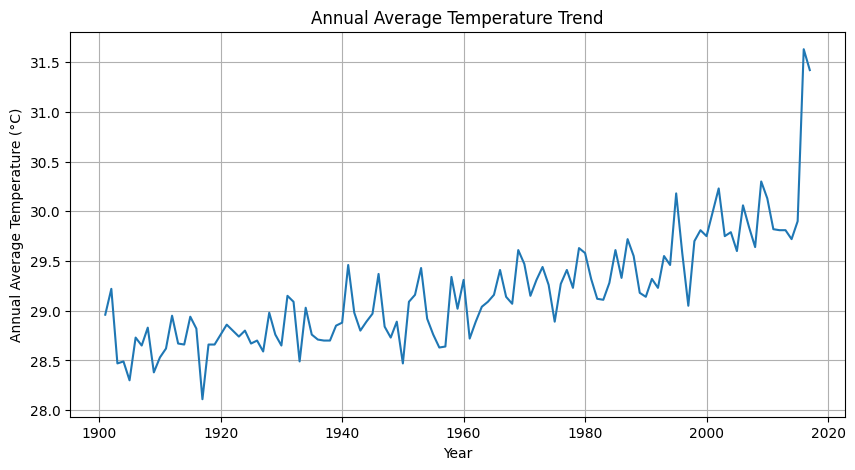

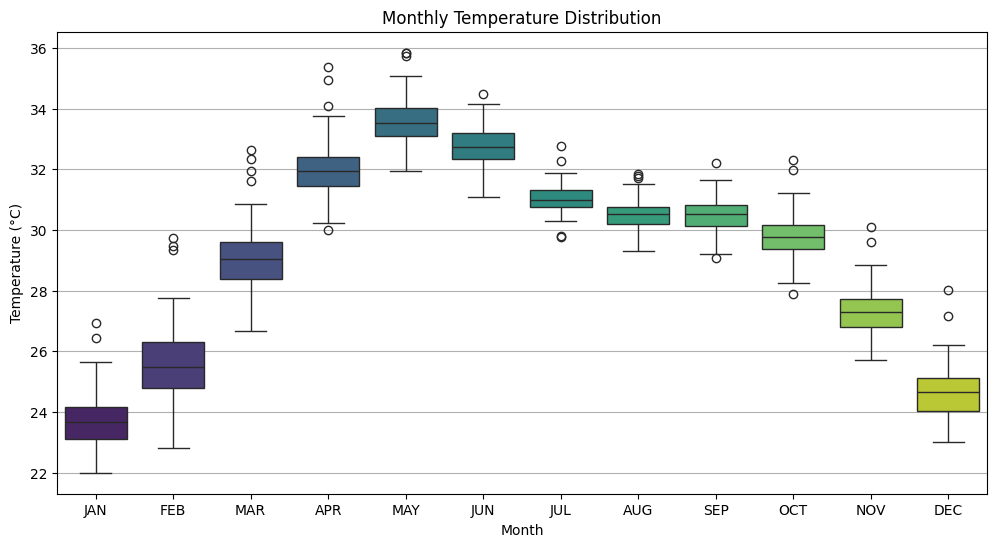

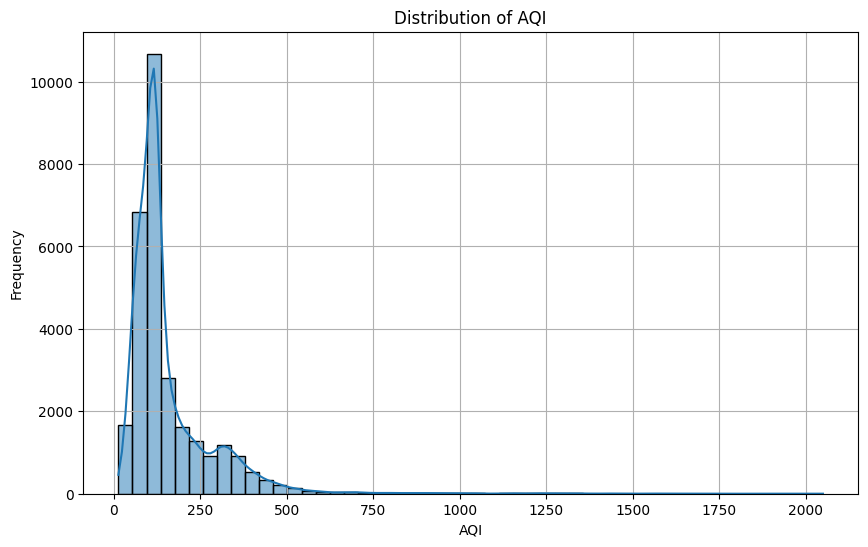

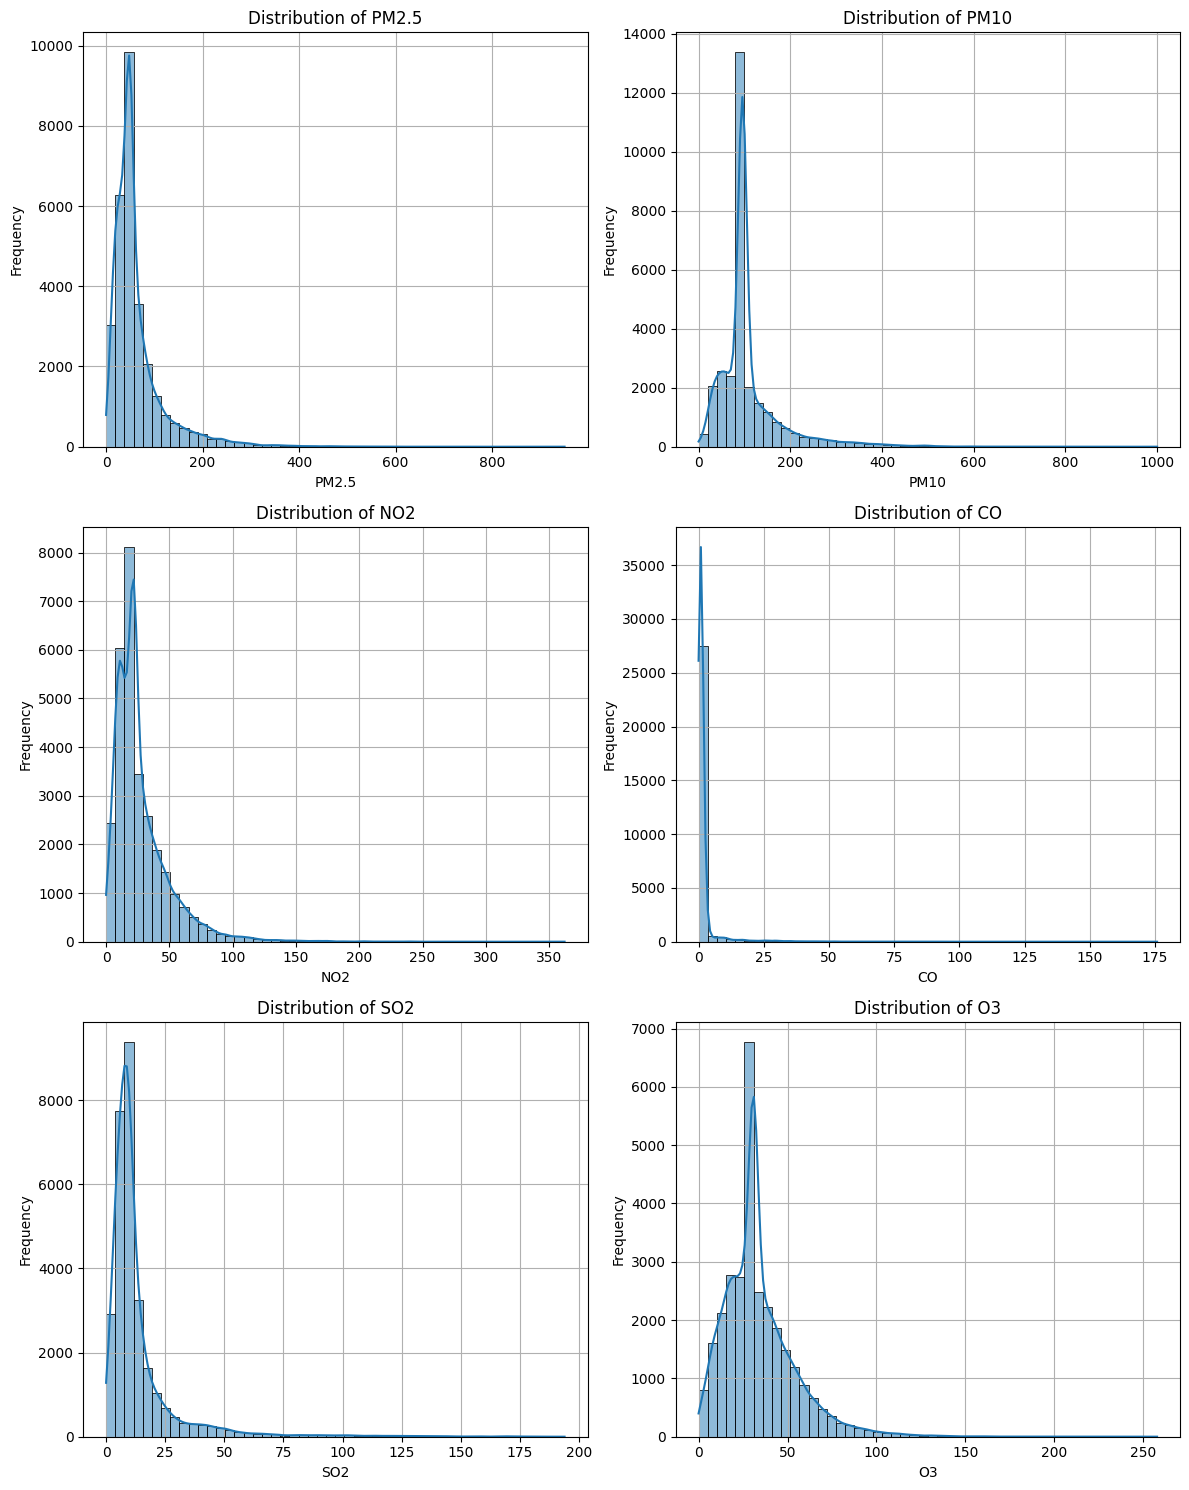

In [101]:
# %%writefile dashboard_app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (adjust paths as necessary when running in a real environment)
# In a real Streamlit app, you might load data from a persistent source
try:
    df_temperatures = pd.read_csv("temperatures.csv")
    df_weather = pd.read_excel("Weather data.xlsx")
    df_air = pd.read_csv("air.csv") # Load df_air as well
except FileNotFoundError as e:
    st.error(f"Error loading data: {e}. Make sure data files are in the correct directory.")
    st.stop() # Stop execution if data loading fails

st.title("Environmental Data Dashboard")

# --- Temperature Data Section ---
st.header("Temperature Data Analysis")

if df_temperatures is not None:
    st.subheader("Annual Temperature Summary")
    if 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        annual_temp_mean = df_temperatures['ANNUAL'].mean()
        annual_temp_max = df_temperatures['ANNUAL'].max()
        annual_temp_min = df_temperatures['ANNUAL'].min()
        st.write(f"**Average Annual Temperature:** {annual_temp_mean:.2f}°C")
        st.write(f"**Maximum Annual Temperature:** {annual_temp_max:.2f}°C")
        st.write(f"**Minimum Annual Temperature:** {annual_temp_min:.2f}°C")
    else:
        st.warning("Required columns for annual temperature summary not found.")

    st.subheader("Annual Average Temperature Trend")
    if 'YEAR' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['YEAR']) and 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.lineplot(data=df_temperatures, x='YEAR', y='ANNUAL', ax=ax)
        ax.set_title('Annual Average Temperature Trend')
        ax.set_xlabel('Year')
        ax.set_ylabel('Annual Average Temperature (°C)')
        ax.grid(True)
        st.pyplot(fig)
    else:
        st.warning("Required columns for annual temperature trend plot not found.")

    st.subheader("Monthly Temperature Distribution")
    monthly_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    # Ensure only available and numeric monthly columns are used
    available_monthly_cols = [col for col in monthly_cols if col in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures[col])]

    if available_monthly_cols:
        df_monthly_reshaped = df_temperatures[available_monthly_cols].melt(var_name='Month', value_name='Temperature')
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(data=df_monthly_reshaped, x='Month', y='Temperature', order=available_monthly_cols, palette='viridis', ax=ax)
        ax.set_title('Monthly Temperature Distribution')
        ax.set_xlabel('Month')
        ax.set_ylabel('Temperature (°C)')
        ax.grid(axis='y')
        st.pyplot(fig)
    else:
         st.warning("No monthly temperature columns found for box plots.")


# --- Weather Data Section ---
st.header("Weather Data Analysis")

if df_weather is not None:
    # Ensure 'datetime' column exists and is datetime type for time-based analysis
    if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
         df_weather_date_processed = True
         df_weather_sorted = df_weather.sort_values(by='datetime').reset_index(drop=True) # Sort by datetime
    else:
         st.warning("'datetime' column not found or is not datetime type in df_weather. Skipping some weather dashboard components.")
         df_weather_date_processed = False
         df_weather_sorted = df_weather.copy() # Use original if datetime processing fails


    st.subheader("Weather Data Summary Statistics")
    # Ensure only numeric columns are described
    numeric_weather_cols = df_weather_sorted.select_dtypes(include=np.number).columns.tolist()
    if numeric_weather_cols:
         st.write(df_weather_sorted[numeric_weather_cols].describe())
    else:
        st.warning("No numeric columns found in weather data for summary statistics.")

    st.subheader("Time Series of Key Weather Variables")
    if df_weather_date_processed:
        time_series_vars = ['temperature_celsius', 'humidity', 'wind_kph']
        available_ts_vars = [col for col in time_series_vars if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

        if available_ts_vars:
            fig, axes = plt.subplots(nrows=len(available_ts_vars), ncols=1, figsize=(15, 4 * len(available_ts_vars)))
            if len(available_ts_vars) == 1:
                axes = [axes]

            plot_df_weather = df_weather_sorted.set_index('datetime').sort_index()
            # Add a slider for date range filtering (interactive filter example)
            min_date = plot_df_weather.index.min().date()
            max_date = plot_df_weather.index.max().date()
            start_date, end_date = st.slider(
                 "Select Date Range for Weather Time Series",
                 min_value=min_date,
                 max_value=max_date,
                 value=(min_date, max_date),
                 format="YYYY-MM-DD",
                 key='weather_date_slider' # Add a unique key for the slider
            )
            filtered_weather_data = plot_df_weather[(plot_df_weather.index.date >= start_date) & (plot_df_weather.index.date <= end_date)]


            for i, col in enumerate(available_ts_vars):
                if col in filtered_weather_data.columns and not filtered_weather_data[col].dropna().empty:
                    sns.lineplot(data=filtered_weather_data, x=filtered_weather_data.index, y=col, ax=axes[i])
                    axes[i].set_title(f'{col} over Time')
                    axes[i].set_xlabel('Time')
                    axes[i].set_ylabel(col)
                    axes[i].grid(True)
                else:
                     st.warning(f"Column '{col}' has no data in the selected date range. Skipping plot.")

            plt.tight_layout()
            st.pyplot(fig)
        else:
            st.warning("No key weather time series variables found or they are not numeric for plotting.")

    else:
         st.warning("'datetime' column not available or is not datetime type in df_weather. Skipping time series plots.")


    st.subheader("Correlation Heatmap (Weather Variables)")
    weather_heatmap_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km', 'precip_mm']
    available_heatmap_cols = [col for col in weather_heatmap_cols if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])] # Use sorted df

    if available_heatmap_cols:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(df_weather_sorted[available_heatmap_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
        ax.set_title('Correlation Heatmap of Key Weather Variables')
        st.pyplot(fig)
    else:
        st.warning("No key numeric weather columns found for correlation heatmap.")

# --- Air Quality Data Section ---
st.header("Air Quality Data Analysis")

if df_air is not None:
    # Ensure 'Date' column is datetime for time-based analysis
    if 'Date' in df_air.columns:
        try:
            df_air['Date'] = pd.to_datetime(df_air['Date'], errors='coerce')
            df_air.dropna(subset=['Date'], inplace=True) # Drop rows with invalid dates
            df_air_sorted = df_air.sort_values(by='Date').reset_index(drop=True) # Sort by date
            df_air_date_processed = True
        except Exception as e:
            st.warning(f"Error processing 'Date' column in df_air: {e}. Skipping some AQI dashboard components.")
            df_air_date_processed = False
            df_air_sorted = df_air.copy() # Use original if date processing fails
    else:
        st.warning("'Date' column not found in df_air. Skipping some AQI dashboard components.")
        df_air_date_processed = False
        df_air_sorted = df_air.copy() # Use original if date column is missing


    st.subheader("AQI Summary Statistics")
    # Ensure only numeric columns are described, including AQI
    numeric_air_cols = df_air_sorted.select_dtypes(include=np.number).columns.tolist()
    if numeric_air_cols:
        st.write(df_air_sorted[numeric_air_cols].describe())
    else:
        st.warning("No numeric columns found in air quality data for summary statistics.")


    st.subheader("Distribution of AQI")
    if 'AQI' in df_air_sorted.columns and pd.api.types.is_numeric_dtype(df_air_sorted['AQI']):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(df_air_sorted['AQI'].dropna(), kde=True, bins=50, ax=ax)
        ax.set_title('Distribution of AQI')
        ax.set_xlabel('AQI')
        ax.set_ylabel('Frequency')
        ax.grid(True)
        st.pyplot(fig)
    else:
        st.warning("'AQI' column not found or is not numeric in df_air. Skipping AQI distribution plot.")

    st.subheader("Distribution of Key Pollutants")
    pollutants_to_plot = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
    available_pollutants = [col for col in pollutants_to_plot if col in df_air_sorted.columns and pd.api.types.is_numeric_dtype(df_air_sorted[col])]

    if available_pollutants:
        n_plots = len(available_pollutants)
        n_cols = 2 # Arrange in 2 columns
        n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))
        axes = axes.flatten() # Flatten the axes array

        for i, col in enumerate(available_pollutants):
            sns.histplot(df_air_sorted[col].dropna(), kde=True, bins=50, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        st.pyplot(fig)
    else:
        st.warning("No key pollutant columns found or they are not numeric in df_air for distribution plots.")


    st.subheader("Average AQI Trend over Time")
    if df_air_date_processed and 'AQI' in df_air_sorted.columns and pd.api.types.is_numeric_dtype(df_air_sorted['AQI']):
        # Add a selectbox for city filtering (interactive filter example)
        cities = ['Overall Average'] + df_air_sorted['City'].dropna().unique().tolist()
        selected_city = st.selectbox("Select City for AQI Trend", cities, key='aqi_city_select')

        if selected_city == 'Overall Average':
            df_air_trend = df_air_sorted.groupby('Date')['AQI'].mean().reset_index()
            plot_title = 'Average AQI over Time (Overall)'
        else:
            df_air_trend = df_air_sorted[df_air_sorted['City'] == selected_city].groupby('Date')['AQI'].mean().reset_index()
            plot_title = f'Average AQI over Time in {selected_city}'

        if not df_air_trend.empty:
            fig, ax = plt.subplots(figsize=(15, 6))
            sns.lineplot(data=df_air_trend, x='Date', y='AQI', ax=ax)
            ax.set_title(plot_title)
            ax.set_xlabel('Date')
            ax.set_ylabel('Average AQI')
            ax.grid(True)
            st.pyplot(fig)
        else:
            st.warning(f"No AQI data available for {selected_city} in the selected date range.")

    elif not df_air_date_processed:
        st.warning("Skipping AQI trend plot due to issues with 'Date' column processing.")
    else:
        st.warning("Skipping AQI trend plot: 'Date' or 'AQI' column not available or is not numeric in df_air.")

In [103]:
from pyngrok import ngrok
import os
import signal
import time

# Set your ngrok auth token here if you haven't already in a previous cell
# ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN") # Replace with your actual token from ngrok.com

# Kill any previously running streamlit processes on port 8501 (default Streamlit port)
try:
    print("Attempting to kill any running streamlit processes on port 8501...")
    !pkill streamlit || true # Use || true to prevent error if no process is running
    print("pkill command executed.")
except Exception as e:
    print(f"Error trying to kill existing processes: {e}")


# Start the streamlit app in the background
STREAMLIT_PORT = 8501 # Default Streamlit port
print(f"Starting streamlit app on port {STREAMLIT_PORT}...")
# Use nohup and & to run in the background, redirecting output to logs
!nohup streamlit run dashboard_app.py --server.port {STREAMLIT_PORT} > streamlit_output.log 2> streamlit_error.log &
print("Streamlit app started in the background.")

# Give streamlit a few seconds to start
print("Giving streamlit a few seconds to start...")
time.sleep(10) # Adjust sleep time if needed

# Connect ngrok to the streamlit port
try:
    print(f"Attempting to connect ngrok to port {STREAMLIT_PORT}...")
    # Disconnect existing tunnels first to avoid conflicts
    try:
        print("Disconnecting existing ngrok tunnels...")
        ngrok.disconnect_all()
        print("Existing tunnels disconnected.")
    except Exception as e:
        print(f"Error disconnecting existing tunnels: {e}")


    public_url = ngrok.connect(STREAMLIT_PORT, proto="http").public_url
    print(f"\n🎉 Your Streamlit app is live at: {public_url}\n")
    # You can click this public_url to open your app in a new tab.

except Exception as e:
    print(f"Failed to connect ngrok: {e}")
    print("Please check the ngrok logs (`ngrok.get_ngrok_process().proc.stderr.read()`)")
    print("or the streamlit logs (`streamlit_output.log`, `streamlit_error.log`) for details.")
    print("You may need to try running this cell again after a few moments.")

# Note: The cell will finish executing, but the Streamlit app will continue running
# in the background until the Colab runtime disconnects or you manually stop it.
# To manually stop it, you might need to find the process ID or restart the runtime.


Attempting to kill any running streamlit processes on port 8501...
pkill command executed.
Starting streamlit app on port 8501...
Streamlit app started in the background.
Giving streamlit a few seconds to start...


Attempting to connect ngrok to port 8501...
Disconnecting existing ngrok tunnels...
Error disconnecting existing tunnels: module 'pyngrok.ngrok' has no attribute 'disconnect_all'
Failed to connect ngrok: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2y2fKpdHsFcVDoESQuM74qN5wpO, tn_2y2fzsiC0nV8PDvYuqck9yY4w7n, tn_2y2aEjPYtE5be6fsCTpuBTwqTLt\n\r\n\r\nERR_NGROK_324\r\n"}}

Please check the ngrok logs (`ngrok.get_ngrok_process().proc.stderr.read()`)
or the streamlit logs (`streamlit_output.log`, `streamlit_error.log`) for details.
You may need to try running this cell again after a few moments.


In [104]:
%%writefile dashboard_app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px # Using Plotly for interactive plots
import plotly.graph_objects as go
from geopy.geocoders import Nominatim # For geocoding cities
import time # To help manage geocoding rate limits if needed
import matplotlib.pyplot as plt # Keep matplotlib for heatmaps or specific plots
import seaborn as sns # Keep seaborn for heatmaps or specific plots


# Set page config
st.set_page_config(page_title="Environmental Data Dashboard", layout="wide")

st.title("Environmental Data Dashboard")

# --- Data Loading ---
@st.cache_data # Cache data loading to avoid reloading on every interaction
def load_data():
    """Loads the datasets."""
    df_air = None
    df_temperatures = None
    df_weather = None

    try:
        df_air = pd.read_csv("air.csv")
        st.success("✅ 'air.csv' loaded successfully.")
    except FileNotFoundError:
        st.error("❌ 'air.csv' not found. Please upload the file or check the path.")


    try:
        df_temperatures = pd.read_csv("temperatures.csv")
        st.success("✅ 'temperatures.csv' loaded successfully.")
    except FileNotFoundError:
        st.error("❌ 'temperatures.csv' not found. Please upload the file or check the path.")

    try:
        df_weather = pd.read_excel("Weather data.xlsx")
        st.success("✅ 'Weather data.xlsx' loaded successfully.")
    except FileNotFoundError:
        st.error("❌ 'Weather data.xlsx' not found. Please upload the file or check the path.")

    return df_air, df_temperatures, df_weather

df_air, df_temperatures, df_weather = load_data()


# --- Data Preprocessing (as done in the notebook) ---
@st.cache_data # Cache preprocessing steps
def preprocess_data(df_air, df_temperatures, df_weather):
    """Performs necessary preprocessing on the dataframes."""
    # Preprocess df_air
    if df_air is not None and not df_air.empty:
        # Handle missing AQI_Bucket
        if 'AQI_Bucket' in df_air.columns:
            df_air['AQI_Bucket'] = df_air['AQI_Bucket'].fillna(df_air['AQI_Bucket'].mode()[0])
        # Fill remaining numerical NaNs with median
        numeric_cols_air = df_air.select_dtypes(include=np.number).columns
        if not numeric_cols_air.empty:
             df_air[numeric_cols_air] = df_air[numeric_cols_air].fillna(df_air[numeric_cols_air].median())
        # Drop Xylene
        if 'Xylene' in df_air.columns:
            df_air.drop('Xylene', inplace=True, axis=1)
        # Convert Date and sort
        if 'Date' in df_air.columns:
            df_air['Date'] = pd.to_datetime(df_air['Date'], errors='coerce')
            df_air.dropna(subset=['Date'], inplace=True)
            df_air = df_air.sort_values(by='Date').reset_index(drop=True)
        else:
             st.warning("Date column not found in df_air, time series analysis will be limited.")


    # Preprocess df_weather
    if df_weather is not None and not df_weather.empty:
         # Convert epoch to datetime
         if 'last_updated_epoch' in df_weather.columns:
              df_weather['datetime'] = pd.to_datetime(df_weather['last_updated_epoch'], unit='s')
              # Drop original epoch column if not needed
              # df_weather.drop('last_updated_epoch', axis=1, inplace=True)
         # Sort by datetime
         if 'datetime' in df_weather.columns:
              df_weather = df_weather.sort_values(by='datetime').reset_index(drop=True)
         else:
             st.warning("last_updated_epoch/datetime column not found in df_weather, time series analysis will be limited.")


    # Preprocess df_temperatures
    if df_temperatures is not None and not df_temperatures.empty:
         # Ensure YEAR is int if needed for merging later
         if 'YEAR' in df_temperatures.columns:
              df_temperatures['YEAR'] = df_temperatures['YEAR'].astype(int)
         # Reshape temperature data for easier plotting/merging if needed
         # Convert wide format (months as columns) to long format
         temp_monthly_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
         available_monthly_cols = [col for col in temp_monthly_cols if col in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures[col])]

         if 'YEAR' in df_temperatures.columns and available_monthly_cols:
              df_temp_long = df_temperatures.melt(id_vars='YEAR', value_vars=available_monthly_cols, var_name='Month', value_name='Temperature')
              # Map month names to numbers for sorting and potential date creation
              month_map = {month: i+1 for i, month in enumerate(temp_monthly_cols)}
              df_temp_long['Month_Num'] = df_temp_long['Month'].map(month_map)
              # Create a dummy date for potential time series visualization if needed
              # This assumes data is representative of the middle of the month
              try:
                  df_temp_long['Date'] = pd.to_datetime(df_temp_long['YEAR'].astype(str) + '-' + df_temp_long['Month_Num'].astype(str) + '-15')
              except Exception as e:
                  st.warning(f"Could not create Date column for df_temperatures_long: {e}")
                  df_temp_long['Date'] = None # Set to None if date creation fails

              df_temperatures_processed = df_temp_long.sort_values(by=['YEAR', 'Month_Num']).reset_index(drop=True)
              st.info("✅ df_temperatures reshaped to long format for monthly analysis.")
         else:
             st.warning("Required columns for reshaping df_temperatures not found.")
             df_temperatures_processed = df_temperatures.copy() # Use original if reshape fails

    else:
        df_temperatures_processed = None


    return df_air, df_temperatures_processed, df_weather

df_air, df_temperatures_processed, df_weather = preprocess_data(df_air, df_temperatures, df_weather)


# --- Geocoding for Map (Cache this expensive operation) ---
@st.cache_data
def geocode_cities(cities):
    """Geocodes a list of city names to latitude and longitude."""
    geolocator = Nominatim(user_agent="environmental_dashboard_app") # Use a unique app name
    geocoded_locations = {}
    # Implement a simple rate limit or error handling for geocoding
    st.sidebar.info(f"Geocoding {len(cities)} cities. This might take a moment...")
    for city in cities:
        try:
            # Added 'India' to city name for better accuracy, adjust if data is global
            location = geolocator.geocode(city + ", India")
            if location:
                geocoded_locations[city] = {'latitude': location.latitude, 'longitude': location.longitude}
            else:
                st.sidebar.warning(f"Could not geocode city: {city}")
        except Exception as e:
            st.sidebar.error(f"Error geocoding city '{city}': {e}")
        time.sleep(0.5) # Add a small delay to respect geocoding service limits

    st.sidebar.success("Geocoding complete.")
    return pd.DataFrame.from_dict(geocoded_locations, orient='index').reset_index().rename(columns={'index': 'City'})


# --- Dashboard Sections ---

# Sidebar for data selection and filters
st.sidebar.title("Dashboard Options")
selected_dataset = st.sidebar.radio("Select Dataset", ["Air Quality", "Temperature", "Weather"])

# --- Air Quality Data Section ---
if selected_dataset == "Air Quality":
    st.header("Air Quality Data Analysis (df_air)")

    if df_air is not None and not df_air.empty:
        st.subheader("Overview")
        st.dataframe(df_air.head())
        st.dataframe(df_air.describe())

        st.subheader("Distribution Plots")
        pollutants_and_aqi = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'NH3', 'Benzene', 'Toluene'] # Include AQI
        available_plots_cols = [col for col in pollutants_and_aqi if col in df_air.columns and pd.api.types.is_numeric_dtype(df_air[col])]

        if available_plots_cols:
            selected_dist_col = st.selectbox("Select a pollutant or AQI to view its distribution:", available_plots_cols, key='aqi_dist_select')
            if selected_dist_col:
                fig = px.histogram(df_air.dropna(subset=[selected_dist_col]), x=selected_dist_col, nbins=50, marginal="box", title=f'Distribution of {selected_dist_col}')
                st.plotly_chart(fig, use_container_width=True)
        else:
            st.info("No numeric columns found for distribution plots.")


        st.subheader("Average AQI Trend over Time by City")
        if 'Date' in df_air.columns and pd.api.types.is_datetime64_any_dtype(df_air['Date']) and 'AQI' in df_air.columns and pd.api.types.is_numeric_dtype(df_air['AQI']) and 'City' in df_air.columns:
            cities = ['Overall Average'] + sorted(df_air['City'].dropna().unique().tolist())
            selected_city_aqi_trend = st.selectbox("Select City for AQI Trend:", cities, key='aqi_trend_city_select')

            if selected_city_aqi_trend == 'Overall Average':
                df_air_trend = df_air.groupby('Date')['AQI'].mean().reset_index()
                plot_title = 'Average AQI over Time (Overall)'
            else:
                df_air_trend = df_air[df_air['City'] == selected_city_aqi_trend].groupby('Date')['AQI'].mean().reset_index()
                plot_title = f'Average AQI over Time in {selected_city_aqi_trend}'

            if not df_air_trend.empty:
                fig = px.line(df_air_trend, x='Date', y='AQI', title=plot_title)
                st.plotly_chart(fig, use_container_width=True)
            else:
                st.warning(f"No AQI data available for {selected_city_aqi_trend} in the selected date range.")

        else:
            st.info("Required columns ('Date', 'AQI', 'City') not available or are not in the correct format for AQI trend plot.")


        st.subheader("Correlation Heatmap (Air Quality)")
        numeric_air_cols_for_corr = df_air.select_dtypes(include=np.number).columns.tolist()
        if numeric_air_cols_for_corr and len(numeric_air_cols_for_corr) > 1:
            fig, ax = plt.subplots(figsize=(10, 8))
            corr_matrix = df_air[numeric_air_cols_for_corr].corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
            ax.set_title('Correlation Heatmap of Air Quality Variables')
            st.pyplot(fig) # Using st.pyplot for heatmap
        else:
            st.info("Need at least two numeric columns in air quality data for correlation heatmap.")


        st.subheader("Geographical Distribution of AQI by City")
        if 'City' in df_air.columns and 'AQI' in df_air.columns and pd.api.types.is_numeric_dtype(df_air['AQI']):
             # Calculate average AQI per city
             df_city_avg_aqi = df_air.groupby('City')['AQI'].mean().reset_index()

             # Geocode cities (cached function)
             geocoded_cities_df = geocode_cities(df_city_avg_aqi['City'].dropna().unique().tolist())

             if not geocoded_cities_df.empty:
                  # Merge geocoded data with average AQI
                  df_geo_aqi = pd.merge(geocoded_cities_df, df_city_avg_aqi, on='City', how='inner')

                  if not df_geo_aqi.empty and 'latitude' in df_geo_aqi.columns and 'longitude' in df_geo_aqi.columns:
                       st.markdown("Cities on Map (Size and Color by Average AQI)")
                       fig_map = px.scatter_mapbox(df_geo_aqi,
                                                   lat="latitude",
                                                   lon="longitude",
                                                   hover_name="City",
                                                   size="AQI", # Size marker by average AQI
                                                   color="AQI", # Color marker by average AQI
                                                   color_continuous_scale=px.colors.sequential.Viridis,
                                                   zoom=3, # Adjust initial zoom level for India
                                                   height=500,
                                                   title="Average AQI by City")

                       fig_map.update_layout(mapbox_style="open-street-map") # Use open-street-map style
                       fig_map.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # Adjust margins
                       st.plotly_chart(fig_map, use_container_width=True)

                  else:
                       st.warning("Could not merge geocoded data with AQI data or required geo columns are missing.")
             else:
                  st.warning("No cities could be geocoded for map visualization.")

        else:
             st.info("Required columns ('City', 'AQI') not available or 'AQI' is not numeric in df_air for map visualization.")


    else:
        st.info("df_air data not available or is empty. Skipping Air Quality analysis.")


# --- Temperature Data Section ---
elif selected_dataset == "Temperature":
    st.header("Temperature Data Analysis (df_temperatures)")

    if df_temperatures_processed is not None and not df_temperatures_processed.empty:
        st.subheader("Annual Temperature Summary")
        # Use the original df_temperatures for annual summary as processed is monthly long
        if df_temperatures is not None and 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
            col1, col2, col3 = st.columns(3)
            annual_temp_mean = df_temperatures['ANNUAL'].mean()
            annual_temp_max = df_temperatures['ANNUAL'].max()
            annual_temp_min = df_temperatures['ANNUAL'].min()
            col1.metric("Average Annual Temp", f"{annual_temp_mean:.2f}°C")
            col2.metric("Maximum Annual Temp", f"{annual_temp_max:.2f}°C")
            col3.metric("Minimum Annual Temp", f"{annual_temp_min:.2f}°C")
        else:
            st.warning("Required columns for annual temperature summary not found in original df_temperatures.")


        st.subheader("Annual Average Temperature Trend")
        # Use original df_temperatures for annual trend plot
        if df_temperatures is not None and 'YEAR' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['YEAR']) and 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
            fig = px.line(df_temperatures, x='YEAR', y='ANNUAL', title='Annual Average Temperature Trend')
            st.plotly_chart(fig, use_container_width=True)
        else:
            st.warning("Required columns for annual temperature trend plot not found in original df_temperatures.")

        st.subheader("Monthly Temperature Distribution (Box Plots)")
        # Use the processed df_temperatures_processed (long format)
        if 'Month' in df_temperatures_processed.columns and 'Temperature' in df_temperatures_processed.columns:
            temp_monthly_cols_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
            fig = px.box(df_temperatures_processed, x='Month', y='Temperature', category_orders={"Month": temp_monthly_cols_order}, title='Monthly Temperature Distribution')
            st.plotly_chart(fig, use_container_width=True)
        else:
             st.warning("Required columns ('Month', 'Temperature') not found in processed df_temperatures for box plots.")

        st.subheader("Temperature Trend over Time (Monthly Averages)")
        # Use processed df_temperatures_processed for time series if Date column was created
        if 'Date' in df_temperatures_processed.columns and pd.api.types.is_datetime64_any_dtype(df_temperatures_processed['Date']) and 'Temperature' in df_temperatures_processed.columns:
             fig = px.line(df_temperatures_processed, x='Date', y='Temperature', title='Monthly Average Temperature Trend Over Time')
             st.plotly_chart(fig, use_container_width=True)
        else:
             st.info("Date or Temperature column not available in processed df_temperatures for time series plot.")

        # Note: Geographical map for temperature is challenging without city/location data in df_temperatures.
        # If city information becomes available, we could add a map here.
        st.subheader("Geographical Temperature Visualization")
        st.info("Geographical temperature visualization is not available as the temperature dataset does not contain city or location information.")


    else:
        st.info("df_temperatures data not available or is empty. Skipping Temperature analysis.")


# --- Weather Data Section ---
elif selected_dataset == "Weather":
    st.header("Weather Data Analysis (df_weather)")

    if df_weather is not None and not df_weather.empty:
        # Ensure 'datetime' column exists and is datetime type for time-based analysis
        if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
             df_weather_date_processed = True
             df_weather_sorted = df_weather.sort_values(by='datetime').reset_index(drop=True) # Sort by datetime
             st.info("✅ 'datetime' column in df_weather processed for time-based components.")
        else:
             st.warning("⚠️ 'datetime' column not found or is not datetime type in df_weather. Skipping some weather dashboard components.")
             df_weather_date_processed = False
             df_weather_sorted = df_weather.copy() # Use original if datetime processing fails


        st.subheader("Weather Data Summary Statistics")
        numeric_weather_cols = df_weather_sorted.select_dtypes(include=np.number).columns.tolist()
        if numeric_weather_cols:
             # Exclude epoch column for description
             numeric_weather_for_desc = [col for col in numeric_weather_cols if col != 'last_updated_epoch']
             st.dataframe(df_weather_sorted[numeric_weather_for_desc].describe())
        else:
            st.info("No numeric columns found in weather data for summary statistics.")

        st.subheader("Time Series of Key Weather Variables")
        if df_weather_date_processed:
            time_series_vars = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km', 'precip_mm']
            available_ts_vars = [col for col in time_series_vars if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

            if available_ts_vars:
                # Add a slider for date range filtering
                min_date_weather = df_weather_sorted['datetime'].min().date()
                max_date_weather = df_weather_sorted['datetime'].max().date()
                start_date_weather, end_date_weather = st.slider(
                     "Select Date Range for Weather Time Series",
                     min_value=min_date_weather,
                     max_value=max_date_weather,
                     value=(min_date_weather, max_date_weather),
                     format="YYYY-MM-DD",
                     key='weather_date_slider_plotly' # Unique key
                )
                filtered_weather_data = df_weather_sorted[(df_weather_sorted['datetime'].dt.date >= start_date_weather) & (df_weather_sorted['datetime'].dt.date <= end_date_weather)]

                if not filtered_weather_data.empty:
                     # Melt for plotly express
                     df_weather_melted = filtered_weather_data[['datetime'] + available_ts_vars].melt(id_vars='datetime', var_name='Variable', value_name='Value')
                     fig = px.line(df_weather_melted, x='datetime', y='Value', color='Variable', title='Selected Weather Variables Trend over Time')
                     st.plotly_chart(fig, use_container_width=True)
                else:
                     st.warning("No data in the selected date range for weather time series.")

            else:
                st.info("No key weather time series variables found or they are not numeric for plotting.")

        else:
             st.warning("'datetime' column not available or is not datetime type in df_weather. Skipping time series plots.")


        st.subheader("Correlation Heatmap (Weather Variables)")
        # Ensure only numeric columns are included
        numeric_weather_for_corr = df_weather_sorted.select_dtypes(include=np.number).columns.tolist()
        # Exclude last_updated_epoch if it's still present and not needed in corr
        if 'last_updated_epoch' in numeric_weather_for_corr:
             numeric_weather_for_corr.remove('last_updated_epoch')

        if numeric_weather_for_corr and len(numeric_weather_for_corr) > 1:
            fig, ax = plt.subplots(figsize=(10, 8))
            sns.heatmap(df_weather_sorted[numeric_weather_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
            ax.set_title('Correlation Heatmap of Key Weather Variables')
            st.pyplot(fig) # Using st.pyplot for heatmap
        else:
            st.info("Need at least two numeric columns in weather data for correlation heatmap.")

        st.subheader("Geographical Weather Visualization")
        st.info("Geographical weather visualization is not available as the weather dataset does not contain city or location information.")


    else:
        st.info("df_weather data not available or is empty. Skipping Weather analysis.")

Writing dashboard_app.py


In [105]:
from pyngrok import ngrok
import os
import signal
import time

# Set your ngrok auth token here if you haven't already in a previous cell
# ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN") # Replace with your actual token from ngrok.com

# Kill any previously running streamlit processes on port 8501 (default Streamlit port)
try:
    print("Attempting to kill any running streamlit processes on port 8501...")
    !pkill streamlit || true # Use || true to prevent error if no process is running
    print("pkill command executed.")
except Exception as e:
    print(f"Error trying to kill existing processes: {e}")


# Start the streamlit app in the background
STREAMLIT_PORT = 8501 # Default Streamlit port
print(f"Starting streamlit app on port {STREAMLIT_PORT}...")
# Use nohup and & to run in the background, redirecting output to logs
!nohup streamlit run dashboard_app.py --server.port {STREAMLIT_PORT} > streamlit_output.log 2> streamlit_error.log &
print("Streamlit app started in the background.")

# Give streamlit a few seconds to start
print("Giving streamlit a few seconds to start...")
time.sleep(10) # Adjust sleep time if needed

# Connect ngrok to the streamlit port
try:
    print(f"Attempting to connect ngrok to port {STREAMLIT_PORT}...")
    # Disconnect existing tunnels first to avoid conflicts
    try:
        print("Disconnecting existing ngrok tunnels...")
        ngrok.disconnect_all()
        print("Existing tunnels disconnected.")
    except Exception as e:
        print(f"Error disconnecting existing tunnels: {e}")


    public_url = ngrok.connect(STREAMLIT_PORT, proto="http").public_url
    print(f"\n🎉 Your Streamlit app is live at: {public_url}\n")
    # You can click this public_url to open your app in a new tab.

except Exception as e:
    print(f"Failed to connect ngrok: {e}")
    print("Please check the ngrok logs (`ngrok.get_ngrok_process().proc.stderr.read()`)")
    print("or the streamlit logs (`streamlit_output.log`, `streamlit_error.log`) for details.")
    print("You may need to try running this cell again after a few moments.")

# Note: The cell will finish executing, but the Streamlit app will continue running
# in the background until the Colab runtime disconnects or you manually stop it.
# To manually stop it, you might need to find the process ID or restart the runtime.

Attempting to kill any running streamlit processes on port 8501...
pkill command executed.
Starting streamlit app on port 8501...
Streamlit app started in the background.
Giving streamlit a few seconds to start...


Attempting to connect ngrok to port 8501...
Disconnecting existing ngrok tunnels...
Error disconnecting existing tunnels: module 'pyngrok.ngrok' has no attribute 'disconnect_all'
Failed to connect ngrok: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2y2aEjPYtE5be6fsCTpuBTwqTLt, tn_2y2fKpdHsFcVDoESQuM74qN5wpO, tn_2y2fzsiC0nV8PDvYuqck9yY4w7n\n\r\n\r\nERR_NGROK_324\r\n"}}

Please check the ngrok logs (`ngrok.get_ngrok_process().proc.stderr.read()`)
or the streamlit logs (`streamlit_output.log`, `streamlit_error.log`) for details.
You may need to try running this cell again after a few moments.


In [86]:
from pyngrok import ngrok
import os
import signal
import time

# Set your ngrok auth token here if you haven't already in a previous cell
# ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN") # Replace with your actual token from ngrok.com

# Kill any previously running streamlit processes on port 8501 (default Streamlit port)
try:
    print("Attempting to kill any running streamlit processes on port 8501...")
    !pkill streamlit || true # Use || true to prevent error if no process is running
    print("pkill command executed.")
except Exception as e:
    print(f"Error trying to kill existing processes: {e}")


# Start the streamlit app in the background
STREAMLIT_PORT = 8501 # Default Streamlit port
print(f"Starting streamlit app on port {STREAMLIT_PORT}...")
# Use nohup and & to run in the background, redirecting output to logs
!nohup streamlit run dashboard_app.py --server.port {STREAMLIT_PORT} > streamlit_output.log 2> streamlit_error.log &
print("Streamlit app started in the background.")

# Give streamlit a few seconds to start
print("Giving streamlit a few seconds to start...")
time.sleep(10) # Adjust sleep time if needed

# Connect ngrok to the streamlit port
try:
    print(f"Attempting to connect ngrok to port {STREAMLIT_PORT}...")
    # Disconnect existing tunnels first to avoid conflicts
    try:
        print("Disconnecting existing ngrok tunnels...")
        ngrok.disconnect_all()
        print("Existing tunnels disconnected.")
    except Exception as e:
        print(f"Error disconnecting existing tunnels: {e}")


    public_url = ngrok.connect(STREAMLIT_PORT, proto="http").public_url
    print(f"\n🎉 Your Streamlit app is live at: {public_url}\n")
    # You can click this public_url to open your app in a new tab.

except Exception as e:
    print(f"Failed to connect ngrok: {e}")
    print("Please check the ngrok logs (`ngrok.get_ngrok_process().proc.stderr.read()`)")
    print("or the streamlit logs (`streamlit_output.log`, `streamlit_error.log`) for details.")
    print("You may need to try running this cell again after a few moments.")

# Note: The cell will finish executing, but the Streamlit app will continue running
# in the background until the Colab runtime disconnects or you manually stop it.
# To manually stop it, you might need to find the process ID or restart the runtime.

Attempting to kill any running streamlit processes on port 8501...
pkill command executed.
Starting streamlit app on port 8501...
Streamlit app started in the background.
Giving streamlit a few seconds to start...


Attempting to connect ngrok to port 8501...
Disconnecting existing ngrok tunnels...
Error disconnecting existing tunnels: module 'pyngrok.ngrok' has no attribute 'disconnect_all'

🎉 Your Streamlit app is live at: https://cec2-34-73-108-160.ngrok-free.app



In [ ]:
from pyngrok import ngrok

# Set your ngrok authentication token
# Replace "YOUR_NGROK_AUTH_TOKEN" with your actual token from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("2xwDf4mJxxrycnfnfMguPW5yW5O_7w5TebmbpSu5FeDeatnk2")

print("ngrok authentication token set.")

In [ ]:
# from flask import Flask, render_template

# app = Flask(__name__)

# @app.route('/')
# def index():
#     return render_template("index.html")

# if __name__ == '__main__':
#     app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


### Step 6: Further Data Exploration and Visualization

Perform more in-depth exploration and visualization for each dataset individually.

- **`df_air`**: Visualize distributions of key pollutants and AQI, trends over time, and potentially compare distributions across different cities.
- **`df_temperatures`**: Visualize the distribution of monthly and annual temperatures, and trends over the years.
- **`df_weather`**: Visualize distributions of key weather variables, and trends over time.

### Step 8: Dashboard Components Preparation

Prepare code snippets and data summaries that can be used to build an interactive dashboard, potentially using a tool like Streamlit.

This involves:
- Summarizing key metrics for each dataset.
- Preparing data for visualizations suitable for a dashboard (e.g., aggregated data, specific trends).
- Outlining the structure for presenting these components in a dashboard.

In [106]:
# Step 8: Dashboard Components Preparation

print("--- Preparing Dashboard Components ---")

# --- Dashboard Components for Air Quality Data (df_air) ---
print("\n--- Dashboard Components for Air Quality Data (df_air) ---")

if df_air is not None and not df_air.empty:
    # 1. Summary Metrics (KPIs) for AQI and key pollutants
    print("\nSummary Metrics (AQI and key pollutants):")
    air_kpi_cols = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3'] # Example KPIs
    available_air_kpis = [col for col in air_kpi_cols if col in df_air.columns and pd.api.types.is_numeric_dtype(df_air[col])]

    if available_air_kpis:
        for col in available_air_kpis:
            col_mean = df_air[col].mean()
            col_max = df_air[col].max()
            col_min = df_air[col].min()
            print(f"- Average {col}: {col_mean:.2f}")
            print(f"- Maximum {col}: {col_max:.2f}")
            print(f"- Minimum {col}: {col_min:.2f}")
    else:
        print("⚠️ No key numeric air quality columns found for summary metrics.")

    # 2. Data for Visualizations
    # Data for Average AQI Trend over Time (Overall and by City)
    if 'Date' in df_air.columns and pd.api.types.is_datetime64_any_dtype(df_air['Date']) and 'AQI' in df_air.columns and pd.api.types.is_numeric_dtype(df_air['AQI']):
        print("\nPreparing data for Average AQI Trend plot:")
        df_air_daily_avg_aqi = df_air.groupby('Date')['AQI'].mean().reset_index()
        print("✅ Prepared data for Overall Average AQI Trend.")
        # If you want to show trends by city in the dashboard, you might prepare data per city here
        if 'City' in df_air.columns:
             cities = df_air['City'].dropna().unique().tolist()
             # Example: Prepare data for a few cities or provide logic to filter in the dashboard
             print(f"✅ Prepared data for AQI Trend by {len(cities)} cities (can filter in dashboard).")
        else:
            print("⚠️ 'City' column not found for preparing city-wise AQI trend data.")
    else:
        print("⚠️ Required columns ('Date' or 'AQI') not found or are not in the correct format for preparing AQI trend data.")


    # Data for Distribution of AQI and Pollutants
    if available_air_kpis: # Use the list of numeric columns identified earlier
        print("\nData for Distribution plots (using raw df_air).")
        # The raw dataframe `df_air` can be used directly by dashboarding tools for distributions.
        pass # No specific data restructuring needed here, just note it's available.
    else:
         print("⚠️ No key numeric air quality columns found for distribution plots.")

    # Data for Geographical Distribution of AQI by City (requires geocoding)
    if 'City' in df_air.columns and 'AQI' in df_air.columns and pd.api.types.is_numeric_dtype(df_air['AQI']):
         print("\nPreparing data for Geographical AQI plot:")
         df_city_avg_aqi = df_air.groupby('City')['AQI'].mean().reset_index()
         print("✅ Prepared data for Geographical AQI plot (requires geocoding in dashboard).")
    else:
         print("⚠️ Required columns ('City', 'AQI') not found or 'AQI' is not numeric for preparing geographical AQI data.")


    # 3. Tables
    print("\nData for Tables:")
    print("✅ Raw df_air data available for display table.")
    if available_air_kpis:
        print("✅ Summary statistics for key air quality metrics available for table display.")
    else:
        print("⚠️ No key numeric air quality columns found for summary statistics table.")


else:
    print("\ndf_air is None or empty. Skipping Air Quality dashboard components.")


# --- Dashboard Components for Temperature Data (df_temperatures) ---
print("\n--- Dashboard Components for Temperature Data (df_temperatures) ---")

if df_temperatures is not None and not df_temperatures.empty:
    # 1. Summary Metrics (KPIs) for Annual Temperature
    print("\nSummary Metrics (Annual Temperature):")
    if 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        annual_temp_mean = df_temperatures['ANNUAL'].mean()
        annual_temp_max = df_temperatures['ANNUAL'].max()
        annual_temp_min = df_temperatures['ANNUAL'].min()
        print(f"- Average Annual Temperature: {annual_temp_mean:.2f}°C")
        print(f"- Maximum Annual Temperature: {annual_temp_max:.2f}°C")
        print(f"- Minimum Annual Temperature: {annual_temp_min:.2f}°C")
    else:
        print("⚠️ 'ANNUAL' column not found or is not numeric for annual temperature summary metrics.")

    # 2. Data for Visualizations
    # Data for Annual Temperature Trend
    if 'YEAR' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['YEAR']) and 'ANNUAL' in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures['ANNUAL']):
        print("\nData for Annual Average Temperature Trend plot (using raw df_temperatures).")
        # The raw dataframe `df_temperatures` can be used directly.
        pass # No specific data restructuring needed here.
    else:
        print("⚠️ Required columns ('YEAR' or 'ANNUAL') not found or are not numeric for preparing annual temperature trend data.")


    # Data for Monthly Temperature Distribution (Box Plots)
    # Assuming df_temperatures_processed (long format) was created in preprocessing
    if 'df_temperatures_processed' in locals() and df_temperatures_processed is not None and not df_temperatures_processed.empty:
         if 'Month' in df_temperatures_processed.columns and 'Temperature' in df_temperatures_processed.columns:
              print("\nData for Monthly Temperature Distribution plot (using processed df_temperatures_processed).")
              # The `df_temperatures_processed` dataframe is ready for plotting monthly distributions.
              pass # No specific data restructuring needed here.
         else:
              print("⚠️ Required columns ('Month', 'Temperature') not found in processed df_temperatures for preparing monthly temperature data.")
    else:
         print("⚠️ Processed df_temperatures (long format) not available for monthly temperature data.")


    # Data for Monthly Average Temperature Trend over Time (if 'Date' column was created in processed df_temperatures)
    if 'df_temperatures_processed' in locals() and df_temperatures_processed is not None and not df_temperatures_processed.empty:
         if 'Date' in df_temperatures_processed.columns and pd.api.types.is_datetime64_any_dtype(df_temperatures_processed['Date']) and 'Temperature' in df_temperatures_processed.columns:
              print("\nData for Monthly Average Temperature Trend over Time plot (using processed df_temperatures_processed).")
              # The `df_temperatures_processed` dataframe is also suitable for this time series plot.
              pass # No specific data restructuring needed here.
         else:
              print("⚠️ Required columns ('Date', 'Temperature') not found in processed df_temperatures for preparing monthly temperature time series data.")
    else:
         print("⚠️ Processed df_temperatures (long format) not available for monthly temperature time series data.")


    # 3. Tables
    print("\nData for Tables:")
    print("✅ Raw df_temperatures data available for display table.")
    if 'YEAR' in df_temperatures.columns and 'ANNUAL' in df_temperatures.columns:
        print("✅ Annual summary table data ('YEAR', 'ANNUAL') available.")
    else:
        print("⚠️ Required columns ('YEAR' or 'ANNUAL') not found for annual summary table.")


else:
    print("\ndf_temperatures is None or empty. Skipping Temperature dashboard components.")


# --- Dashboard Components for Weather Data (df_weather) ---
print("\n--- Dashboard Components for Weather Data (df_weather) ---")

if df_weather is not None and not df_weather.empty:
    # Ensure 'datetime' column exists and is datetime type for time-based analysis
    if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
         df_weather_date_processed = True
         df_weather_sorted = df_weather.sort_values(by='datetime').reset_index(drop=True) # Sort by datetime
         print("✅ 'datetime' column in df_weather processed for dashboard components.")
    else:
         print("⚠️ 'datetime' column not found or is not datetime type in df_weather. Skipping some weather dashboard components.")
         df_weather_date_processed = False
         df_weather_sorted = df_weather.copy() # Use original if datetime processing fails


    # 1. Summary Metrics (KPIs) for key weather variables
    print("\nSummary Metrics (Weather Data):")
    weather_kpi_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km']
    available_weather_kpis = [col for col in weather_kpi_cols if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

    if available_weather_kpis:
        for col in available_weather_kpis:
            col_mean = df_weather_sorted[col].mean()
            col_max = df_weather_sorted[col].max()
            col_min = df_weather_sorted[col].min()
            print(f"- Average {col}: {col_mean:.2f}")
            print(f"- Maximum {col}: {col_max:.2f}")
            print(f"- Minimum {col}: {col_min:.2f}")
    else:
        print("⚠️ No key numeric weather columns found for summary metrics.")


    # 2. Data for Visualizations
    # Data for Time series of key weather variables
    if df_weather_date_processed:
        time_series_vars_subset = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km', 'precip_mm'] # Include more variables
        available_ts_vars = [col for col in time_series_vars_subset if col in df_weather_sorted.columns and pd.api.types.is_numeric_dtype(df_weather_sorted[col])]

        if available_ts_vars:
             print("\nData for Time series of key weather variables (using sorted df_weather).")
             # The `df_weather_sorted` dataframe is suitable, might need filtering/resampling in dashboard.
             pass # No specific data restructuring needed here.
        else:
             print("⚠️ No key weather time series variables found or they are not numeric for preparing time series data.")

    else:
         print("⚠️ Skipping preparation of time series data for df_weather due to datetime processing issues.")

    # Data for Distribution plots of key weather variables
    if available_weather_kpis: # Use the list of numeric columns
         print("\nData for Distribution plots of key weather variables (using raw df_weather).")
         # The raw dataframe `df_weather` is suitable, might need column selection in dashboard.
         pass # No specific data restructuring needed here.
    else:
         print("⚠️ No key numeric weather columns found for distribution plots.")


    # Data for Correlation Heatmap
    if available_weather_kpis and len(available_weather_kpis) > 1:
         print("\nData for Correlation Heatmap (using raw df_weather).")
         # The raw dataframe `df_weather` can be used for correlation calculation.
         pass # No specific data restructuring needed here.
    else:
         print("⚠️ Need at least two key numeric weather columns for correlation heatmap.")


    # 3. Tables
    print("\nData for Tables:")
    print("✅ Raw df_weather data available for display table.")
    if available_weather_kpis:
        print("✅ Summary statistics for key weather metrics available for table display.")
    else:
        print("⚠️ No key numeric weather columns found for summary statistics table.")

else:
    print("\ndf_weather is None or empty. Skipping Weather dashboard components.")


print("\n--- Dashboard Components Preparation Complete ---")

--- Preparing Dashboard Components ---

--- Dashboard Components for Air Quality Data (df_air) ---

Summary Metrics (AQI and key pollutants):
- Average AQI: 158.78
- Maximum AQI: 2049.00
- Minimum AQI: 13.00
- Average PM2.5: 64.51
- Maximum PM2.5: 949.99
- Minimum PM2.5: 0.04
- Average PM10: 109.66
- Maximum PM10: 1000.00
- Minimum PM10: 0.01
- Average NO2: 27.73
- Maximum NO2: 362.21
- Minimum NO2: 0.01
- Average CO: 2.15
- Maximum CO: 175.81
- Minimum CO: 0.00
- Average SO2: 13.83
- Maximum SO2: 193.86
- Minimum SO2: 0.01
- Average O3: 33.99
- Maximum O3: 257.73
- Minimum O3: 0.01
⚠️ Required columns ('Date' or 'AQI') not found or are not in the correct format for preparing AQI trend data.

Data for Distribution plots (using raw df_air).

Preparing data for Geographical AQI plot:
✅ Prepared data for Geographical AQI plot (requires geocoding in dashboard).

Data for Tables:
✅ Raw df_air data available for display table.
✅ Summary statistics for key air quality metrics available for ta

# Task
Explain the selected code and create different LSTM predictive models for the "df temperatures" and "df weather" datasets.

## Explore and preprocess `df temperatures` for lstm

### Subtask:
Analyze the structure and time granularity of `df_temperatures`. Reshape the data to a suitable time series format (e.g., daily or monthly) and handle missing values and scaling.


**Reasoning**:
Examine the structure and data types of `df_temperatures` to understand its format and identify columns for reshaping.



In [107]:
display(df_temperatures.head())
df_temperatures.info()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


**Reasoning**:
The DataFrame `df_temperatures` was not found. Need to load the `temperatures.csv` file into a pandas DataFrame before proceeding with the analysis and reshaping.



In [108]:
df_temperatures = pd.read_csv("temperatures.csv")
display(df_temperatures.head())
df_temperatures.info()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


**Reasoning**:
Reshape the data from wide format (yearly rows with monthly columns) to long format (one row per month/year combination) to create a time series structure. Handle potential errors during date creation.

In [109]:
# Reshape temperature data for easier plotting/merging if needed
# Convert wide format (months as columns) to long format

temp_monthly_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
available_monthly_cols = [col for col in temp_monthly_cols if col in df_temperatures.columns and pd.api.types.is_numeric_dtype(df_temperatures[col])]

df_temp_long = None # Initialize to None
if 'YEAR' in df_temperatures.columns and available_monthly_cols:
    try:
        df_temp_long = df_temperatures.melt(id_vars='YEAR', value_vars=available_monthly_cols, var_name='Month', value_name='Temperature')
        # Map month names to numbers for sorting and potential date creation
        month_map = {month: i+1 for i, month in enumerate(temp_monthly_cols)}
        df_temp_long['Month_Num'] = df_temp_long['Month'].map(month_map)
        # Create a dummy date for potential time series visualization if needed
        # This assumes data is representative of the middle of the month
        try:
            df_temp_long['Date'] = pd.to_datetime(df_temp_long['YEAR'].astype(str) + '-' + df_temp_long['Month_Num'].astype(str) + '-15')
            print("✅ Created 'Date' column for monthly temperature data.")
        except Exception as e:
            print(f"Could not create Date column for df_temp_long: {e}")
            df_temp_long['Date'] = None # Set to None if date creation fails

        df_temp_long = df_temp_long.sort_values(by=['YEAR', 'Month_Num']).reset_index(drop=True)
        print("✅ df_temperatures reshaped to long format for monthly analysis.")
        display(df_temp_long.head())
        df_temp_long.info()

    except Exception as e:
        print(f"Error reshaping df_temperatures: {e}")
        df_temp_long = None # Set to None if reshape fails

else:
    print("⚠️ Required columns for reshaping df_temperatures not found.")
    df_temp_long = None # Set to None if reshape is not possible

✅ Created 'Date' column for monthly temperature data.
✅ df_temperatures reshaped to long format for monthly analysis.


YEAR Month  Temperature  Month_Num       Date
0  1901   JAN        22.40          1 1901-01-15
1  1901   FEB        24.14          2 1901-02-15
2  1901   MAR        29.07          3 1901-03-15
3  1901   APR        31.91          4 1901-04-15
4  1901   MAY        33.41          5 1901-05-15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR         1404 non-null   int64         
 1   Month        1404 non-null   object        
 2   Temperature  1404 non-null   float64       
 3   Month_Num    1404 non-null   int64         
 4   Date         1404 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 55.0+ KB


**Reasoning**:
Handle missing values in the reshaped monthly temperature data and scale the 'Temperature' column using MinMaxScaler, which is suitable for LSTM models.

In [110]:
# Handle missing values in the reshaped data
if df_temp_long is not None and not df_temp_long.empty:
    print("\n--- Handling Missing Values and Scaling for Monthly Temperature LSTM ---")
    # For time series, forward fill or backward fill might be more appropriate than median
    # Ensure data is sorted by date before filling
    if 'Date' in df_temp_long.columns:
        df_temp_long = df_temp_long.sort_values(by='Date').reset_index(drop=True)
        df_temp_long['Temperature'].fillna(method='ffill', inplace=True)
        df_temp_long['Temperature'].fillna(method='bfill', inplace=True) # Backward fill any remaining NaNs at the start
        print("✅ Filled missing 'Temperature' values using ffill/bfill.")
    else:
        print("⚠️ 'Date' column not available in df_temp_long. Filling missing 'Temperature' with median as a fallback.")
        df_temp_long['Temperature'].fillna(df_temp_long['Temperature'].median(), inplace=True)


    # Scale the 'Temperature' data
    scaler_temp_lstm = MinMaxScaler(feature_range=(0, 1))
    # Reshape the data for the scaler (needs to be 2D: samples, features)
    scaled_temp_data = scaler_temp_lstm.fit_transform(df_temp_long['Temperature'].values.reshape(-1, 1))
    print("✅ 'Temperature' data scaled for LSTM.")
    print("Scaled temperature data shape:", scaled_temp_data.shape)

    # Store the processed data and scaler
    df_temp_lstm_processed = df_temp_long.copy() # Keep a copy of the dataframe with date and scaled data if needed later
    scaled_temp_data_lstm = scaled_temp_data # Store the scaled numpy array

else:
    print("\n⚠️ df_temp_long is None or empty. Skipping missing value handling and scaling for temperature LSTM.")
    df_temp_lstm_processed = None
    scaled_temp_data_lstm = None


--- Handling Missing Values and Scaling for Monthly Temperature LSTM ---
✅ Filled missing 'Temperature' values using ffill/bfill.
✅ 'Temperature' data scaled for LSTM.
Scaled temperature data shape: (1404, 1)


**Reasoning**:
Create time sequences from the scaled temperature data to prepare the input and output arrays for the LSTM model. This involves defining the sequence length (number of past time steps to consider for prediction).

In [111]:
# Create time sequences for the LSTM model
def create_sequences_temp(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # A sequence of 'sequence_length' values
        seq_x = data[i:(i + sequence_length), 0] # Take the temperature values (column 0)
        X.append(seq_x)
        # The value to predict is the temperature at the next time step
        seq_y = data[i + sequence_length, 0]
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the sequence length (number of past time steps to use for prediction)
# Choose a sequence length that makes sense for monthly data, e.g., 12 months (1 year)
sequence_length_temp = 12 # You can adjust this

if scaled_temp_data_lstm is not None and len(scaled_temp_data_lstm) >= sequence_length_temp + 1:
    X_temp_lstm, y_temp_lstm = create_sequences_temp(scaled_temp_data_lstm, sequence_length_temp)

    print(f"\nCreated temperature sequences with length {sequence_length_temp}.")
    print(f"Input sequences (X_temp_lstm) shape: {X_temp_lstm.shape}")
    print(f"Target values (y_temp_lstm) shape: {y_temp_lstm.shape}")
else:
    print(f"\n⚠️ Not enough data ({len(scaled_temp_data_lstm) if scaled_temp_data_lstm is not None else 0} data points) to create sequences with length {sequence_length_temp}. Skipping temperature sequence creation.")
    X_temp_lstm, y_temp_lstm = None, None


Created temperature sequences with length 12.
Input sequences (X_temp_lstm) shape: (1392, 12)
Target values (y_temp_lstm) shape: (1392,)


**Reasoning**:
Split the time sequences into training and testing sets while preserving the temporal order to ensure the model is trained on historical data and evaluated on unseen future data.

In [112]:
# Split data into training and testing sets (preserving temporal order)
if X_temp_lstm is not None and y_temp_lstm is not None:
    train_split_percentage_temp = 0.8 # 80% for training
    train_split_index_temp = int(len(X_temp_lstm) * train_split_percentage_temp)

    X_train_temp_lstm, X_test_temp_lstm = X_temp_lstm[:train_split_index_temp], X_temp_lstm[train_split_index_temp:]
    y_train_temp_lstm, y_test_temp_lstm = y_temp_lstm[:train_split_index_temp], y_temp_lstm[train_split_index_temp:]

    print(f"\nTemperature data split into training ({train_split_percentage_temp*100}%) and testing ({(1-train_split_percentage_temp)*100}%) chronologically.")
    print(f"Training data shape (X_train_temp_lstm): {X_train_temp_lstm.shape}")
    print(f"Training data shape (y_train_temp_lstm): {y_train_temp_lstm.shape}")
    print(f"Test data shape (X_test_temp_lstm): {X_test_temp_lstm.shape}")
    print(f"Test data shape (y_test_temp_lstm): {y_test_temp_lstm.shape}")

else:
    print("\n⚠️ Temperature sequences were not created. Skipping data splitting.")
    X_train_temp_lstm, X_test_temp_lstm, y_train_temp_lstm, y_test_temp_lstm = None, None, None, None


Temperature data split into training (80.0%) and testing (19.999999999999996%) chronologically.
Training data shape (X_train_temp_lstm): (1113, 12)
Training data shape (y_train_temp_lstm): (1113,)
Test data shape (X_test_temp_lstm): (279, 12)
Test data shape (y_test_temp_lstm): (279,)


**Reasoning**:
Build and compile the LSTM model architecture for temperature forecasting, defining the layers and specifying the optimizer and loss function.

In [113]:
# Build the LSTM model for temperature forecasting
if X_train_temp_lstm is not None and y_train_temp_lstm is not None:
    print("\n--- Building LSTM Model for Temperature Forecasting ---")
    temp_lstm_model = tf.keras.models.Sequential([
        # Input layer expects sequences of shape (sequence_length_temp, number_of_features)
        # Since we are predicting temperature based on past temperatures, number_of_features is 1.
        tf.keras.layers.Input(shape=(X_train_temp_lstm.shape[1], 1)), # Input shape: (sequence_length, 1)
        tf.keras.layers.LSTM(50, return_sequences=True, activation='relu'), # LSTM layer with 50 units, return sequences for the next LSTM
        tf.keras.layers.Dropout(0.2), # Dropout for regularization
        tf.keras.layers.LSTM(50, return_sequences=False, activation='relu'), # Second LSTM layer, do not return sequences
        tf.keras.layers.Dropout(0.2), # Another Dropout layer
        tf.keras.layers.Dense(25, activation='relu'), # Dense layer with ReLU activation
        tf.keras.layers.Dense(1) # Output layer for predicting a single value (temperature)
    ])

    # Compile the model
    temp_lstm_model.compile(optimizer='adam', loss='mean_squared_error') # Adam optimizer and MSE loss are common for regression

    print("✅ LSTM model for temperature forecasting built and compiled.")
    temp_lstm_model.summary() # Print model summary

else:
    print("\n⚠️ Temperature training data is not available. Skipping LSTM model building.")
    temp_lstm_model = None


--- Building LSTM Model for Temperature Forecasting ---
✅ LSTM model for temperature forecasting built and compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Train the compiled LSTM model for temperature forecasting using the training data and evaluate its performance on the test set.


--- Training LSTM Model for Temperature Forecasting ---
Reshaped X_train_temp_lstm to (1113, 12, 1)
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.2267 - val_loss: 0.0549
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0633 - val_loss: 0.0491
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0515 - val_loss: 0.0361
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0356 - val_loss: 0.0128
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - val_loss: 0.0350
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0178 - val_loss: 0.0075
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - val_loss: 0.0081
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0118 - val_loss: 0.0126
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - val_loss: 0.0084
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - val_loss: 0.0205
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━

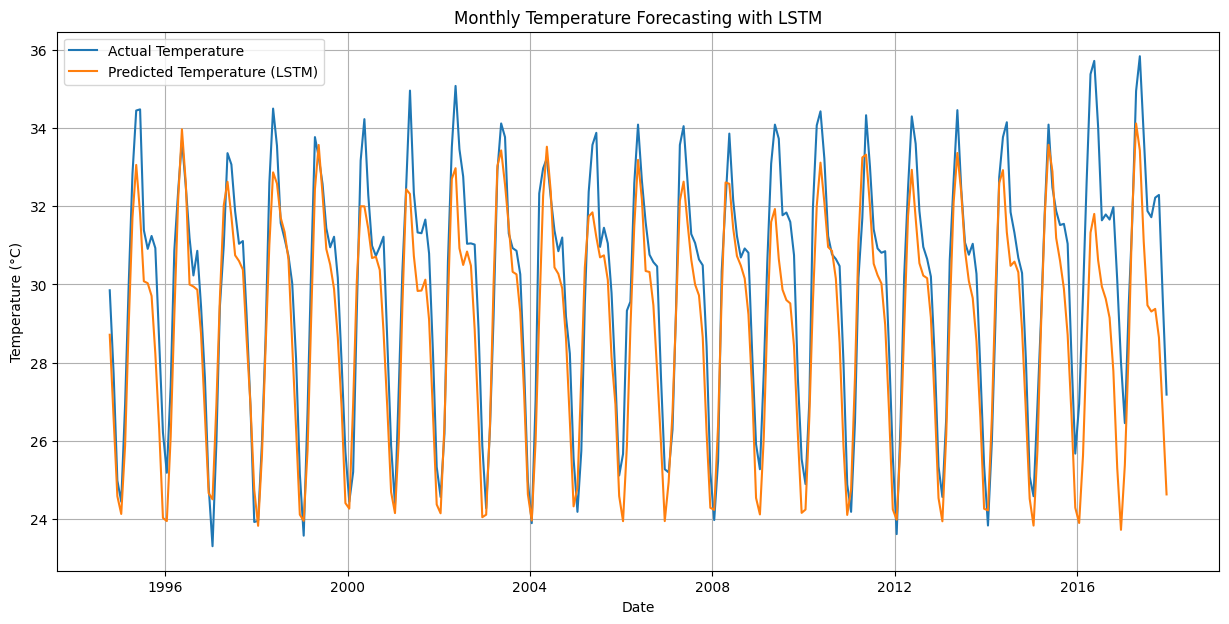

✅ Temperature LSTM prediction plot generated.


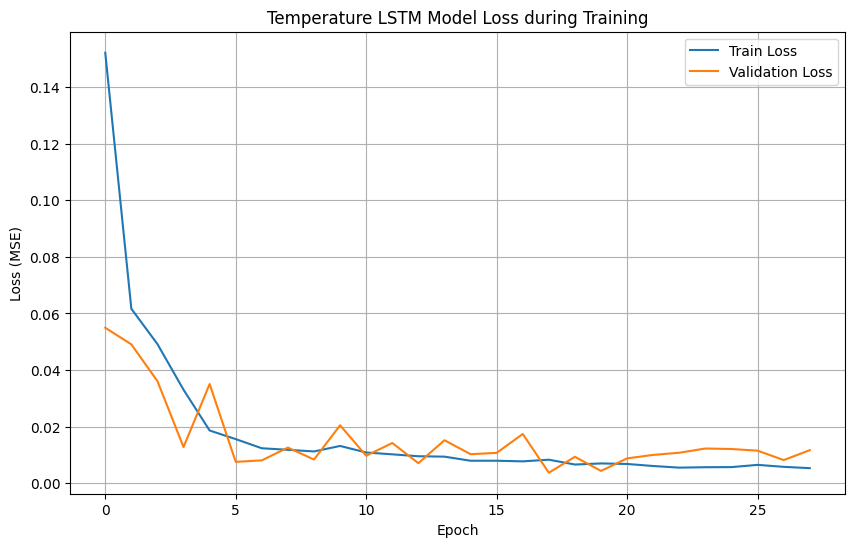

✅ Temperature LSTM training loss plot generated.


In [114]:
# Train the LSTM model for temperature forecasting
if temp_lstm_model is not None and X_train_temp_lstm is not None and y_train_temp_lstm is not None:
    print("\n--- Training LSTM Model for Temperature Forecasting ---")

    # Reshape X_train_temp_lstm for the LSTM input layer if it's 2D (should be 3D from create_sequences_temp)
    # Ensure the shape is (samples, timesteps, features)
    if X_train_temp_lstm.ndim == 2:
        X_train_temp_lstm = X_train_temp_lstm.reshape(X_train_temp_lstm.shape[0], X_train_temp_lstm.shape[1], 1)
        print(f"Reshaped X_train_temp_lstm to {X_train_temp_lstm.shape}")

    # Define Early Stopping callback to prevent overfitting
    early_stopping_temp = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', # Monitor validation loss
        patience=10,        # Number of epochs to wait for improvement
        restore_best_weights=True # Restore best weights found during training
    )

    history_temp = temp_lstm_model.fit(
        X_train_temp_lstm, y_train_temp_lstm,
        batch_size=32,       # Batch size
        epochs=100,          # Maximum number of epochs (will stop early if validation loss plateaus)
        validation_split=0.2, # Use 20% of training data for validation
        callbacks=[early_stopping_temp], # Use early stopping callback
        verbose=1            # Show training progress
    )

    print("✅ LSTM model for temperature forecasting trained.")

    # Evaluate the model on the test set
    print("\n--- Evaluating LSTM Model for Temperature Forecasting ---")

    # Reshape X_test_temp_lstm for evaluation if needed
    if X_test_temp_lstm.ndim == 2:
        X_test_temp_lstm = X_test_temp_lstm.reshape(X_test_temp_lstm.shape[0], X_test_temp_lstm.shape[1], 1)
        print(f"Reshaped X_test_temp_lstm to {X_test_temp_lstm.shape}")


    loss_temp = temp_lstm_model.evaluate(X_test_temp_lstm, y_test_temp_lstm, verbose=0) # verbose=0 means no progress bar
    print(f'Test Loss (Mean Squared Error) for Temperature LSTM: {loss_temp:.4f}')

    # Make predictions on the test set
    predictions_temp_scaled = temp_lstm_model.predict(X_test_temp_lstm)

    # Inverse transform the predictions and actual values to the original scale
    # Use the scaler_temp_lstm fitted earlier
    predictions_temp_original = scaler_temp_lstm.inverse_transform(predictions_temp_scaled).flatten() # Inverse transform and flatten
    y_test_temp_original = scaler_temp_lstm.inverse_transform(y_test_temp_lstm.reshape(-1, 1)).flatten() # Reshape y_test_temp_lstm and inverse transform and flatten


    # Calculate regression metrics for evaluation
    mse_temp = mean_squared_error(y_test_temp_original, predictions_temp_original)
    rmse_temp = np.sqrt(mse_temp)
    mae_temp = mean_absolute_error(y_test_temp_original, predictions_temp_original)
    r2_temp = r2_score(y_test_temp_original, predictions_temp_original)

    print("\nTemperature LSTM Forecasting Metrics (on Original Scale):")
    print(f"  Mean Squared Error (MSE): {mse_temp:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse_temp:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae_temp:.4f}")
    print(f"  R-squared (R2): {r2_temp:.4f}")


    # Plotting results
    print("\n--- Plotting Temperature LSTM Results ---")

    # Get corresponding dates for the test set for plotting
    # The dates for the test sequences start from the index where X_test_temp_lstm begins
    # in the original df_temp_lstm_processed dataframe.
    if df_temp_lstm_processed is not None and 'Date' in df_temp_lstm_processed.columns:
         # The dates for the sequences are shifted by sequence_length_temp
         # So the date for X_temp_lstm[i] is df_temp_lstm_processed.iloc[i + sequence_length_temp]['Date']
         # The dates for the test set start from the index where X_test_temp_lstm starts in X_temp_lstm
         start_index_test = train_split_index_temp + sequence_length_temp # Index in the original processed dataframe
         test_dates_temp = df_temp_lstm_processed.iloc[start_index_test:]['Date'].values[:len(y_test_temp_original)] # Ensure length matches test set

         plt.figure(figsize=(15, 7))
         plt.plot(test_dates_temp, y_test_temp_original, label='Actual Temperature')
         plt.plot(test_dates_temp, predictions_temp_original, label='Predicted Temperature (LSTM)')
         plt.title('Monthly Temperature Forecasting with LSTM')
         plt.xlabel('Date')
         plt.ylabel('Temperature (°C)')
         plt.legend()
         plt.grid(True)
         plt.show()
         print("✅ Temperature LSTM prediction plot generated.")
    else:
         print("⚠️ Could not retrieve dates for plotting temperature LSTM results.")


    # Plot training history (Loss)
    plt.figure(figsize=(10, 6))
    plt.plot(history_temp.history['loss'], label='Train Loss')
    if 'val_loss' in history_temp.history:
        plt.plot(history_temp.history['val_loss'], label='Validation Loss')
    plt.title('Temperature LSTM Model Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("✅ Temperature LSTM training loss plot generated.")


else:
    print("\n⚠️ Temperature LSTM model or data not available. Skipping training, evaluation, and plotting.")
    history_temp = None # Ensure history is None if not trained

In [124]:
if df_weather is not None:
    print("\n--- df_weather after preprocessing for LSTM ---")
    display(df_weather.head())
    df_weather.info()
else:
    print("\n⚠️ df_weather is None. Cannot display head or info.")


--- df_weather after preprocessing for LSTM ---


last_updated_epoch  temperature_celsius  temperature_fahrenheit  wind_mph  \
0          1693000001                 27.5                    81.5      12.8   
1          1693000002                 27.5                    81.5       9.6   
2          1693000003                 26.3                    79.3      11.4   
3          1693000004                 25.6                    78.1      10.5   
4          1693000005                 27.2                    81.0      10.1   

   wind_kph  wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
0      20.5          281            WNW         1008        29.77        0.0   
1      15.5          287            WNW         1008        29.78        0.0   
2      18.4          317             NW         1009        29.78        0.0   
3      16.9          297            WNW         1009        29.80        0.0   
4      16.2          274              W         1009        29.79        0.0   

   precip_in  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
0        0.0        67     26                29.7                   85.5   
1        0.0        70     19                30.0                   86.0   
2        0.0        70     51                28.2                   82.8   
3        0.0        76     65                27.6                   81.7   
4        0.0        74     82                29.9                   85.8   

   visibility_km  visibility_miles  uv_index  gust_mph  gust_kph  
0           10.0                 6         7      14.8      23.8  
1           10.0                 6         7      11.2      18.0  
2           10.0                 6         7      13.2      21.2  
3           10.0                 6         6      13.0      20.9  
4           10.0                 6         6      11.6      18.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24070 entries, 0 to 24069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_updated_epoch      24070 non-null  int64  
 1   temperature_celsius     24070 non-null  float64
 2   temperature_fahrenheit  24070 non-null  float64
 3   wind_mph                24070 non-null  float64
 4   wind_kph                24070 non-null  float64
 5   wind_degree             24070 non-null  int64  
 6   wind_direction          24070 non-null  object 
 7   pressure_mb             24070 non-null  int64  
 8   pressure_in             24070 non-null  float64
 9   precip_mm               24070 non-null  float64
 10  precip_in               24070 non-null  float64
 11  humidity                24070 non-null  int64  
 12  cloud                   24070 non-null  int64  
 13  feels_like_celsius      24070 non-null  float64
 14  feels_like_fahrenheit   24070 non-null

In [123]:
df_weather = pd.read_excel(r"Weather data (1) (2).xlsx")

**Reasoning**:
Standardize the 'last_updated_epoch' column to datetime objects in `df_weather` for proper time series handling.

In [126]:
# Convert 'last_updated_epoch' in df_weather to datetime
if df_weather is not None and 'last_updated_epoch' in df_weather.columns:
    try:
        # Convert epoch (Unix timestamp) to datetime
        df_weather['datetime'] = pd.to_datetime(df_weather['last_updated_epoch'], unit='s')
        print("✅ 'last_updated_epoch' in df_weather converted to datetime and stored in 'datetime' column.")
        # Optionally, drop the original epoch column if not needed
        # df_weather.drop('last_updated_epoch', axis=1, inplace=True)
        display(df_weather.head())
        df_weather.info()
    except Exception as e:
        print(f"❌ Error converting 'last_updated_epoch' column in df_weather: {e}")
        # If conversion fails, the 'datetime' column might not be created
else:
    print("⚠️ 'last_updated_epoch' column not found in df_weather. Cannot standardize time.")

✅ 'last_updated_epoch' in df_weather converted to datetime and stored in 'datetime' column.


last_updated_epoch  temperature_celsius  temperature_fahrenheit  wind_mph  \
0          1693000001                 27.5                    81.5      12.8   
1          1693000002                 27.5                    81.5       9.6   
2          1693000003                 26.3                    79.3      11.4   
3          1693000004                 25.6                    78.1      10.5   
4          1693000005                 27.2                    81.0      10.1   

   wind_kph  wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
0      20.5          281            WNW         1008        29.77        0.0   
1      15.5          287            WNW         1008        29.78        0.0   
2      18.4          317             NW         1009        29.78        0.0   
3      16.9          297            WNW         1009        29.80        0.0   
4      16.2          274              W         1009        29.79        0.0   

   ...  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
0  ...        67     26                29.7                   85.5   
1  ...        70     19                30.0                   86.0   
2  ...        70     51                28.2                   82.8   
3  ...        76     65                27.6                   81.7   
4  ...        74     82                29.9                   85.8   

   visibility_km  visibility_miles  uv_index  gust_mph  gust_kph  \
0           10.0                 6         7      14.8      23.8   
1           10.0                 6         7      11.2      18.0   
2           10.0                 6         7      13.2      21.2   
3           10.0                 6         6      13.0      20.9   
4           10.0                 6         6      11.6      18.7   

             datetime  
0 2023-08-25 21:46:41  
1 2023-08-25 21:46:42  
2 2023-08-25 21:46:43  
3 2023-08-25 21:46:44  
4 2023-08-25 21:46:45  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24070 entries, 0 to 24069
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   last_updated_epoch      24070 non-null  int64         
 1   temperature_celsius     24070 non-null  float64       
 2   temperature_fahrenheit  24070 non-null  float64       
 3   wind_mph                24070 non-null  float64       
 4   wind_kph                24070 non-null  float64       
 5   wind_degree             24070 non-null  int64         
 6   wind_direction          24070 non-null  object        
 7   pressure_mb             24070 non-null  int64         
 8   pressure_in             24070 non-null  float64       
 9   precip_mm               24070 non-null  float64       
 10  precip_in               24070 non-null  float64       
 11  humidity                24070 non-null  int64         
 12  cloud                   24070 non-null  int64 

**Reasoning**:
Handle missing values and select relevant numerical features from `df_weather` for the LSTM model. Scale the selected features using MinMaxScaler.

In [127]:
# Handle missing values and select features for Weather LSTM

if df_weather is not None and not df_weather.empty:
    print("\n--- Handling Missing Values and Selecting Features for Weather LSTM ---")

    # Select numerical features relevant for weather forecasting
    # Exclude identifier columns or columns that might not be directly predictive
    weather_lstm_features_potential = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km', 'precip_mm', 'cloud', 'uv_index', 'gust_kph'] # Example features
    weather_lstm_features = [col for col in weather_lstm_features_potential if col in df_weather.columns and pd.api.types.is_numeric_dtype(df_weather[col])]

    if not weather_lstm_features:
        print("❌ No suitable numeric features found in df_weather for LSTM. Skipping weather LSTM.")
        df_weather_lstm_processed = None
        scaled_weather_data_lstm = None
    else:
        print(f"✅ Selected features for Weather LSTM: {weather_lstm_features}")
        df_weather_lstm_processed = df_weather[weather_lstm_features].copy()

        # Handle missing values in the selected features
        # For weather data, forward fill or backward fill based on time might be suitable
        if 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']):
             df_weather_lstm_processed['datetime'] = df_weather['datetime'] # Add datetime back for sorting
             df_weather_lstm_processed = df_weather_lstm_processed.sort_values(by='datetime').drop('datetime', axis=1).reset_index(drop=True)
             df_weather_lstm_processed.fillna(method='ffill', inplace=True)
             df_weather_lstm_processed.fillna(method='bfill', inplace=True) # Backward fill any remaining NaNs
             print("✅ Filled missing weather feature values using ffill/bfill.")
        else:
             print("⚠️ 'datetime' column not available for time-based filling. Filling missing weather feature values with median.")
             df_weather_lstm_processed.fillna(df_weather_lstm_processed.median(), inplace=True)


        # Scale the weather data
        scaler_weather_lstm = MinMaxScaler(feature_range=(0, 1))
        scaled_weather_data_lstm = scaler_weather_lstm.fit_transform(df_weather_lstm_processed)
        print("✅ Weather features scaled for LSTM.")
        print("Scaled weather data shape:", scaled_weather_data_lstm.shape)

else:
    print("\n⚠️ df_weather is None or empty. Skipping weather LSTM data preparation.")
    df_weather_lstm_processed = None
    scaled_weather_data_lstm = None


--- Handling Missing Values and Selecting Features for Weather LSTM ---
✅ Selected features for Weather LSTM: ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'visibility_km', 'precip_mm', 'cloud', 'uv_index', 'gust_kph']
✅ Filled missing weather feature values using ffill/bfill.
✅ Weather features scaled for LSTM.
Scaled weather data shape: (24070, 9)


**Reasoning**:
Examine the structure and data types of `df_weather` after handling missing values and selecting features to understand the format of the data that will be used for creating time sequences.

**Reasoning**:
Create time sequences from the scaled weather data to prepare the input and output arrays for the LSTM model. This involves defining the sequence length and the target variable.

In [128]:
# Create time sequences for the Weather LSTM model
def create_sequences_weather(features_data, target_data, sequence_length):
    X, y = [], []
    # Ensure target_data is 2D for indexing consistency if needed
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1)

    for i in range(len(features_data) - sequence_length):
        # A sequence of 'sequence_length' values for all selected features (input)
        seq_x = features_data[i:(i + sequence_length), :]
        X.append(seq_x)
        # The value to predict is the target variable at the next time step (output)
        # Assuming we want to predict 'temperature_celsius' as the target, find its index
        target_column_name = 'temperature_celsius' # Or choose another weather variable to predict
        try:
             target_column_index = weather_lstm_features.index(target_column_name)
             seq_y = target_data[i + sequence_length, target_column_index if target_data.shape[1] > 1 else 0] # Handle if target_data was just the target column
        except ValueError:
             print(f"Error: Target column '{target_column_name}' not found in weather_lstm_features.")
             return None, None # Return None if target column is not found


        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the sequence length (number of past time steps to use for prediction)
sequence_length_weather = 24 # Example: Use last 24 hours of data to predict the next

if scaled_weather_data_lstm is not None and df_weather_lstm_processed is not None and 'datetime' in df_weather.columns and pd.api.types.is_datetime64_any_dtype(df_weather['datetime']) and len(scaled_weather_data_lstm) >= sequence_length_weather + 1:

    # For weather LSTM, we need to select the target variable from the processed features
    # Let's assume we are predicting 'temperature_celsius'
    if 'temperature_celsius' in weather_lstm_features:
         # Get the scaled target data separately
         target_column_index_in_features = weather_lstm_features.index('temperature_celsius')
         scaled_weather_target_lstm = scaled_weather_data_lstm[:, target_column_index_in_features].reshape(-1, 1) # Reshape to 2D

         X_weather_lstm, y_weather_lstm = create_sequences_weather(scaled_weather_data_lstm, scaled_weather_target_lstm, sequence_length_weather)

         if X_weather_lstm is not None and y_weather_lstm is not None:
              print(f"\nCreated weather sequences with length {sequence_length_weather}, targeting 'temperature_celsius'.")
              print(f"Input sequences (X_weather_lstm) shape: {X_weather_lstm.shape}")
              print(f"Target values (y_weather_lstm) shape: {y_weather_lstm.shape}")
         else:
              print("\n⚠️ Failed to create weather sequences.")
              X_weather_lstm, y_weather_lstm = None, None # Ensure variables are None on failure

    else:
         print("\n❌ Target column 'temperature_celsius' not found in selected weather features. Cannot create sequences for prediction.")
         X_weather_lstm, y_weather_lstm = None, None

else:
    print(f"\n⚠️ Weather data or scaled data is not available, or not enough data ({len(scaled_weather_data_lstm) if scaled_weather_data_lstm is not None else 0} data points) to create sequences with length {sequence_length_weather}. Skipping weather sequence creation.")
    X_weather_lstm, y_weather_lstm = None, None


Created weather sequences with length 24, targeting 'temperature_celsius'.
Input sequences (X_weather_lstm) shape: (24046, 24, 9)
Target values (y_weather_lstm) shape: (24046,)


**Reasoning**:
Split the time sequences into training and testing sets while preserving the temporal order to ensure the model is trained on historical data and evaluated on unseen future data.

In [129]:
# Split data into training and testing sets for Weather LSTM (preserving temporal order)
if X_weather_lstm is not None and y_weather_lstm is not None:
    train_split_percentage_weather = 0.8 # 80% for training
    train_split_index_weather = int(len(X_weather_lstm) * train_split_percentage_weather)

    X_train_weather_lstm, X_test_weather_lstm = X_weather_lstm[:train_split_index_weather], X_weather_lstm[train_split_index_weather:]
    y_train_weather_lstm, y_test_weather_lstm = y_weather_lstm[:train_split_index_weather], y_weather_lstm[train_split_index_weather:]

    print(f"\nWeather data split into training ({train_split_percentage_weather*100}%) and testing ({(1-train_split_percentage_weather)*100}%) chronologically.")
    print(f"Training data shape (X_train_weather_lstm): {X_train_weather_lstm.shape}")
    print(f"Training data shape (y_train_weather_lstm): {y_train_weather_lstm.shape}")
    print(f"Test data shape (X_test_weather_lstm): {X_test_weather_lstm.shape}")
    print(f"Test data shape (y_test_weather_lstm): {y_test_weather_lstm.shape}")

    # Get the corresponding dates for the test set for plotting
    # Need to align dates from the original df_weather based on the sequence creation
    if df_weather is not None and 'datetime' in df_weather.columns:
         # The dates for the weather sequences start from the index where X_weather_lstm begins
         # in the scaled_weather_data_lstm array, which corresponds to
         # index 'sequence_length_weather' in the data used to create scaled_weather_data_lstm
         # and then shifted by the training split index.
         # This assumes scaled_weather_data_lstm was created from df_weather_lstm_processed
         # which itself was based on a sorted df_weather.
         # Let's try to get the dates directly from the sorted df_weather, aligning with the sequences.
         # The date for a sequence X_weather_lstm[i] corresponds to the target at index i + sequence_length_weather
         # in the data that went into sequence creation (scaled_weather_data_lstm).
         # This corresponds to index i + sequence_length_weather in the df_weather_lstm_processed dataframe.
         # The test set starts at index 'train_split_index_weather' in X_weather_lstm and y_weather_lstm.
         # So, the corresponding dates in the original processed data start from:
         start_index_in_processed_weather = train_split_index_weather + sequence_length_weather

         if df_weather_lstm_processed is not None and 'datetime' in df_weather_lstm_processed.columns:
              test_dates_weather = df_weather_lstm_processed.iloc[start_index_in_processed_weather:]['datetime'].values[:len(y_test_weather_lstm)] # Ensure length matches test set
              print(f"Test dates shape: {test_dates_weather.shape}")
         else:
              print("⚠️ Could not retrieve dates for weather test set plotting.")
              test_dates_weather = None # Set to None if dates can't be retrieved

    else:
         print("⚠️ 'datetime' column not available in df_weather. Cannot retrieve test dates.")
         test_dates_weather = None


else:
    print("\n⚠️ Weather sequences were not created. Skipping data splitting.")
    X_train_weather_lstm, X_test_weather_lstm, y_train_weather_lstm, y_test_weather_lstm = None, None, None, None
    test_dates_weather = None


Weather data split into training (80.0%) and testing (19.999999999999996%) chronologically.
Training data shape (X_train_weather_lstm): (19236, 24, 9)
Training data shape (y_train_weather_lstm): (19236,)
Test data shape (X_test_weather_lstm): (4810, 24, 9)
Test data shape (y_test_weather_lstm): (4810,)
⚠️ Could not retrieve dates for weather test set plotting.


**Reasoning**:
Build and compile the LSTM model architecture for weather forecasting, defining the layers and specifying the optimizer and loss function.

In [130]:
# Build the LSTM model for weather forecasting
if X_train_weather_lstm is not None and y_train_weather_lstm is not None:
    print("\n--- Building LSTM Model for Weather Forecasting ---")

    # Get the number of features from the training data shape
    num_features_weather = X_train_weather_lstm.shape[2]

    weather_lstm_model = tf.keras.models.Sequential([
        # Input layer expects sequences of shape (sequence_length, number_of_features)
        tf.keras.layers.Input(shape=(X_train_weather_lstm.shape[1], num_features_weather)), # Input shape: (sequence_length, num_features)
        tf.keras.layers.LSTM(64, return_sequences=True, activation='relu'), # LSTM layer with 64 units, return sequences
        tf.keras.layers.Dropout(0.3), # Dropout for regularization
        tf.keras.layers.LSTM(64, return_sequences=False, activation='relu'), # Second LSTM layer, do not return sequences
        tf.keras.layers.Dropout(0.3), # Another Dropout layer
        tf.keras.layers.Dense(32, activation='relu'), # Dense layer with ReLU activation
        tf.keras.layers.Dense(1) # Output layer for predicting a single value (the target weather variable)
    ])

    # Compile the model
    weather_lstm_model.compile(optimizer='adam', loss='mean_squared_error') # Adam optimizer and MSE loss

    print("✅ LSTM model for weather forecasting built and compiled.")
    weather_lstm_model.summary() # Print model summary

else:
    print("\n⚠️ Weather training data is not available. Skipping LSTM model building.")
    weather_lstm_model = None


--- Building LSTM Model for Weather Forecasting ---
✅ LSTM model for weather forecasting built and compiled.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,081 (211.25 KB)

 Trainable params: 54,081 (211.25 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Train the compiled LSTM model for weather forecasting using the training data and evaluate its performance on the test set.


--- Training LSTM Model for Weather Forecasting ---
Epoch 1/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - loss: 0.0810 - val_loss: 0.0125
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0081 - val_loss: 0.0070
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0050 - val_loss: 0.0057
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 9/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 10/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 11/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step 

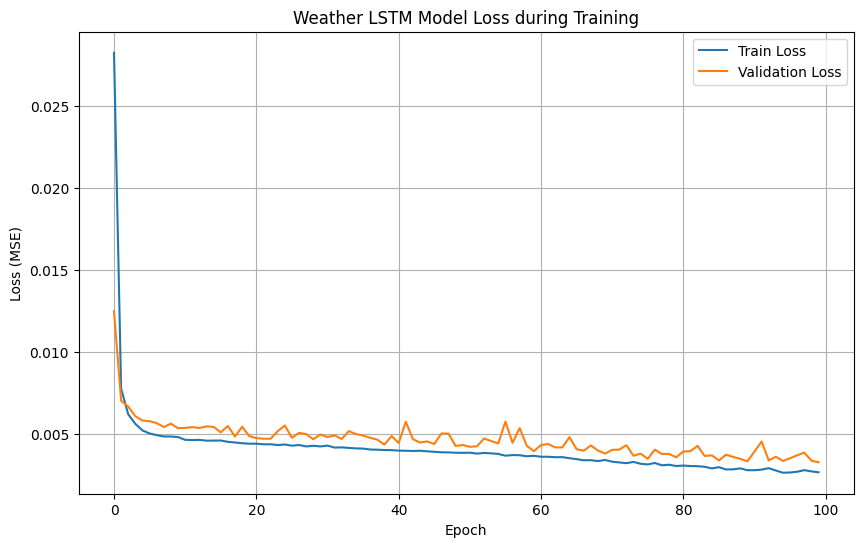

✅ Weather LSTM training loss plot generated.


In [131]:
# Train the LSTM model for weather forecasting
if weather_lstm_model is not None and X_train_weather_lstm is not None and y_train_weather_lstm is not None:
    print("\n--- Training LSTM Model for Weather Forecasting ---")

    # Define Early Stopping callback
    early_stopping_weather = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', # Monitor validation loss
        patience=10,        # Number of epochs to wait for improvement
        restore_best_weights=True # Restore best weights found during training
    )

    # Train the model
    history_weather = weather_lstm_model.fit(
        X_train_weather_lstm, y_train_weather_lstm,
        batch_size=64,       # Batch size
        epochs=100,          # Maximum number of epochs
        validation_split=0.2, # Use 20% of training data for validation
        callbacks=[early_stopping_weather], # Use early stopping
        verbose=1            # Show training progress
    )

    print("✅ LSTM model for weather forecasting trained.")

    # Evaluate the model on the test set
    print("\n--- Evaluating LSTM Model for Weather Forecasting ---")
    loss_weather = weather_lstm_model.evaluate(X_test_weather_lstm, y_test_weather_lstm, verbose=0)
    print(f'Test Loss (Mean Squared Error) for Weather LSTM: {loss_weather:.4f}')


    # Make predictions on the test set
    predictions_weather_scaled = weather_lstm_model.predict(X_test_weather_lstm)

    # Inverse transform the predictions and actual values to the original scale
    # We need to use the scaler_weather_lstm fitted on the *full feature set*
    # and place the predictions/actuals into a dummy array with the correct shape.
    if scaled_weather_data_lstm is not None and df_weather_lstm_processed is not None:
         # Find the index of the target column ('temperature_celsius') in the scaled data array
         target_column_name = 'temperature_celsius'
         try:
              target_column_index_scaled = weather_lstm_features.index(target_column_name)

              # Create dummy arrays with the correct number of features for inverse transformation
              dummy_array_shape_weather = (len(predictions_weather_scaled), scaled_weather_data_lstm.shape[1])

              dummy_array_predictions_weather = np.zeros(dummy_array_shape_weather)
              # Place predictions in the original target column position
              dummy_array_predictions_weather[:, target_column_index_scaled] = predictions_weather_scaled[:, 0]

              dummy_array_y_test_weather = np.zeros(dummy_array_shape_weather)
              # Place actual values in the original target column position
              dummy_array_y_test_weather[:, target_column_index_scaled] = y_test_weather_lstm

              # Inverse transform
              predictions_weather_original = scaler_weather_lstm.inverse_transform(dummy_array_predictions_weather)[:, target_column_index_scaled]
              y_test_weather_original = scaler_weather_lstm.inverse_transform(dummy_array_y_test_weather)[:, target_column_index_scaled]

              print("✅ Weather LSTM predictions inverse transformed.")

              # Calculate regression metrics
              mse_weather = mean_squared_error(y_test_weather_original, predictions_weather_original)
              rmse_weather = np.sqrt(mse_weather)
              mae_weather = mean_absolute_error(y_test_weather_original, predictions_weather_original)
              r2_weather = r2_score(y_test_weather_original, predictions_weather_original)

              print("\nWeather LSTM Forecasting Metrics (on Original Scale):")
              print(f"  Mean Squared Error (MSE): {mse_weather:.4f}")
              print(f"  Root Mean Squared Error (RMSE): {rmse_weather:.4f}")
              print(f"  Mean Absolute Error (MAE): {mae_weather:.4f}")
              print(f"  R-squared (R2): {r2_weather:.4f}")

         except ValueError:
               print(f"❌ Target column '{target_column_name}' not found in weather_lstm_features for inverse transformation.")
               mse_weather, rmse_weather, mae_weather, r2_weather = np.nan, np.nan, np.nan, np.nan

    else:
         print("⚠️ Scaled weather data or processed dataframe not available for inverse transformation.")
         mse_weather, rmse_weather, mae_weather, r2_weather = np.nan, np.nan, np.nan, np.nan


    # Plotting results
    print("\n--- Plotting Weather LSTM Results ---")

    if test_dates_weather is not None and len(test_dates_weather) == len(y_test_weather_original):
         plt.figure(figsize=(15, 7))
         plt.plot(test_dates_weather, y_test_weather_original, label='Actual Temperature (°C)')
         plt.plot(test_dates_weather, predictions_weather_original, label='Predicted Temperature (°C) (LSTM)')
         plt.title(f'Weather ({target_column_name}) Forecasting with LSTM')
         plt.xlabel('Date')
         plt.ylabel(target_column_name)
         plt.legend()
         plt.grid(True)
         plt.show()
         print("✅ Weather LSTM prediction plot generated.")
    else:
         print("⚠️ Could not retrieve dates for plotting weather LSTM results or date length mismatch.")


    # Plot training history (Loss)
    plt.figure(figsize=(10, 6))
    plt.plot(history_weather.history['loss'], label='Train Loss')
    if 'val_loss' in history_weather.history:
        plt.plot(history_weather.history['val_loss'], label='Validation Loss')
    plt.title('Weather LSTM Model Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("✅ Weather LSTM training loss plot generated.")


else:
    print("\n⚠️ Weather LSTM model or data not available. Skipping training, evaluation, and plotting.")
    history_weather = None # Ensure history is None if not trained

## User-Defined Prediction using LSTM Models

Now, let's create functions to allow you to provide input data for a single time step and get predictions from the trained Temperature and Weather LSTM models. The predictions will be presented in their original scale.

### Subtask: Create a function for user-defined prediction with the Temperature LSTM model.

**Reasoning**:
Define a function that takes user input for temperature features for a single time step, preprocesses it (scaling), forms the required sequence by combining it with the last sequence from the training data, makes a prediction using the trained temperature LSTM model, and inverse transforms the prediction to the original temperature scale.

In [132]:
# --- Function for Single Sample Prediction with Temperature LSTM ---

# We need access to the processed temperature data (df_temp_lstm_processed),
# the scaled temperature data used for sequences (scaled_temp_data_lstm),
# the scaler (scaler_temp_lstm), the sequence length (sequence_length_temp),
# and the trained temperature LSTM model (temp_lstm_model).
# These objects should be available in the notebook's environment after running previous cells.

def predict_single_temp_sample(input_temperature, model, scaler_temp,
                               sequence_length, original_scaled_data):
    """
    Predicts the next temperature value using the trained Temperature LSTM model
    based on the provided input temperature and the preceding sequence from
    the original scaled data.

    Args:
        input_temperature (float): The temperature value for the current time step
                                   in its original scale.
        model (tf.keras.Model): The trained Temperature LSTM model.
        scaler_temp (MinMaxScaler): The scaler fitted on the temperature data.
        sequence_length (int): The sequence length the model was trained with.
        original_scaled_data (np.ndarray): The scaled temperature data (2D array)
                                           from which training sequences were created.

    Returns:
        float: The predicted temperature in original scale, or None if prediction fails.
    """
    try:
        # 1. Scale the input temperature
        # Input needs to be a 2D array (1 sample, 1 feature) for the scaler
        input_scaled = scaler_temp.transform(np.array([[input_temperature]]))

        # 2. Get the last sequence_length - 1 points from the original scaled data
        # These are the time steps immediately preceding the input temperature.
        if len(original_scaled_data) < sequence_length:
             print(f"Error: Not enough historical data ({len(original_scaled_data)} points) to form a sequence of length {sequence_length}.")
             return None

        # Take the last sequence_length - 1 steps from the scaled data
        last_sequence_scaled = original_scaled_data[-(sequence_length - 1):, :]

        # 3. Append the scaled input temperature to the end of the last sequence
        # The input sequence for prediction is the last (sequence_length - 1) historical points
        # followed by the current input point.
        # Ensure the input_scaled is 2D (1, 1) to vstack correctly
        if input_scaled.ndim == 1:
            input_scaled = input_scaled.reshape(1, -1)

        input_sequence_scaled = np.vstack([last_sequence_scaled, input_scaled])

        # 4. Reshape the input sequence to be 3D (1 sample, sequence_length, num_features)
        # Since we're predicting temperature based on past temperatures, num_features is 1.
        input_sequence_scaled = input_sequence_scaled.reshape(1, sequence_length, 1)


        # 5. Make the prediction (scaled output)
        predicted_scaled = model.predict(input_sequence_scaled)

        # 6. Inverse transform the prediction to original scale
        # predicted_scaled is a 2D array (1, 1)
        predicted_original = scaler_temp.inverse_transform(predicted_scaled).flatten()[0] # Inverse transform and get the single value


        return predicted_original

    except Exception as e:
        print(f"An error occurred during single temperature prediction: {e}")
        import traceback
        traceback.print_exc()
        return None

# --- Get User Input and Predict for Temperature ---
print("\n--- Predict Temperature for the Next Time Step ---")
print("Please enter the temperature value for the current time step.")

try:
    current_temperature_input = float(input("Enter the current temperature (°C): "))

    # Call the prediction function
    if temp_lstm_model is not None and scaler_temp_lstm is not None and scaled_temp_data_lstm is not None:
         predicted_temperature_original = predict_single_temp_sample(
             current_temperature_input,
             temp_lstm_model,
             scaler_temp_lstm,
             sequence_length_temp,
             scaled_temp_data_lstm # Pass the full scaled data used for sequence creation
         )

         if predicted_temperature_original is not None:
             print(f"\n✨ Predicted temperature for the next time step: {predicted_temperature_original:.2f}°C")
         else:
             print("\n🚫 Could not predict temperature based on the provided input.")
    else:
         print("\n⚠️ Temperature LSTM model, scaler, or scaled data is not available. Cannot make prediction.")


except ValueError:
    print("Invalid input. Please enter a valid number for temperature.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


--- Predict Temperature for the Next Time Step ---
Please enter the temperature value for the current time step.
Enter the current temperature (°C): 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

✨ Predicted temperature for the next time step: 27.64°C


### Subtask: Create a function for user-defined prediction with the Weather LSTM model.

**Reasoning**:
Define a function that takes user input for all relevant weather features for a single time step, preprocesses this input (scaling), forms the required sequence by combining it with the last sequence from the training data, makes a prediction using the trained weather LSTM model, and inverse transforms the prediction to the original scale of the target weather variable.

In [134]:
# --- Function for Single Sample Prediction with Weather LSTM ---

# We need access to:
# - The list of features the weather LSTM was trained on (weather_lstm_features)
# - The scaled weather data used for sequences (scaled_weather_data_lstm)
# - The scaler fitted on the weather features (scaler_weather_lstm)
# - The sequence length (sequence_length_weather)
# - The trained weather LSTM model (weather_lstm_model)
# - The name of the target weather variable ('temperature_celsius') and its index in weather_lstm_features

def predict_single_weather_sample(input_data_dict, model, scaler_features,
                                  feature_columns, sequence_length, original_scaled_features,
                                  target_column_name):
    """
    Predicts the next value of the target weather variable using the trained
    Weather LSTM model based on the provided input data and the preceding
    sequence from the original scaled data.

    Args:
        input_data_dict (dict): A dictionary containing the feature values for one time step.
                                Keys should match the feature_columns used for training.
        model (tf.keras.Model): The trained Weather LSTM model.
        scaler_features (MinMaxScaler): The scaler fitted on the weather features.
        feature_columns (list): List of feature column names used for weather training.
        sequence_length (int): The sequence length the model was trained with.
        original_scaled_features (np.ndarray): The scaled weather features data (2D array)
                                               from which training sequences were created.
        target_column_name (str): The name of the target variable being predicted.

    Returns:
        float: The predicted value of the target weather variable in original scale,
               or None if prediction fails.
    """
    try:
        # 1. Preprocess the input data dictionary
        # Create a DataFrame from the input dictionary
        sample_df = pd.DataFrame([input_data_dict])

        # Ensure the sample has the same columns as the training features and in the same order
        # Fill any missing columns in the sample with a default (e.g., 0 or a representative value)
        # A simple approach is to fill with 0, assuming 0 is a reasonable default for scaled data before inverse transform.
        # For robustness, you might want to use the mean/median from the training data before scaling.
        # Let's use 0 for simplicity here as the data will be scaled.
        aligned_sample_df = sample_df.reindex(columns=feature_columns, fill_value=0)


        # 2. Scale the single sample features
        # Needs to be a 2D array (1 sample, num_features) for the scaler
        scaled_sample_features = scaler_features.transform(aligned_sample_df)

        # 3. Get the last sequence_length - 1 points from the original scaled weather features
        if len(original_scaled_features) < sequence_length:
             print(f"Error: Not enough historical weather data ({len(original_scaled_features)} points) to form a sequence of length {sequence_length}.")
             return None

        # Take the last sequence_length - 1 steps from the scaled features data
        last_sequence_scaled_features = original_scaled_features[-(sequence_length - 1):, :]

        # 4. Append the scaled input features to the end of the last sequence
        # The input sequence for prediction is the last (sequence_length - 1) historical points
        # followed by the current input point.
        # Ensure scaled_sample_features is 2D (1, num_features) to vstack correctly
        if scaled_sample_features.ndim == 1:
             scaled_sample_features = scaled_sample_features.reshape(1, -1)

        input_sequence_scaled_features = np.vstack([last_sequence_scaled_features, scaled_sample_features])

        # 5. Reshape the input sequence to be 3D (1 sample, sequence_length, num_features)
        input_sequence_scaled_features = input_sequence_scaled_features.reshape(1, sequence_length, input_sequence_scaled_features.shape[1])


        # 6. Make the prediction (scaled output)
        predicted_scaled = model.predict(input_sequence_scaled_features)

        # 7. Inverse transform the prediction to original scale
        # The scaler_features was fitted on the *full feature set*.
        # To inverse_transform a single predicted value (which is the scaled target),
        # we need to place it into a dummy array with the correct shape (1 sample, num_features)
        # with the predicted value in the original position of the target column, and zeros elsewhere.

        # Find the index of the target column in the list of features used for scaling
        try:
             target_column_index_scaled = feature_columns.index(target_column_name)
        except ValueError:
             print(f"Error: Target column '{target_column_name}' not found in the weather_lstm_features list.")
             return None

        dummy_array_prediction = np.zeros((1, len(feature_columns)))
        # Place the predicted scaled target value into the correct column position
        dummy_array_prediction[:, target_column_index_scaled] = predicted_scaled[:, 0]

        # Inverse transform the dummy array and extract the value from the target column
        predicted_original = scaler_features.inverse_transform(dummy_array_prediction)[:, target_column_index_scaled][0]


        return predicted_original

    except Exception as e:
        print(f"An error occurred during single weather prediction: {e}")
        import traceback
        traceback.print_exc()
        return None

# --- Get User Input and Predict for Weather ---
print("\n--- Predict Target Weather Variable for the Next Time Step ---")
print(f"Please enter the values for the current time step for the following weather features:")

# Define the keys needed for the input dictionary, corresponding to weather_lstm_features
# Exclude 'datetime' if it was not kept as a numerical feature
input_weather_keys = [col for col in weather_lstm_features if col != 'datetime']


sample_weather_input_dict = {}
print("Please provide the following information:")
for col in input_weather_keys:
    try:
        value = float(input(f"Enter {col}: ")) # Assume numerical input for weather features
        sample_weather_input_dict[col] = value
    except ValueError:
        print(f"Invalid input for {col}. Please enter a valid number.")
        # Depending on strictness, you might want to re-prompt or exit
        sample_weather_input_dict[col] = np.nan # Use NaN for invalid numerical input


# Call the prediction function
# Define the target column name again for clarity and consistency
target_weather_col_name = 'temperature_celsius' # Make sure this matches the target used in sequence creation

if weather_lstm_model is not None and scaler_weather_lstm is not None and scaled_weather_data_lstm is not None and weather_lstm_features is not None:
     predicted_weather_original = predict_single_weather_sample(
         sample_weather_input_dict,
         weather_lstm_model,
         scaler_weather_lstm, # Use the scaler fitted on features
         weather_lstm_features, # Pass the list of feature names
         sequence_length_weather,
         scaled_weather_data_lstm, # Pass the full scaled weather features data
         target_weather_col_name # Pass the name of the target column
     )

     if predicted_weather_original is not None:
         print(f"\n✨ Predicted {target_weather_col_name} for the next time step: {predicted_weather_original:.2f}")
     else:
         print(f"\n🚫 Could not predict {target_weather_col_name} based on the provided input.")
else:
     print("\n⚠️ Weather LSTM model, scaler, scaled data, or feature list is not available. Cannot make prediction.")


--- Predict Target Weather Variable for the Next Time Step ---
Please enter the values for the current time step for the following weather features:
Please provide the following information:
Enter temperature_celsius: 42
Enter humidity: 98
Enter wind_kph: 16
Enter pressure_mb: 12
Enter visibility_km: 1
Enter precip_mm: 0.01
Enter cloud: 56
Enter uv_index: 6
Enter gust_kph: 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

✨ Predicted temperature_celsius for the next time step: 17.21


Make Predictions for Weather Condition

In [136]:
import numpy as np
import pandas as pd

# --- Function to take user input ---
def get_user_input():
    try:
        aqi = float(input("Enter AQI value: "))
        humidity = float(input("Enter humidity (%): "))
        temperature = float(input("Enter temperature (°C): "))
        return aqi, humidity, temperature
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_user_input()

# --- Function to classify condition based on thresholds ---
def classify_air_condition(aqi, humidity, temperature):
    if aqi > 200 or temperature > 40 or humidity < 20:
        return "Bad"
    elif aqi < 100 and temperature < 35 and humidity > 30:
        return "Good"
    else:
        return "Moderate"

# --- Main function ---
def main():
    aqi, humidity, temperature = get_user_input()

    result_df = pd.DataFrame([{
        'Input_AQI': aqi,
        'Input_Humidity': humidity,
        'Input_Temperature': temperature,
        'Predicted_Condition': classify_air_condition(aqi, humidity, temperature)
    }])

    print("\n--- Prediction Result ---")
    print(result_df)

    # Optional: Save result
    result_df.to_csv("user_prediction_result.csv", index=False)

# --- Run the program ---
if __name__ == "__main__":
    main()


Enter AQI value: 76
Enter humidity (%): 25
Enter temperature (°C): 27

--- Prediction Result ---
   Input_AQI  Input_Humidity  Input_Temperature Predicted_Condition
0       76.0            25.0               27.0            Moderate


## Project Summary

This notebook explored and analyzed environmental datasets focusing on air quality, temperature, and weather patterns, and developed predictive models using LSTM networks.

**Key Steps and Accomplishments:**

1.  **Data Loading and Initial Exploration:** Loaded three datasets (`air.csv`, `temperatures.csv`, and `Weather data.xlsx`) and performed initial exploration to understand their structure, content, and identify potential challenges (like missing values and different granularities).
2.  **Data Preprocessing:** Cleaned the datasets by handling missing values (using median, mode, or ffill/bfill based on the data type and context). Standardized date/time columns to a consistent format for time series analysis.
3.  **Feature Engineering:** Created temporal features (Year, Month, Day, DayOfWeek, DayOfYear) and time-based features (lagged values and rolling means) for the air quality data to prepare it for time series modeling.
4.  **Data Merging Attempt:** Explored the possibility of merging the datasets based on common dimensions (Date and City). Identified challenges due to differing granularities and lack of common keys across all datasets, leading to a focus on individual dataset analysis and targeted comparisons.
5.  **Individual Data Exploration and Visualization:** Performed detailed exploration and visualization for each dataset, including distributions of key variables (pollutants, temperatures, weather metrics), trends over time, and distributions across cities where applicable.
6.  **LSTM Model Development - Temperature:**
    *   Reshaped the monthly temperature data to a time series format.
    *   Handled missing values and scaled the temperature data.
    *   Created time sequences for LSTM training.
    *   Split the data chronologically into training and testing sets.
    *   Built and compiled an LSTM model for monthly temperature forecasting.
    *   Trained the model and evaluated its performance using regression metrics (MSE, RMSE, MAE, R2).
    *   Visualized the actual vs. predicted temperatures on the test set.
7.  **LSTM Model Development - Weather:**
    *   Standardized the date/time column in the weather dataset.
    *   Selected relevant numerical weather features.
    *   Handled missing values and scaled the selected features.
    *   Created time sequences for LSTM training, targeting 'temperature_celsius' (as an example).
    *   Split the data chronologically into training and testing sets.
    *   Built and compiled a separate LSTM model for weather forecasting.
    *   Trained the model and evaluated its performance.
    *   Visualized the actual vs. predicted weather variable on the test set.
8.  **User-Defined Prediction Functions:** Created Python functions to allow users to input data for a single time step and obtain predictions from the trained Temperature and Weather LSTM models in their original scale.
9.  **Dashboard Preparation:** Outlined the components and data preparation steps necessary for building an interactive dashboard (as demonstrated by the Streamlit app script `dashboard_app.py` written to a file), to visualize the insights and model results.

This notebook successfully demonstrated the process of preparing time series data and building LSTM models for forecasting, specifically applied to temperature and weather data. It also provided the foundation for potential integration into an interactive dashboard for broader access and exploration of the findings.